In [1]:
import tracemalloc
import pickle
from cov_3X2 import *
from lsst_utils import *
from scipy.stats import norm,mode,skew,kurtosis,percentileofscore
import seaborn as sns
colors=sns.color_palette()


/usr/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
import lsst_utils
import cov_3X2
import tracer_utils
import window_utils
import importlib
reload=importlib.reload
reload(lsst_utils)
reload(window_utils)
reload(tracer_utils)
reload(cov_3X2)
from lsst_utils import *
from cov_3X2 import *

In [4]:
from distributed import LocalCluster
from dask.distributed import Client  # we already had this above
#http://distributed.readthedocs.io/en/latest/_modules/distributed/worker.html
worker_kwargs={'memory_spill_fraction':.75,'memory_target_fraction':.99,'memory_pause_fraction':1}
LC=LocalCluster(n_workers=1,processes=False,memory_limit='60gb',threads_per_worker=10,
                local_dir='/home/deep/repos/cosmic_shear/temp/NGL-worker/',
               **worker_kwargs,
                #scheduler_port=12234,
#                 dashboard_address=8801
#                memory_monitor_interval='2000ms')
               )
client=Client(LC,diagnostics_port=8801,)

#LC.close()
#client.close()

In [5]:
client

<Client: scheduler='inproc://136.152.250.206/1530/2' processes=1 cores=10>

In [6]:
nside=1024

In [7]:
#setup parameters
# lmax_cl=1000
lmax_cl=int(nside*2.9)
lmin_cl=0
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+10
lmax_cl_Bins=lmax_cl-10
Nl_bins=40
l_bins=np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins))
# l_bins=np.int64(np.linspace(lmin_cl_Bins,lmax_cl_Bins,Nl_bins))
lb=(l_bins[1:]+l_bins[:-1])*.5

l=l0 #np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell

do_cov=True
bin_cl=True

SSV_cov=True
tidal_SSV_cov=False

do_xi=False

In [8]:
use_window=True
f_sky=0.3
n_source_bins=1
sigma_gamma=0.3944/sqrt(2.)  #*2**0.25

In [9]:
store_win=True
unit_window=True

(0.001, 1000.0)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


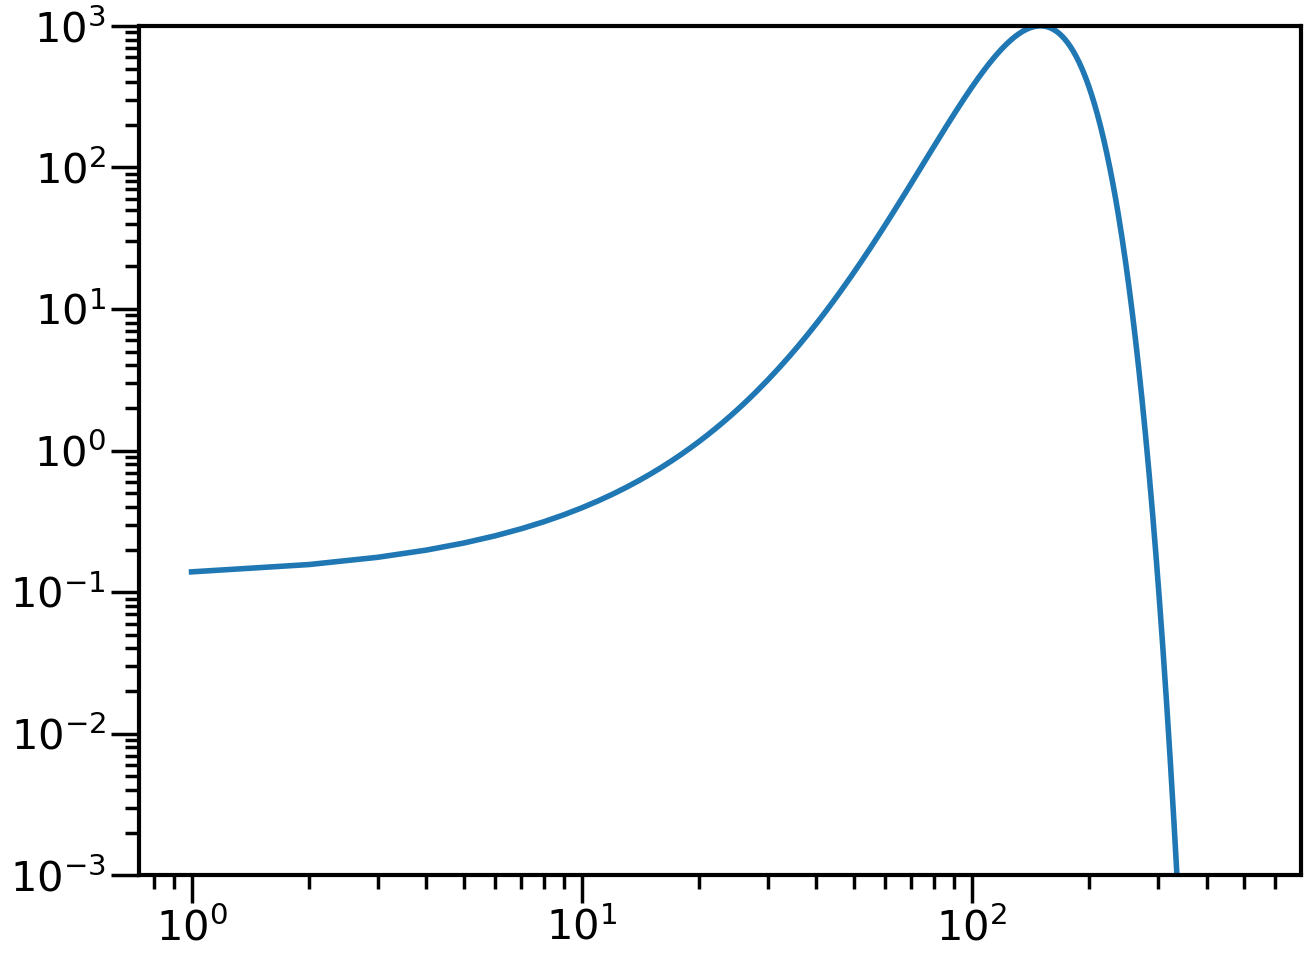

In [10]:
l0w=np.arange(512)+1
ww=1000*np.exp(-(l0w-150)**2/50**2)

loglog(l0w,ww)
ylim(1.e-3,1e3)

In [11]:
corr_ggl=('galaxy','shear')
corr_gg=('galaxy','galaxy')
corr_ll=('shear','shear')

In [12]:
window_cl_fact=1
if unit_window:
    window_cl_fact=0

In [13]:
z0=0.5
zl_bin1=lsst_source_tomo_bins(zp=np.array([z0]),p_zp=np.array([1]),ns=10,use_window=use_window,nbins=1,window_cl_fact=window_cl_fact*.1,
                         f_sky=f_sky,nside=nside,unit_win=True)
zl_bin1w=lsst_source_tomo_bins(zp=np.array([z0]),p_zp=np.array([1]),ns=30,use_window=use_window,window_cl_fact=window_cl_fact+.1,#(1+ww/5),
                              f_sky=f_sky,nbins=n_source_bins,nside=nside)

ns0:  27.0
Win gen: step size 513


./cov_utils.py:60: RuntimeWarning: invalid value encountered in true_divide
  Win0=2*jn(1,l_th)/l_th
./angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide
  self.cl_f=(l+0.5)**2/(l*(l+1.)) # cl correction from Kilbinger+ 2017
/usr/lib/python3.7/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


cl dict done
ns0:  27.0
Win gen: step size 513
cl dict done


/usr/lib/python3.7/site-packages/healpy/sphtfunc.py:402: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [14]:
z0=1 #1087
zs_bin1=lsst_source_tomo_bins(zp=np.array([z0]),p_zp=np.array([1]),ns=30,use_window=use_window,window_cl_fact=window_cl_fact,
                              f_sky=f_sky,nbins=n_source_bins,nside=nside,unit_win=False)

zs_bin1w=lsst_source_tomo_bins(zp=np.array([z0]),p_zp=np.array([1]),ns=30,use_window=use_window,window_cl_fact=(1+ww)*window_cl_fact+1,
                              f_sky=f_sky,nbins=n_source_bins,nside=nside)

ns0:  27.000000000000004
Win gen: step size 513
cl dict done
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
ns0:  27.000000000000004
Win gen: step size 513
cl dict done
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/usr/lib/python3.7/site-packages/healpy/projaxes.py:1194: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/usr/lib/python3.7/site-packages/healpy/projaxes.py:1153: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
05:35:43 WARNING:findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


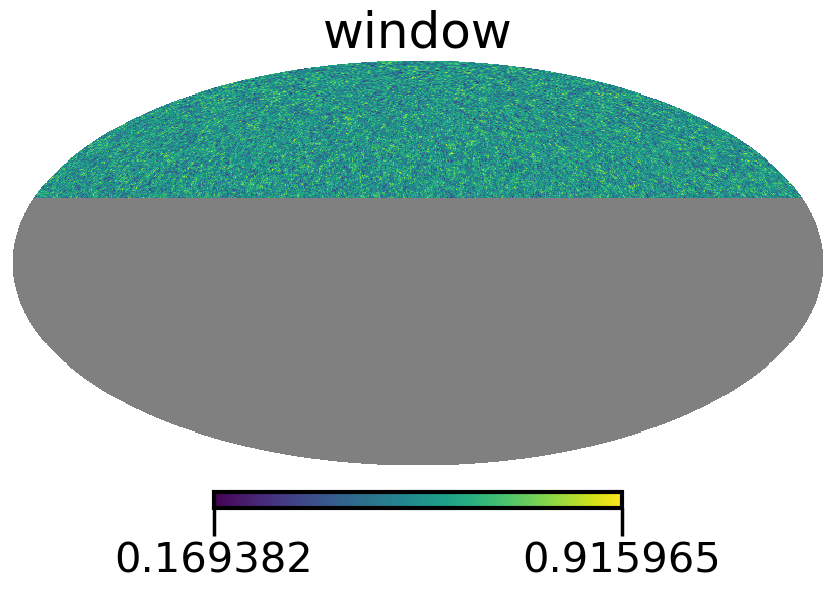

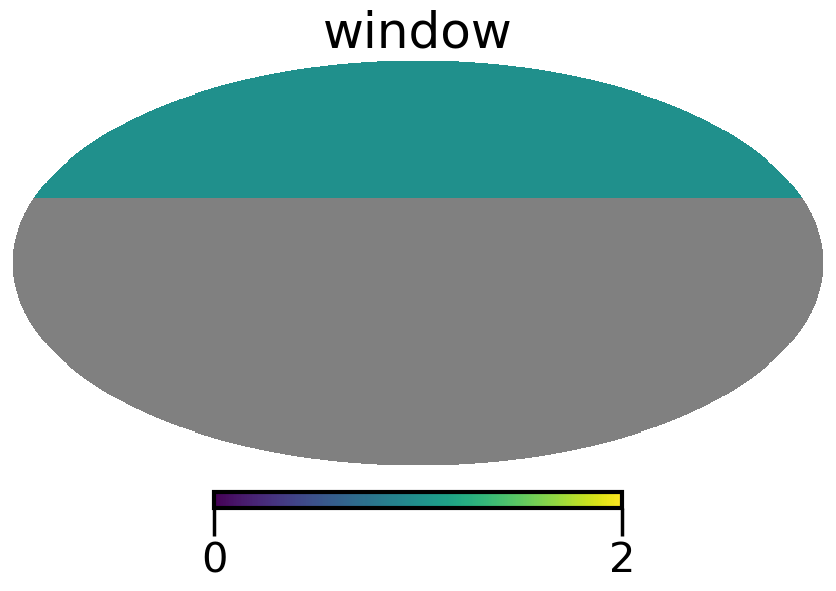

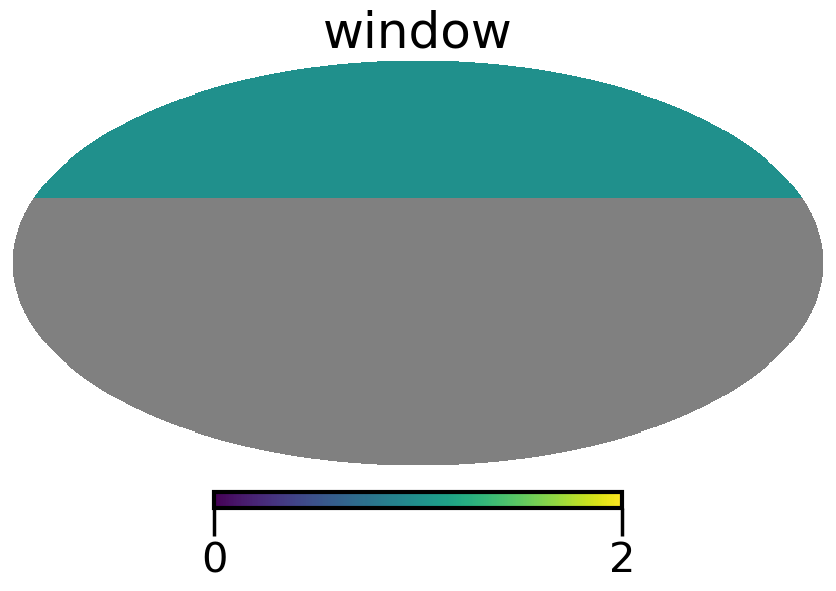

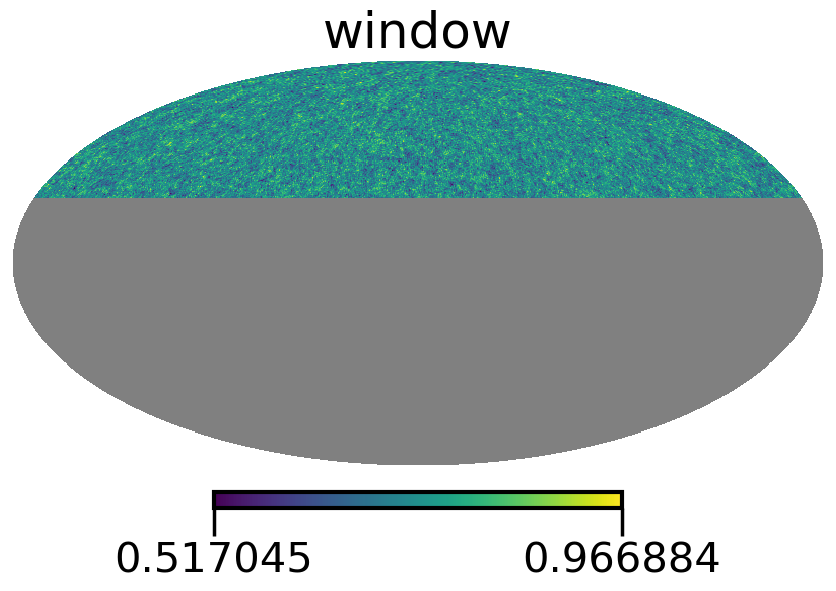

In [15]:
hp.mollview(zs_bin1w[0]['window'],title='window')
hp.mollview(zs_bin1[0]['window'],title='window')
hp.mollview(zl_bin1[0]['window'],title='window')
hp.mollview(zl_bin1w[0]['window'],title='window')

In [16]:
th_min=1./60
th_max=600./60
n_th_bins=20
th_bins=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins+1)
th=np.logspace(np.log10(th_min*0.98),np.log10(1),n_th_bins*30)
th2=np.linspace(1,th_max*1.02,n_th_bins*30)
# th2=np.logspace(np.log10(1),np.log10(th_max),60*6)
th=np.unique(np.sort(np.append(th,th2)))
thb=np.sqrt(th_bins[1:]*th_bins[:-1])

# HT_kwargs={'l_min':l_min,  'l_max':l_max,
#                         'theta_min':th_min*d2r*.9, 'theta_max':th_max*d2r,
#                         'n_zeros':40000, 'prune_theta':prune_theta, 'm1_m2':[(2,2),(2,-2),(0,2),(0,0)]}
l0_win=np.arange(lmax_cl)
WT_L_kwargs={'l': l0_win,'theta': th*d2r,'m1_m2':[(2,2),(2,-2),(0,2),(2,0),(0,0)]}
WT_L=None
if do_xi:
    %time WT_L=wigner_transform(**WT_L_kwargs)

In [17]:
bin_xi=True

In [18]:
import window_utils
reload(window_utils)
from window_utils import *

import tracer_utils
reload(tracer_utils)
from tracer_utils import *


import cov_3X2
reload(cov_3X2)
from cov_3X2 import *

In [19]:
do_cov=True
store_win=True

In [20]:
corrs=[corr_ll,corr_ggl,corr_gg]
window_lmax=1000  #0.5 % difference between 100 and 400, for unit window, 2% for realistic window

In [21]:
client

<Client: scheduler='inproc://136.152.250.206/1530/2' processes=1 cores=10>

In [22]:
import tracemalloc

In [23]:
tracemalloc.clear_traces()
tracemalloc.start()


t1=time.time()
kappa_win=cov_3X2(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=zl_bin1,
            use_window=use_window,store_win=store_win,window_lmax=window_lmax,corrs=corrs,
            SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
            HT=WT_L,bin_xi=bin_xi,theta_bins=th_bins,do_xi=do_xi,
                 #Win=kappa_win.Win.Win
                 )

t2=time.time()
print('W done',t2-t1)
%time clG_win=kappa_win.cl_tomo(corrs=corrs) 
%time cl0_win=clG_win['stack'].compute()

if do_xi:
    %time xiWG_L=kappa_win.xi_tomo()
    %time xiW_L=xiWG_L['stack'].compute()

Win gen: step size 101
wigner_files: {0: 'temp/dask_wig3j_l6500_w1100_0_reorder.zarr', 2: 'temp/dask_wig3j_l6500_w1100_2_reorder.zarr'}
wigner done dict_keys([0, 2])
setting windows <Client: scheduler='inproc://136.152.250.206/1530/2' processes=1 cores=10>
got window cls, now to coupling matrices.
coupling_matrix_large  0.7488658428192139 [0 0]
coupling_matrix_large  1.0500047206878662 [0 0]
coupling_matrix_large  0.42056703567504883 [0 0]
coupling_matrix_large  1.5164031982421875 [0 0]
coupling_matrix_large  1.5219049453735352 [0 0]
coupling_matrix_large  1.5279505252838135 [2 2 2 2]
coupling_matrix_large  1.5350983142852783 [2 2]
coupling_matrix_large  1.5526297092437744 [0 2]
coupling_matrix_large  1.583885669708252 [0 2]
coupling_matrix_large  1.6990299224853516 [0 2]
coupling_matrix_large  1.331707239151001 [0 0]
coupling_matrix_large  1.3513569831848145 [2 2 2 2]
coupling_matrix_large  1.3014473915100098 [2 0]
coupling_matrix_large  1.370727777481079 [0 0]
coupling_matrix_large  

coupling_matrix_large  0.7988395690917969 [2 2]
coupling_matrix_large  0.784311056137085 [0 0]
coupling_matrix_large  0.86293625831604 [2 2]
coupling_matrix_large  0.840672492980957 [0 0]
done coupling submatrix  707 19.909573554992676 3.9402315616607666
coupling_matrix_large  0.7158899307250977 [0 0]
coupling_matrix_large  0.7318286895751953 [0 0]
coupling_matrix_large  0.5760793685913086 [0 0]
coupling_matrix_large coupling_matrix_large  1.4173638820648193 [0 2]
 coupling_matrix_large 1.4148457050323486 [0 2]
 1.4245758056640625 [0 2]
coupling_matrix_large  1.5114541053771973 [2 2]
coupling_matrix_large  1.517383098602295 [0 0]
coupling_matrix_large  1.755828857421875 [2 2 2 2]
coupling_matrix_large  1.7582509517669678 [0 0]
coupling_matrix_large  1.3053817749023438 [2 0]
coupling_matrix_large  1.3181569576263428 [0 0]
coupling_matrix_large  1.2758276462554932 [0 0]
coupling_matrix_large  1.3279039859771729 [2 2]
coupling_matrix_large  1.2083184719085693 [0 0]
coupling_matrix_large  

coupling_matrix_large  0.8350405693054199 [0 0]
coupling_matrix_large  0.8334865570068359 [2 2]
coupling_matrix_large  0.8665547370910645 [2 2]
coupling_matrix_large  0.8818840980529785 [0 0]
done coupling submatrix  1515 21.767986297607422 5.412288665771484
coupling_matrix_large  0.720970630645752 [0 0]
coupling_matrix_large  0.80790114402771 [0 0]
coupling_matrix_large  0.5715527534484863 [0 0]
coupling_matrix_large  1.4246089458465576 [0 2]
coupling_matrix_large coupling_matrix_large  1.4284825325012207 [0 2]
 1.4318344593048096 [0 2]
coupling_matrix_large  1.5057454109191895 [2 2]
coupling_matrix_large  1.5499365329742432 [0 0]
coupling_matrix_large  1.781242847442627 [2 2 2 2]
coupling_matrix_large  1.7864580154418945 [0 0]
coupling_matrix_large  1.3007311820983887 [0 0]
coupling_matrix_large  1.303300380706787 [2 0]
coupling_matrix_large  1.3230609893798828 [2 2]
coupling_matrix_large  1.3064417839050293 [0 0]
coupling_matrix_large  1.1465740203857422 [0 0]
coupling_matrix_large 

coupling_matrix_large  0.8164746761322021 [0 0]
coupling_matrix_large  0.8145806789398193 [2 2]
coupling_matrix_large  0.8471333980560303 [0 0]
coupling_matrix_large  0.8481974601745605 [2 2]
done coupling submatrix  2323 23.35388731956482 6.863114356994629
coupling_matrix_large  0.7041835784912109 [0 0]
coupling_matrix_large  0.7187192440032959 [0 0]
coupling_matrix_large  0.5850157737731934 [0 0]
coupling_matrix_large  1.4422011375427246 [0 2]
coupling_matrix_large  1.450791358947754 [0 2]
coupling_matrix_large  1.49509596824646 [0 0]
coupling_matrix_large  1.5015099048614502 [0 0]
coupling_matrix_large  1.5089542865753174 [0 2]
coupling_matrix_large  1.7559120655059814 [2 2]
coupling_matrix_large  1.765416145324707 [2 2 2 2]
coupling_matrix_large  1.3038654327392578 [0 0]
coupling_matrix_large  1.2902812957763672 [0 0]
coupling_matrix_large  1.290705919265747 [2 0]
coupling_matrix_large  1.3306446075439453 [0 0]
coupling_matrix_large  1.219930648803711 [2 2]
coupling_matrix_large  1

In [24]:
snapshot1 = tracemalloc.take_snapshot()

In [25]:
top_stats = snapshot1.statistics('lineno')
top_stats

[<Statistic traceback=<Traceback (<Frame filename='./window_utils.py' lineno=389>,)> size=282079624 count=19>,
 <Statistic traceback=<Traceback (<Frame filename='./window_utils.py' lineno=388>,)> size=282079560 count=17>,
 <Statistic traceback=<Traceback (<Frame filename='./window_utils.py' lineno=248>,)> size=211559304 count=6>,
 <Statistic traceback=<Traceback (<Frame filename='/usr/lib/python3.7/site-packages/numpy/core/numeric.py' lineno=1203>,)> size=75270360 count=7>,
 <Statistic traceback=<Traceback (<Frame filename='/usr/lib/python3.7/site-packages/numpy/core/einsumfunc.py' lineno=1346>,)> size=70532016 count=4>,
 <Statistic traceback=<Traceback (<Frame filename='./window_utils.py' lineno=250>,)> size=70519768 count=2>,
 <Statistic traceback=<Traceback (<Frame filename='/home/deep/repos/cosmic_shear/power_spectra.py' lineno=277>,)> size=8002560 count=104>,
 <Statistic traceback=<Traceback (<Frame filename='./tracer_utils.py' lineno=178>,)> size=4750720 count=6>,
 <Statistic tra

In [26]:
stat = top_stats[3]
print("%s memory blocks: %.1f MiB" % (stat.count, stat.size / 1024**2))
for line in stat.traceback.format():
    print(line)

7 memory blocks: 71.8 MiB
  File "/usr/lib/python3.7/site-packages/numpy/core/numeric.py", line 1203
    return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)


In [27]:
from pympler import tracker
from operator import itemgetter

mem = tracker.SummaryTracker()
outp_t=np.array(sorted(mem.create_summary(), reverse=True, key=itemgetter(2))[:10])
outp_t[:,2]/=1024*1024*1024
print(outp_t)

[["<class 'numpy.ndarray" '422' '1555752738']
 ["<class 'str" '233824' '35503774']
 ["<class 'dict" '58022' '20397792']
 ["<class 'code" '57789' '8382528']
 ["<class 'list" '65225' '8251072']
 ["<class 'type" '6221' '6666032']
 ["<class 'tuple" '37589' '2632736']
 ["<class 'set" '3471' '1993760']
 ["<class 'int" '31398' '1481636']
 ["<class 'weakref" '10514' '841120']]


In [28]:
import gc
gc.collect()
import sys
bi=(0,0)
# from memory_profiler import profile
sys.getsizeof(kappa_win.Win.Win['cl'][corr_ll][bi]['M'])/1e6,sys.getsizeof(cl0_win['cov'])/1e6

(70.5198, 0.109624)

In [29]:
l=kappa_win.window_l
Om_W=np.pi*4*f_sky
theta_win=np.sqrt(Om_W/np.pi)
l_th=l*theta_win
Win0=2*jn(1,l_th)/l_th
Win0=np.nan_to_num(Win0)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [30]:
zs_bin1[0].keys()

dict_keys(['z', 'dz', 'nz', 'ns', 'W', 'pz', 'pzdz', 'Norm', 'b1', 'AI', 'AI_z', 'mag_fact', 'lm', 'Gkernel', 'Gkernel_int', 'gkernel', 'gkernel_int', 'kernel_int', 'window', 'window_alm', 'window_cl'])

In [31]:
kappa_win.z_bins.keys()

dict_keys(['shear', 'galaxy'])

In [32]:
bi=(0,0)

In [33]:
R=kappa_win.Win.Win['cl'][corr_gg][bi]['M']/kappa_win.Win.Win['cl'][corr_ll][bi]['M']
R=np.nan_to_num(R)
x=R>0
R[x].max()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


1.7976931348623157e+308

In [ ]:
kappa_win_w=cov_3X2(zs_bins=zs_bin1w,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=zl_bin1w,
            use_window=use_window,store_win=store_win,window_lmax=window_lmax,corrs=corrs,
            SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
            HT=WT_L,bin_xi=bin_xi,theta_bins=th_bins,do_xi=do_xi,
                   #Win=kappa_win_w.Win.Win
                   )

%time clG_win_w=kappa_win_w.cl_tomo(corrs=corrs) 
%time cl0_win_w=clG_win_w['stack'].compute()

if do_xi:
    %time xiWG_L_w=kappa_win_w.xi_tomo()
    %time xiW_L_w=xiWG_L_w['stack'].compute()

Win gen: step size 101
wigner_files: {0: 'temp/dask_wig3j_l6500_w1100_0_reorder.zarr', 2: 'temp/dask_wig3j_l6500_w1100_2_reorder.zarr'}
wigner done dict_keys([0, 2])
setting windows <Client: scheduler='inproc://136.152.250.206/1530/2' processes=1 cores=10>
got window cls, now to coupling matrices.
coupling_matrix_large coupling_matrix_large  0.6527774333953857 [0 0]
 0.6539466381072998 [0 0]
coupling_matrix_large  0.6100809574127197 [0 0]
coupling_matrix_large  1.4480009078979492 [0 0]
coupling_matrix_large  1.4556233882904053 [0 0]
coupling_matrix_large  1.4877102375030518 [0 2]
coupling_matrix_large  1.4959766864776611 [2 2 2 2]
coupling_matrix_large  1.5168442726135254 [0 2]
coupling_matrix_large  1.7548816204071045 [0 2]
coupling_matrix_large  1.7627193927764893 [2 2]
coupling_matrix_large  1.305516242980957 [0 0]
coupling_matrix_large  1.2821860313415527 [2 0]
coupling_matrix_large  1.347564458847046 [0 0]
coupling_matrix_large  1.3317570686340332 [2 2 2 2]
coupling_matrix_large  

coupling_matrix_large  1.2799184322357178 [2 2 2 2]
coupling_matrix_large  0.8098104000091553 [2 2]
coupling_matrix_large  0.8049221038818359 [0 0]
coupling_matrix_large  0.8301620483398438 [2 2]
coupling_matrix_large  0.8351831436157227 [0 0]
done coupling submatrix  707 19.986270904541016 3.963427782058716
coupling_matrix_large  0.7165756225585938 [0 0]
coupling_matrix_large  0.73396897315979 [0 0]
coupling_matrix_large  0.6064145565032959 [0 0]
coupling_matrix_large  1.4800281524658203 [0 0]
coupling_matrix_large  1.4792954921722412 [0 0]
coupling_matrix_large  1.5324466228485107 [2 2]
coupling_matrix_large coupling_matrix_large  1.5426976680755615 [2 2 2 2] 1.5462992191314697 [0 2]

coupling_matrix_large  1.7489829063415527 [0 2]
coupling_matrix_large  1.7580599784851074 [0 2]
coupling_matrix_large  1.306962013244629 [0 0]
coupling_matrix_large  1.3546037673950195 [0 0]
coupling_matrix_large coupling_matrix_large  1.2903220653533936 [2 2 2 2]
 1.3025226593017578 [2 2]
coupling_matr

coupling_matrix_large  0.7968809604644775 [2 2]
coupling_matrix_large  0.8278660774230957 [0 0]
coupling_matrix_large  0.8406994342803955 [2 2]
coupling_matrix_large  0.8787131309509277 [0 0]
done coupling submatrix  1515 21.964547872543335 5.571029424667358
coupling_matrix_large  0.7199606895446777 [0 0]
coupling_matrix_large  0.771127462387085 [0 0]
coupling_matrix_large  0.6114842891693115 [0 0]
coupling_matrix_large  1.5404629707336426 [0 0]
coupling_matrix_large  1.5464699268341064 [0 2]
coupling_matrix_large  1.5478639602661133 [2 2]
coupling_matrix_large coupling_matrix_large  1.5595414638519287 [0 0]
 1.5553288459777832 [0 2]
coupling_matrix_large  1.820739984512329 [0 2]
coupling_matrix_large  1.8440577983856201 [2 2 2 2]
coupling_matrix_large  1.3180930614471436 [0 0]
coupling_matrix_large  1.3023924827575684 [0 0]
coupling_matrix_large  1.3353333473205566 [0 0]
coupling_matrix_large  1.3474552631378174 [2 2]
coupling_matrix_large  1.2042474746704102 [2 0]
coupling_matrix_lar

In [ ]:
kappa0=cov_3X2(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=zl_bin1,
            use_window=False,store_win=store_win,corrs=corrs,
            SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
            HT=WT_L,bin_xi=bin_xi,theta_bins=th_bins,do_xi=do_xi)

%time clG0=kappa0.cl_tomo(corrs=corrs) 
%time cl0=clG0['stack'].compute()

if do_xi:
    %time xiG_L0=kappa0.xi_tomo()
    %time xi_L0=xiG_L0['stack'].compute()

In [ ]:
zl_bin1[0]['lm']

In [ ]:
kappa0.Ang_PS.z.shape

In [ ]:
bi=(0,0)
cl0={'cl_b':{},'cov':{},'cl':{}}
cl0_win_w={'cl_b':{},'cov':{}}
cl0_win={'cl_b':{},'cov':{}}
for corr in corrs:
    cl0['cl_b'][corr]=clG0['cl_b'][corr][bi].compute()
    cl0['cl'][corr]=clG0['cl'][corr][bi].compute()
    cl0['cov'][corr]=clG0['cov'][corr+corr][bi+bi].compute()
    
    cl0_win['cl_b'][corr]=clG_win['cl_b'][corr][bi].compute()
    cl0_win['cov'][corr]=clG_win['cov'][corr+corr][bi+bi].compute()['final_b']
    
    cl0_win_w['cl_b'][corr]=clG_win_w['cl_b'][corr][bi].compute()
    cl0_win_w['cov'][corr]=clG_win_w['cov'][corr+corr][bi+bi].compute()['final_b']

In [ ]:
cl0['cl'][corr_gg]

In [ ]:
plot(lb,cl0['cl_b'][corr_gg])
plot(l0,cl0['cl'][corr_gg])
loglog()

In [ ]:
mask=zs_bin1[0]['window']>-1.e-20

In [ ]:
win2=zs_bin1[0]['window']/zs_bin1[0]['window']
win2[~mask]=hp.UNSEEN
win2[mask]=1.
cl_t2=hp.anafast(win2)

In [ ]:
np.arange(len(cl_t2))

In [ ]:
def corr_matrix(cov_mat=[]): #correlation matrix
    diag=np.diag(cov_mat)
    return cov_mat/np.sqrt(np.outer(diag,diag))

In [ ]:
def bin_coupling_M(kappa_class,coupling_M): #following https://arxiv.org/pdf/astro-ph/0105302.pdf 
#construct coupling matrix for the binned c_ell. This assumes that the C_ell within a bin follows powerlaw. 
#Without this assumption we cannot undo the effects of binning
    l=kappa_class.l
    bin_M=kappa_win.cl_bin_utils['binning_mat']
    l2=l*(l+1)
    x=l==0
    l2[x]=1
    Q=bin_M.T*np.pi*2/(l2)
    P=bin_M.T*(l2)/(np.pi*2)
    P=P.T/(kappa_class.l_bins[1:]-kappa_class.l_bins[:-1])
    return P.T@coupling_M@Q.T

In [ ]:
def bin_coupling_M2(kappa_class,coupling_M): #following https://arxiv.org/pdf/astro-ph/0105302.pdf 
#construct coupling matrix for the binned c_ell. This assumes that the C_ell within a bin follows powerlaw. 
#Without this assumption we cannot undo the effects of binning
    l=kappa_class.l
    bin_M=kappa_win.cl_bin_utils['binning_mat']
    
    l2=l*(l+1)
    x=l==0
    l2[x]=1
    
    Q=bin_M.T*np.pi*2/(l2)**2
    P=bin_M.T*(l2)**2/(np.pi*2)
    P=P.T/(kappa_class.l_bins[1:]-kappa_class.l_bins[:-1])
    return P.T@coupling_M@Q.T

In [ ]:
a=kappa_win.SN[corr_gg][(0,0)]*False
a

In [ ]:
seed=12334
def get_clsim2(clg0,window,mask,kappa_class,coupling_M,coupling_M_inv,ndim,i):
    print(i)
    local_state = np.random.RandomState(seed+i)
    cl_map=hp.synfast(clg0,nside=nside,RNG=local_state,new=True,pol=True)

    if ndim>1:
        cl_map[0]*=window['galaxy']
        cl_map[0][mask['galaxy']]=hp.UNSEEN
        cl_map[1]*=window['shear'] #shear_1
        cl_map[2]*=window['shear']#shear_2
        cl_map[1][mask['shear']]=hp.UNSEEN
        cl_map[2][mask['shear']]=hp.UNSEEN
        clpi=hp.anafast(cl_map, lmax=max(l),pol=True) #TT, EE, BB, TE, EB, TB for polarized input map
        clpi=clpi[:,l]
        clpi=clpi[[0,1,3],:]
#             for i in np.arange(6):

    else:
        cl_map*=window
        cl_map[mask]=hp.UNSEEN
        clpi=hp.anafast(cl_map, lmax=max(l),pol=True)[l]
        
    del cl_map

    if ndim>1:
        clpi[0]-=(np.ones_like(clpi[0])*kappa_class.SN[corr_gg][:,0,0])@coupling_M[corr_gg]*use_shot_noise
        clpi[1]-=(np.ones_like(clpi[1])*kappa_class.SN[corr_ll][:,0,0])@coupling_M[corr_ll]*use_shot_noise
        clpi[1]-=(np.ones_like(clpi[1])*kappa_class.SN[corr_ll][:,0,0])@coupling_M['shear_B']*use_shot_noise #remove B-mode leakage

        clgi=[clpi[0]@coupling_M_inv[corr_gg],
              clpi[1]@coupling_M_inv[corr_ll],
              clpi[2]@coupling_M_inv[corr_ggl]]
    else:
        clpi-=(np.ones_like(clpi)*shot_noise)@coupling_M
        clgi=clpi@coupling_M_inv
    clgi=np.array(clgi)
    return [clpi.T,clgi.T]



In [ ]:
def calc_sim_stats(sim=[],sim_truth=[],PC=False):
    sim_stats={}
    sim_stats['std']=np.std(sim,axis=0)    
    sim_stats['mean']=np.mean(sim,axis=0)
    sim_stats['median']=np.median(sim,axis=0)
    sim_stats['percentile']=np.percentile(sim,[16,84],axis=0)
    sim_stats['skew']=skew(sim,axis=0)
    sim_stats['kurt']=kurtosis(sim,axis=0)
    sim_stats['cov']=np.cov(sim,rowvar=0)
    
    if not PC:
        try:
            sim_stats['cov_ev'],sim_stats['cov_evec']=np.linalg.eig(sim_stats['cov'])
            sim_stats['PC']={}
            sim_stats['PC']['data']=(sim_stats['cov_evec'].T@sim.T).T
            sim_stats['PC']['stats']=calc_sim_stats(sim=sim_stats['PC']['data'],PC=True)
        except Exception as err:
            print(err)
            sim_stats['PC']=err
    else:
        sim_truth=sim_stats['mean']
    
    sim_stats['percetile_score']=np.zeros_like(sim_stats['std'])
    if len(sim_stats['std'].shape)==1:
        for i in np.arange(len(sim_stats['std'])):
            sim_stats['percetile_score'][i]=percentileofscore(sim[:,i],sim_truth[i])
    elif len(sim_stats['std'].shape)==2:
        for i in np.arange(len(sim_stats['std'])):
            for i_dim in np.arange(2):
                for j_dim in np.arange(2):
                    sim_stats['percetile_score'][i][i_dim,j_dim]=percentileofscore(sim[:,i,i_dim,j_dim],
                                                                                   sim_truth[i,i_dim,j_dim])
    else:
        sim_stats['percetile_score']='not implemented for ndim>2'
    return sim_stats
    
def sim_cl_xi(Rsize=150,do_norm=False,cl0=None,kappa_class=None,fsky=f_sky,zbins=None,use_shot_noise=True,
             convolve_win=False,nside=nside,use_cosmo_power=True):
    l=kappa_class.l
    shear_lcut=l>=2
    
    l_bins=kappa_class.l_bins
    dl=l_bins[1:]-l_bins[:-1]
    nu=(2.*l+1.)*fsky
    
    coupling_M={}
    coupling_M4={}
    coupling_M_binned={}
    coupling_M_binned2={}
    coupling_M4_binned={}
    coupling_M4_binned2={}
    
    coupling_M_inv={}
    coupling_M_binned_inv={}
    coupling_M_binned2_inv={}
    mask={}
    window={}
    if convolve_win:
        nu=2.*l+1.
        
        for tracer in kappa_class.z_bins.keys():
            window[tracer]=kappa_class.z_bins[tracer][0]['window']
            mask[tracer]=window[tracer]==hp.UNSEEN
        for corr in corrs:
            coupling_M[corr]=kappa_class.Win.Win['cl'][corr][(0,0)]['M']
            if corr==corr_ll:
                coupling_M['shear_B']=kappa_class.Win.Win['cl'][corr][(0,0)]['M_B']
            coupling_M_binned[corr]=bin_coupling_M(kappa_class,coupling_M[corr])
            coupling_M_binned2[corr]=kappa_class.binning.bin_2d(cov=coupling_M[corr],bin_utils=kappa_class.cl_bin_utils) 
            coupling_M_binned2[corr]*=dl
            
#             coupling_M4=kappa_win.Win.Win['cov'][corr+corr][(0,0,0,0)]['M1324'][s] #*2
#             coupling_M4_binned[corr]=bin_coupling_M(kappa_class,coupling_M4[corr])
#             coupling_M4_binned2[corr]=kappa_class.binning.bin_2d(cov=coupling_M4[corr],bin_utils=kappa_class.cl_bin_utils) 
#             coupling_M4_binned2[corr]*=dl
#         kappa_class.binning.bin_2d(cov=coupling_M,bin_utils=kappa_win.cl_bin_utils)
#             print(corr,coupling_M[corr])
            
            cut=l>0
            if 'shear' in corr:
                cut=shear_lcut 
            coupling_M_inv[corr]=np.zeros_like(coupling_M[corr])
            coupling_M_inv[corr][:,cut][cut,:]=np.linalg.inv(coupling_M[corr][cut,:][:,cut]) #otherwise we get singular matrix since for shear l<2 is not defined.
            
            coupling_M_binned_inv[corr]=np.linalg.inv(coupling_M_binned[corr])
            coupling_M_binned2_inv[corr]=np.linalg.inv(coupling_M_binned2[corr])
    outp={}
    win=0
    if cl0 is None:
        cl0={}
        clp0={}
        clG0=kappa_class.cl_tomo() 
        for corr in kappa_class.corrs:
            cl0[corr]=clG0['cl'][corr][(0,0)].compute()
            clp0[corr]=clG0['cl_b'][corr][(0,0)].compute()
    clg0={}
    for corr in kappa_class.corrs: #ordering: TT, EE, BB, TE if 4 cl as input.. use newbool=True
        shot_noise=0
        if corr[0]==corr[1]:
            shot_noise=kappa_class.SN[corr][:,0,0]
        shot_noise=shot_noise*use_shot_noise
        clg0[corr]=cl0[corr]*use_cosmo_power+shot_noise
        if corr==('shear','shear'):
            clg0['shear_B']=cl0[corr]*0+shot_noise
    ndim=len(kappa_class.corrs)
    print('ndim:',ndim)
    outp['clg0_0']=clg0.copy()
    outp['ndim']=ndim
    if ndim>1:
        clg0=(clg0[corr_gg],clg0[corr_ll],clg0['shear_B'],clg0[corr_ggl])#ordering: TT, EE, BB, TE if 4 cl as input.. use newbool=True
    else:
        clg0=clg0[corr_gg]
    
    SN=kappa_class.SN
    sim_cl_shape=(Rsize,len(kappa_class.l),ndim)
    clp=np.zeros(sim_cl_shape,dtype='float32')
    clg=np.zeros(sim_cl_shape,dtype='float32')
    lmax=max(l)
    lmin=min(l)
    
    seed=12334
    def get_clsim(i):
        print('doing map: ',i)
        local_state = np.random.RandomState(seed+i)
        cl_map=hp.synfast(clg0,nside=nside,RNG=local_state,new=True,pol=True)
        
        if ndim>1:
            cl_map[0]*=window['galaxy']
            cl_map[0][mask['galaxy']]=hp.UNSEEN
            cl_map[1]*=window['shear'] #shear_1
            cl_map[2]*=window['shear']#shear_2
            cl_map[1][mask['shear']]=hp.UNSEEN
            cl_map[2][mask['shear']]=hp.UNSEEN
            clpi=hp.anafast(cl_map, lmax=max(l),pol=True) #TT, EE, BB, TE, EB, TB for polarized input map
            clpi=clpi[:,l]
            clpi=clpi[[0,1,3],:]
#             for i in np.arange(6):
            
            
        else:
            cl_map*=window
            cl_map[mask]=hp.UNSEEN
            clpi=hp.anafast(cl_map, lmax=max(l),pol=True)[l]

        if ndim>1:
            clpi[0]-=(np.ones_like(clpi[0])*SN[corr_gg][:,0,0])@coupling_M[corr_gg]*use_shot_noise
            clpi[1]-=(np.ones_like(clpi[1])*SN[corr_ll][:,0,0])@coupling_M[corr_ll]*use_shot_noise
            clpi[1]-=(np.ones_like(clpi[1])*SN[corr_ll][:,0,0])@coupling_M['shear_B']*use_shot_noise #remove B-mode leakage
            
            clgi=[clpi[0]@coupling_M_inv[corr_gg],
                  clpi[1]@coupling_M_inv[corr_ll],
                  clpi[2]@coupling_M_inv[corr_ggl]]
        else:
            clpi-=(np.ones_like(clpi)*shot_noise)@coupling_M
            clgi=clpi@coupling_M_inv
        clgi=np.array(clgi)
        return clpi.T,clgi.T
    
    def comb_maps(futures):
        for i in np.arange(Rsize):
            x=futures[i]#.compute()
            clp[i,:,:]+=x[0]
            clg[i,:,:]+=x[1]
        return clp,clg 
    
    print('generating maps')
    if convolve_win:
        futures={}
#         for i in np.arange(Rsize):
#             futures[i]=dask.delayed(get_clsim)(i)  
#         print(futures)
#         clpg=dask.delayed(comb_maps)(futures)
#         clpg.compute()
        i=0
        j=0
        step=10 # min(10,Rsize)
        funct=partial(get_clsim2,clg0,window,mask,SN,coupling_M,coupling_M_inv,ndim)
#         x=funct(1)
#         print(x)
#         print('step: ',step)
        while j<Rsize:
            futures={}
#         for j in np.arange(Rsize/1):
#             pool=Pool(5)
#             i_iter=np.arange(step)+i
#             futures=pool.map(funct,i_iter)
#             pool.close()
            for ii in np.arange(step):
#               futures[ii]=client.submit(get_clsim,i+ii)  
                futures[ii]=delayed(get_clsim)(i+ii)  
    #         r=client.gather(futures)
    #         futures=client.map(get_clsim,np.arange(Rsize))
#             print('done submits: ',i)
            futures=client.compute(futures)
            for ii in np.arange(step):
                clp[i,:],clg[i,:]=futures.result()[ii]
#                 clp[i,:],clg[i,:]=#client.submit(get_clsim,i)
#                 clp[i,:]=futures[ii][0]
#                 clg[i,:]=futures[ii][1]
#                 futures[ii]=None
                i+=1
            print('done map ',i)
            del futures
            client.restart()
            j+=step
        
    print('done generating maps')
    
    clg_b=None
    clp_b=None
    nu_b=None
    if l_bins is not None:
        clg0_b={corr: kappa_class.binning.bin_1d(xi=cl0[corr],bin_utils=kappa_class.cl_bin_utils) for corr in kappa_class.corrs} 
        ll=kappa_class.cl_bin_utils['bin_center']
        sim_clb_shape=(Rsize,len(ll),ndim)
        nu_b=(2.*ll+1.)*fsky*(l_bins[1:]-l_bins[:-1])
        clg_b=np.zeros(sim_clb_shape,dtype='float32')
        clg_b2=np.zeros(sim_clb_shape,dtype='float32')
        clg_b22=np.zeros(sim_clb_shape,dtype='float32')
        clp_b=np.zeros(sim_clb_shape,dtype='float32')
        
        corr_t=[corr_gg,corr_ll,corr_ggl]
        for i in np.arange(Rsize):
            for ii in np.arange(ndim):
                clg_b[i,:,ii]=kappa_class.binning.bin_1d(xi=clg[i,:,ii],bin_utils=kappa_class.cl_bin_utils)
                clp_b[i,:,ii]=kappa_class.binning.bin_1d(xi=clp[i,:,ii],bin_utils=kappa_class.cl_bin_utils)
                clg_b2[i,:,ii]=clp_b[i,:,ii]@coupling_M_binned_inv[corr_t[ii]]
                clg_b22[i,:,ii]=clp_b[i,:,ii]@coupling_M_binned2_inv[corr_t[ii]]
            
        outp['clg_b_stats']={corr_t[ii]: calc_sim_stats(sim=clg_b[:,:,ii],sim_truth=clg0_b[corr_t[ii]]) for ii in np.arange(ndim)}
        outp['clg_b2_stats']={corr_t[ii]: calc_sim_stats(sim=clg_b2[:,:,ii],sim_truth=clg0_b[corr_t[ii]]) for ii in np.arange(ndim)}
        outp['clg_b22_stats']={corr_t[ii]: calc_sim_stats(sim=clg_b22[:,:,ii],sim_truth=clg0_b[corr_t[ii]]) for ii in np.arange(ndim)}
        outp['clp_b_stats']={corr_t[ii]: calc_sim_stats(sim=clp_b[:,:,ii],sim_truth=clp_b[:,:,ii].mean(axis=0)) for ii in np.arange(ndim)}
#         outp['clp_b_stats']=calc_sim_stats(sim=clp_b,sim_truth=clp_b.mean(axis=0))
#     xiN=np.zeros((Rsize,len(xi)))
#     xig=np.zeros((Rsize,len(xi)))
#     xigB=np.zeros((Rsize,len(r_bins)-1))
#     xiNB=np.zeros((Rsize,len(r_bins)-1))
#     for i in np.arange(Rsize):
#         r,xig[i,:]=HT.projected_correlation(k_pk=l,pk=clg[i,:],j_nu=0,taper=True,**taper_kw)
#         rb,xigB[i,:]=HT.bin_mat(r=r,mat=xig[i,:],r_bins=r_bins)
#         if do_clN:
#             r,xiN[i,:]=HT.projected_correlation(k_pk=l,pk=clN[i,:],j_nu=0,taper=True,**taper_kw)
#             rb,xiNB[i,:]=HT.bin_mat(r=r,mat=xiN[i,:],r_bins=r_bins)
#     outp['xi_truth']=xi_truth
#    outp['rb']=rb
    outp['clg']=clg
    outp['clp']=clp
    outp['clg_b']=clg_b
    outp['clg_b2']=clg_b2
    outp['clg_b22']=clg_b22
    outp['clp_b']=clp_b
    outp['clg0']=clg0
    outp['cl0']=cl0
    outp['clp0']=clp0
#     outp['clN']=clN
#     outp['xig']=xig
#     outp['xigB']=xigB
#     outp['xiNB']=xiNB
#     outp['xiN']=xiN
    print(clg[:,:,ii])
    clg0_2=np.array(clg0)[[0,1,3],:]
    outp['clg_stats']={corr_t[ii]: calc_sim_stats(sim=clg[:,:,ii],sim_truth=clg0_2[ii]) for ii in np.arange(ndim)}#calc_sim_stats(sim=clg,sim_truth=clg0)
    outp['clp_stats']={corr_t[ii]: calc_sim_stats(sim=clp[:,:,ii],sim_truth=clp[:,:,ii].mean(axis=0)) for ii in np.arange(ndim)}#     calc_sim_stats(sim=clp,sim_truth=clp.mean(axis=0))

#     outp['xig_stats']=calc_sim_stats(sim=xig,sim_truth=xi)
#     if convolve_win:
#         outp['xig_stats0']=calc_sim_stats(sim=xig,sim_truth=xi0)
#     rb,xiB=HT.bin_mat(r=r,mat=xi_truth,r_bins=r_bins)
#     outp['xigB_stats']=calc_sim_stats(sim=xigB,sim_truth=xiB)
#     if do_clN:
#         outp['xiN_stats']=calc_sim_stats(sim=xiN,sim_truth=xi_truth)
#         outp['xiNB_stats']=calc_sim_stats(sim=xiNB,sim_truth=xiB)

    outp['size']=Rsize
    outp['fsky']=fsky
    outp['nu']=nu
    outp['nu_b']=nu_b
    outp['l_bins']=l_bins
    
    outp['coupling_M']=coupling_M
    outp['coupling_M_binned']=coupling_M_binned
    outp['coupling_M_binned2']=coupling_M_binned2
    
    outp['coupling_M_inv']=coupling_M_inv
    outp['coupling_M_binned_inv']=coupling_M_binned_inv
    outp['coupling_M_binned2_inv']=coupling_M_binned2_inv
    outp['use_shot_noise']=use_shot_noise
    
    
    return outp

#cov=np.diag(cl**2/nu)

In [ ]:
clg0=clG0['cl'][corrs[0]][(0,0)].compute()

In [ ]:
client.restart()

In [ ]:
shot_noise=kappa_win.SN[corrs[0]][0,0,0]

In [ ]:
nsim=100

In [ ]:
nsim,nside

In [ ]:
use_shot_noise=True
use_cosmo_power=True

In [ ]:
tracemalloc.clear_traces()
tracemalloc.start()
cl_sim_W=sim_cl_xi(Rsize=nsim,do_norm=False,#cl0=clG0['cl'][corrs[0]][(0,0)].compute(),
          kappa_class=kappa_win,fsky=f_sky,use_shot_noise=use_shot_noise,use_cosmo_power=use_cosmo_power,
             convolve_win=True,nside=nside)
snapshot1 = tracemalloc.take_snapshot()

In [ ]:
snapshot1 = tracemalloc.take_snapshot()

In [ ]:
stat = top_stats[0]
print("%s memory blocks: %.1f MiB" % (stat.count, stat.size / 1024**2))
for line in stat.traceback.format():
    print(line)

In [ ]:
client.restart()

In [ ]:
cl_sim_Ww=sim_cl_xi(Rsize=nsim,do_norm=False,#cl0=clG0['cl'][corrs[0]][(0,0)].compute(),
          kappa_class=kappa_win_w,fsky=f_sky,use_shot_noise=use_shot_noise,
             convolve_win=True,nside=nside)

In [ ]:
fname='./tests/non_gaussian_likeli_sims'+str(nsim)+'_ns'+str(nside)+'_lmax'+str(lmax_cl)+'_wlmax'+str(window_lmax)+'_fsky'+str(f_sky)
if not use_shot_noise:
    fname+='_noSN'
if unit_window:
    fname+='_unit_window'
fname+='.pkl'



In [ ]:
# # fname='./tests/non_gaussian_likeli_sims_'+str(nside)+'.pkl'
# # with open(fname, 'rb') as handle:
# #     outp = pickle.load(handle)

# cl_sim_W=outp['simW']
# cl_sim_Ww=outp['simWw']
# zs_bin1=outp['zs_bin1']
# zs_bin1w=outp['zs_bin1w']
# zl_bin1=outp['zl_bin1']
# zl_bin1w=outp['zl_bin1w']
# cl0=outp['cl0']
# cl0_win_w=outp['cl0_win_w']
# cl0_win=outp['cl0_win']



In [92]:
()+corr_gg


('galaxy', 'galaxy')

In [93]:
corr=corr_ll
bi=(0,0)

In [94]:
labels={}
labels[corr_gg]=r'$gg$'
labels[corr_ll]=r'$\gamma\gamma$'
labels[corr_ggl]=r'$g \gamma$'

(10, 1024)

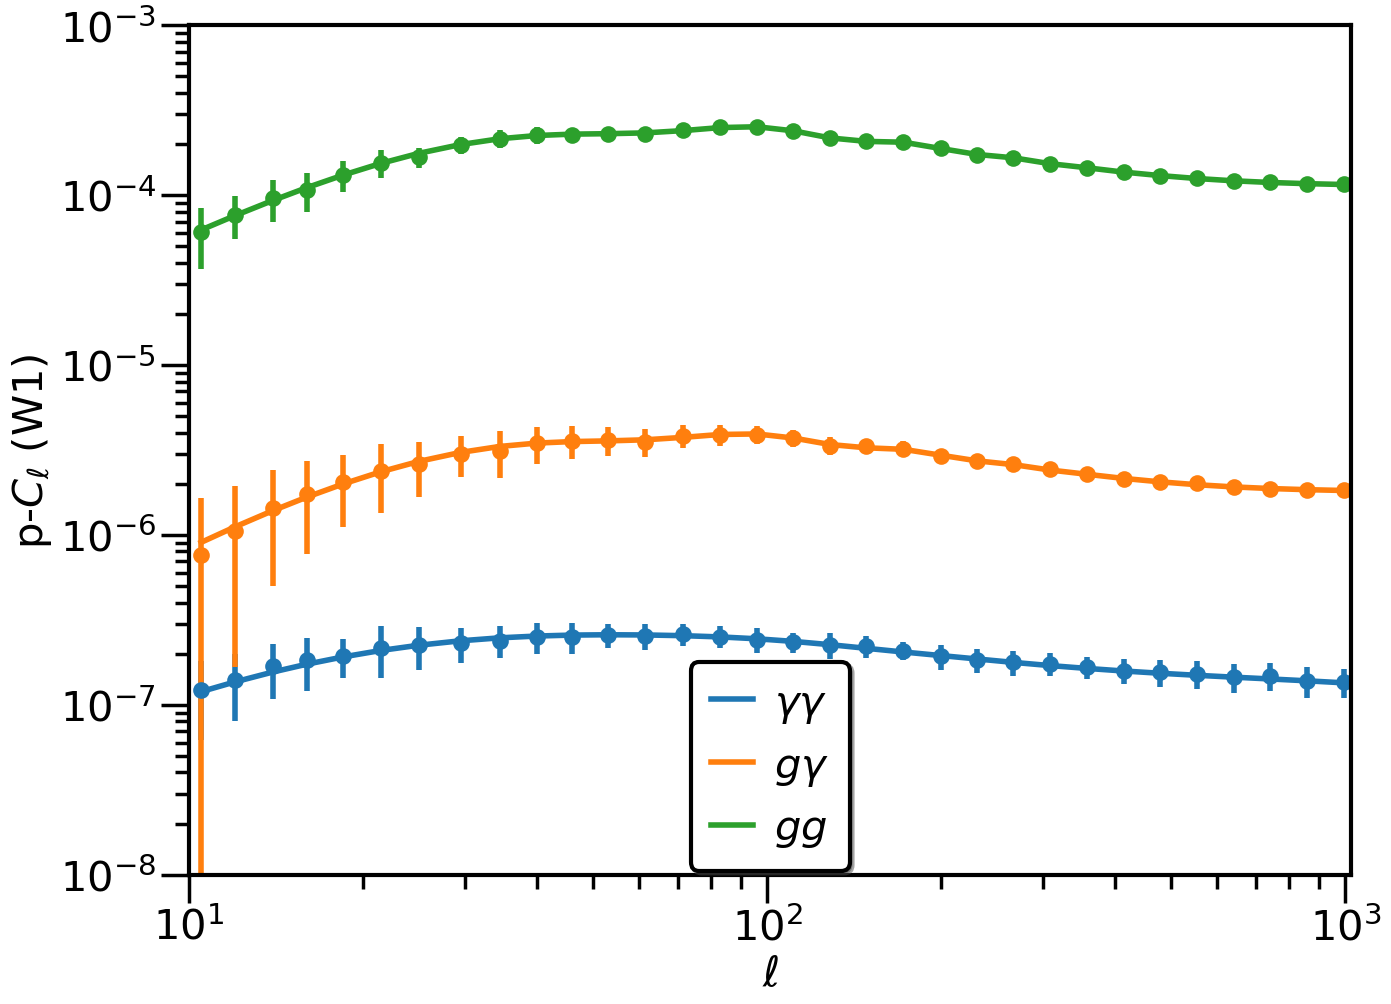

In [95]:
# errorbar(l,cl_sim_W['clp_stats']['mean'],cl_sim_W['clp_stats']['std'],fmt='ro')
f=lb
i=0
for corr in corrs:
    color=colors[i%len(colors)]
    errorbar(lb,f*cl_sim_W['clp_b_stats'][corr]['mean'],f*cl_sim_W['clp_b_stats'][corr]['std'],fmt='o',c=color)
#     plot(lb,f*cl_sim_W['clp0'][corr],label=labels[corr])
    plot(lb,f*cl0_win['cl_b'][corr],label=labels[corr])
    
    i+=1
# plot(l,cl_sim_N['clg_stats']['mean'],'g--')
xscale('log')
yscale('log')
xlabel(r'$\ell$')
ylabel(r'p-$C_\ell$ (W1)')
legend()
ylim(1.e-8,1.e-3)
xlim(10,nside)

[]

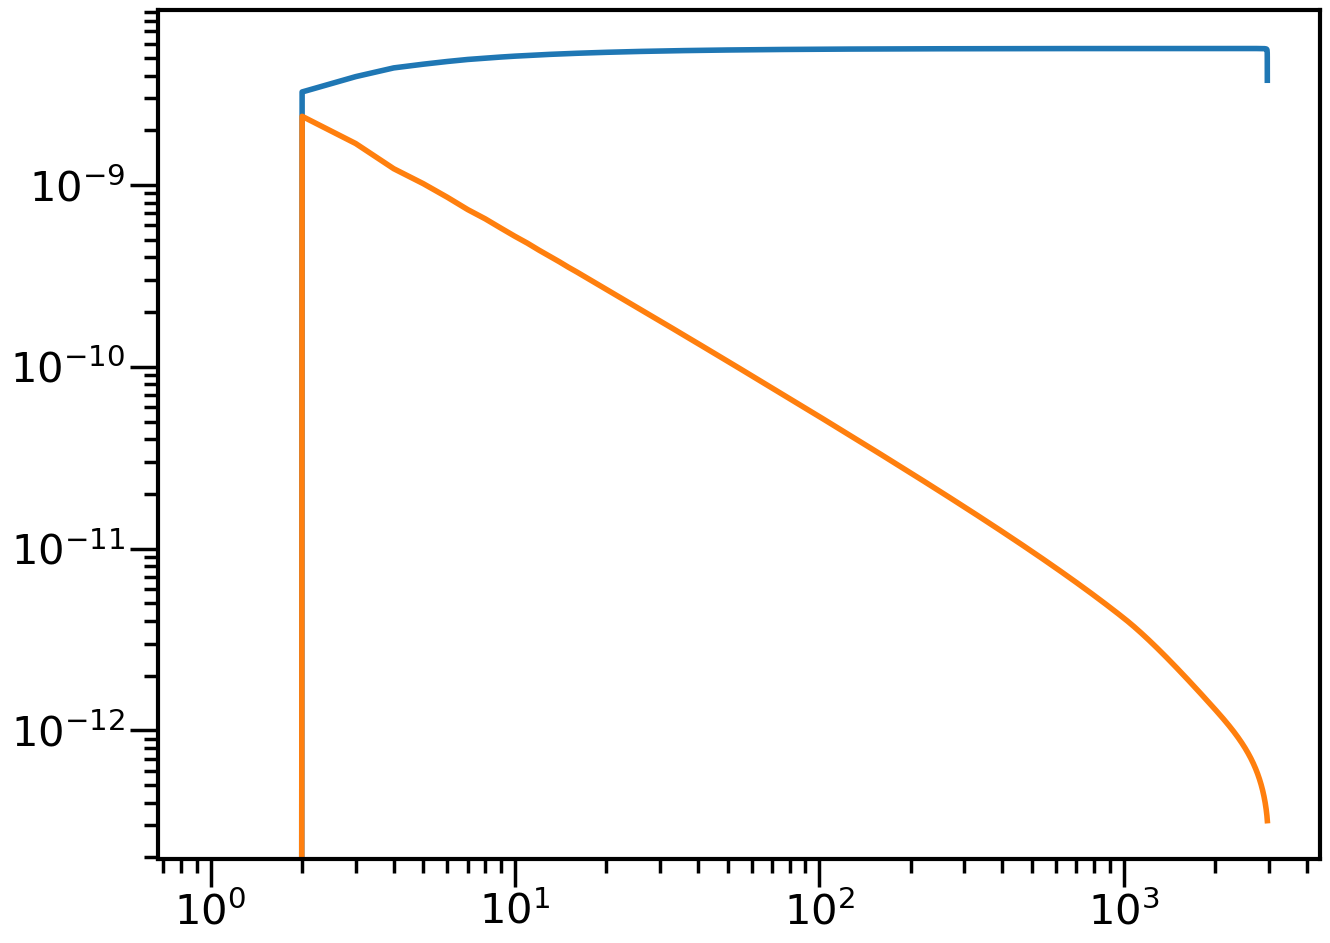

In [96]:
plot(kappa0.l,kappa_win.SN[corr_ll][:,0,0]@cl_sim_W['coupling_M'][corr_ll])
plot(kappa0.l,(kappa_win.SN[corr_ll][:,0,0]@cl_sim_W['coupling_M']['shear_B']))
loglog()

09:52:45 WARNING:No handles with labels found to put in legend.


(10, 1024)

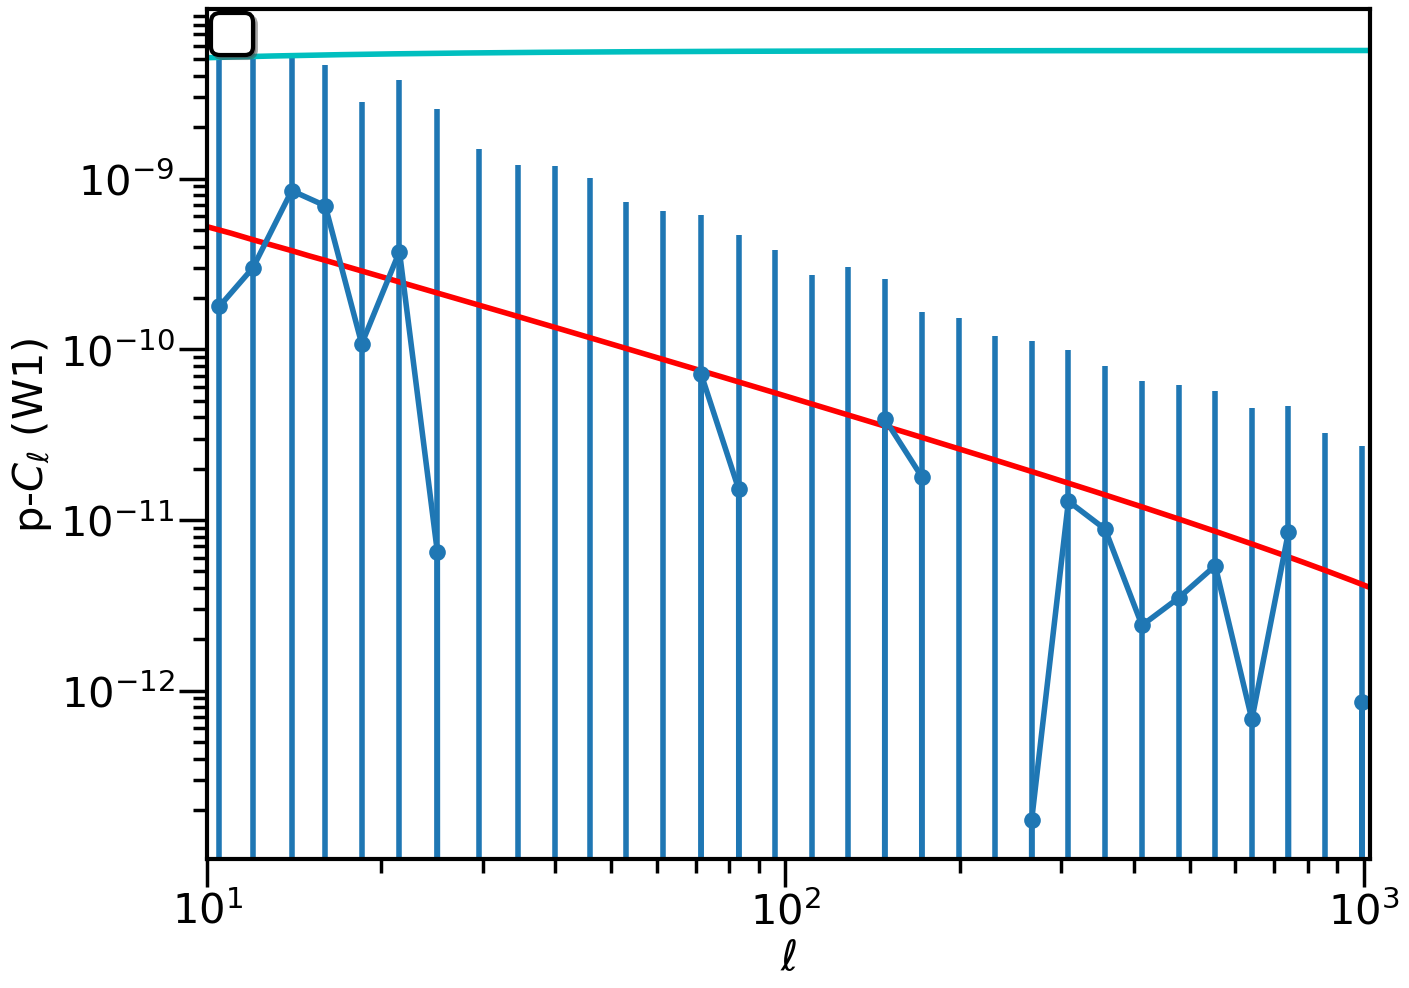

In [97]:
# errorbar(l,cl_sim_W['clp_stats']['mean'],cl_sim_W['clp_stats']['std'],fmt='ro')
f=lb
i=0
for corr in [corr_ll]:
    color=colors[i%len(colors)]
    errorbar(lb,cl_sim_W['clp_b_stats'][corr]['mean']-cl0_win['cl_b'][corr],cl_sim_W['clp_b_stats'][corr]['std'],fmt='o-',c=color)
    i+=1
# plot(l,cl_sim_N['clg_stats']['mean'],'g--')
plot(kappa0.l,kappa_win.SN[corr_ll][:,0,0]@cl_sim_W['coupling_M']['shear_B'],'r-')
plot(kappa0.l,kappa_win.SN[corr_ll][:,0,0]@cl_sim_W['coupling_M'][corr_ll],'c-')
xscale('log')
yscale('log')
xlabel(r'$\ell$')
ylabel(r'p-$C_\ell$ (W1)')
legend()
xlim(10,nside)
# xlim(50,200)
# ylim(1.e-8,1.e-3)

In [98]:
cl0_win['cl_b'][corr]

array([1.13914624e-08, 1.13612171e-08, 1.11628389e-08, 1.08463798e-08,
       1.03559700e-08, 9.72349037e-09, 8.97634485e-09, 8.07496807e-09,
       7.18817902e-09, 6.35234399e-09, 5.59520742e-09, 4.87761228e-09,
       4.19224993e-09, 3.57113869e-09, 3.02444862e-09, 2.54933268e-09,
       2.12852918e-09, 1.75837191e-09, 1.44845595e-09, 1.18977026e-09,
       9.77680970e-10, 8.07980942e-10, 6.67112770e-10, 5.51798894e-10,
       4.58892122e-10, 3.82553259e-10, 3.20559496e-10, 2.69632243e-10,
       2.27179349e-10, 1.91634245e-10, 1.61500847e-10, 1.35781188e-10,
       1.13713555e-10, 9.48155534e-11, 7.85880479e-11, 6.46221699e-11,
       5.27026040e-11, 4.26111059e-11, 3.41005563e-11])

(10, 1024)

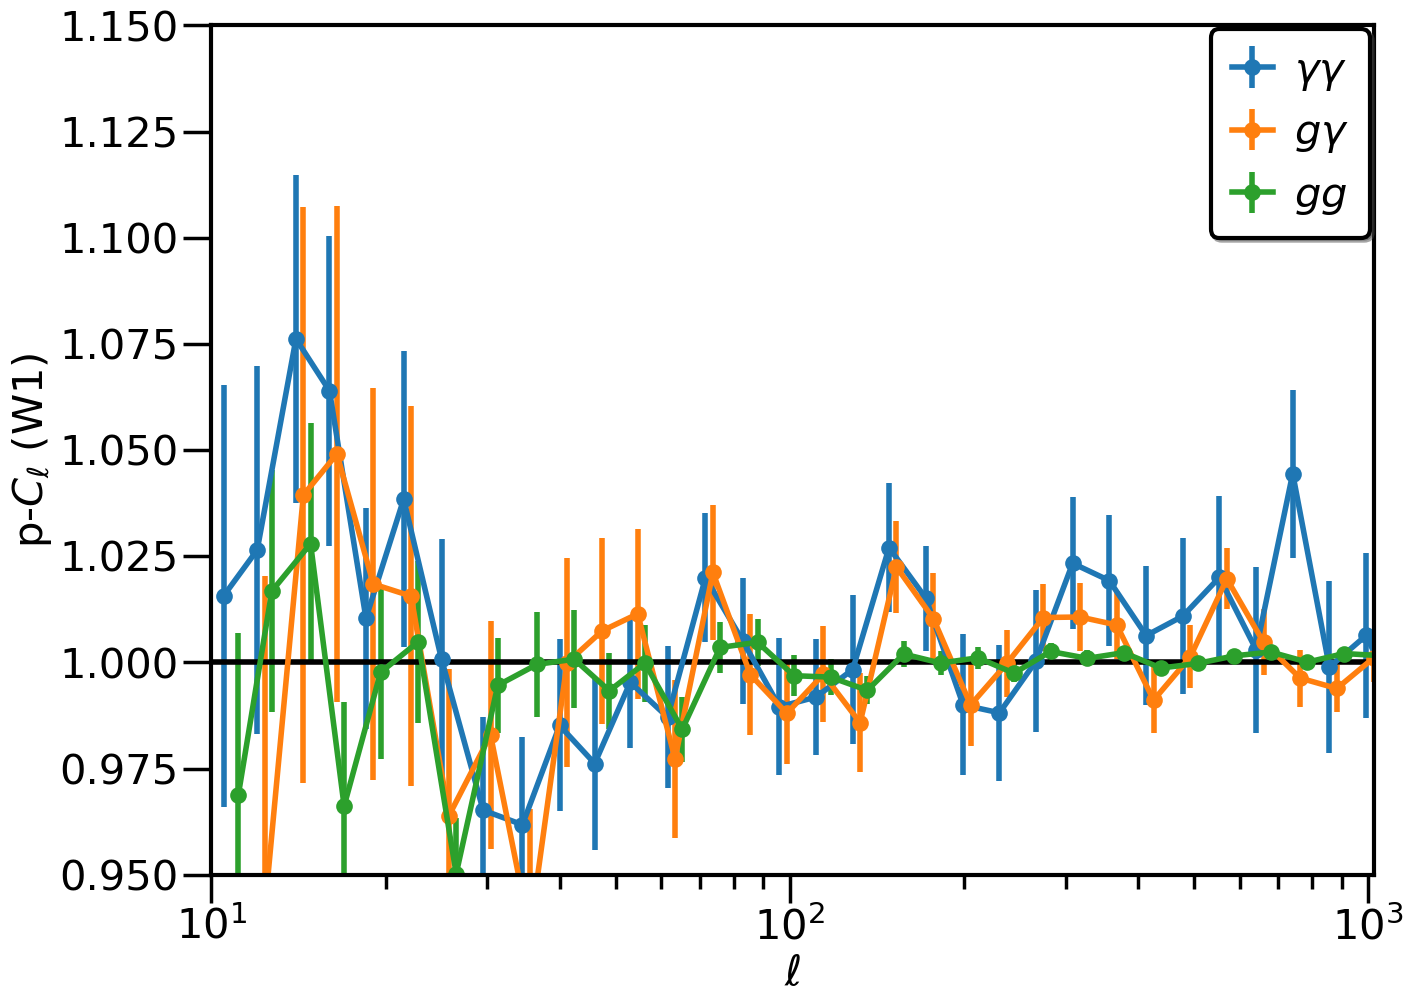

In [99]:
# errorbar(l,cl_sim_W['clp_stats']['mean'],cl_sim_W['clp_stats']['std'],fmt='ro')
f=1#lb
i=0
for corr in corrs:
    color=colors[i%len(colors)]
#     errorbar(lb*(1+i*0.03),cl_sim_W['clp_b_stats'][corr]['mean']/cl_sim_W['clp0'][corr],cl_sim_W['clp_b_stats'][corr]['std']/cl_sim_W['clp0'][corr]/30,
#              fmt='o-',c=color,label=labels[corr])
    errorbar(lb*(1+i*0.03),cl_sim_W['clp_b_stats'][corr]['mean']/cl0_win['cl_b'][corr],cl_sim_W['clp_b_stats'][corr]['std']/cl0_win['cl_b'][corr]/sqrt(nsim),
             fmt='o-',c=color,label=labels[corr])
    i+=1
# plot(l,cl_sim_N['clg_stats']['mean'],'g--')
xscale('log')
# yscale('log')
xlabel(r'$\ell$')
ylabel(r'p-$C_\ell$ (W1)')
hlines(1,10,1000)
legend()
ylim(0.95,1.15)
xlim(10,nside)

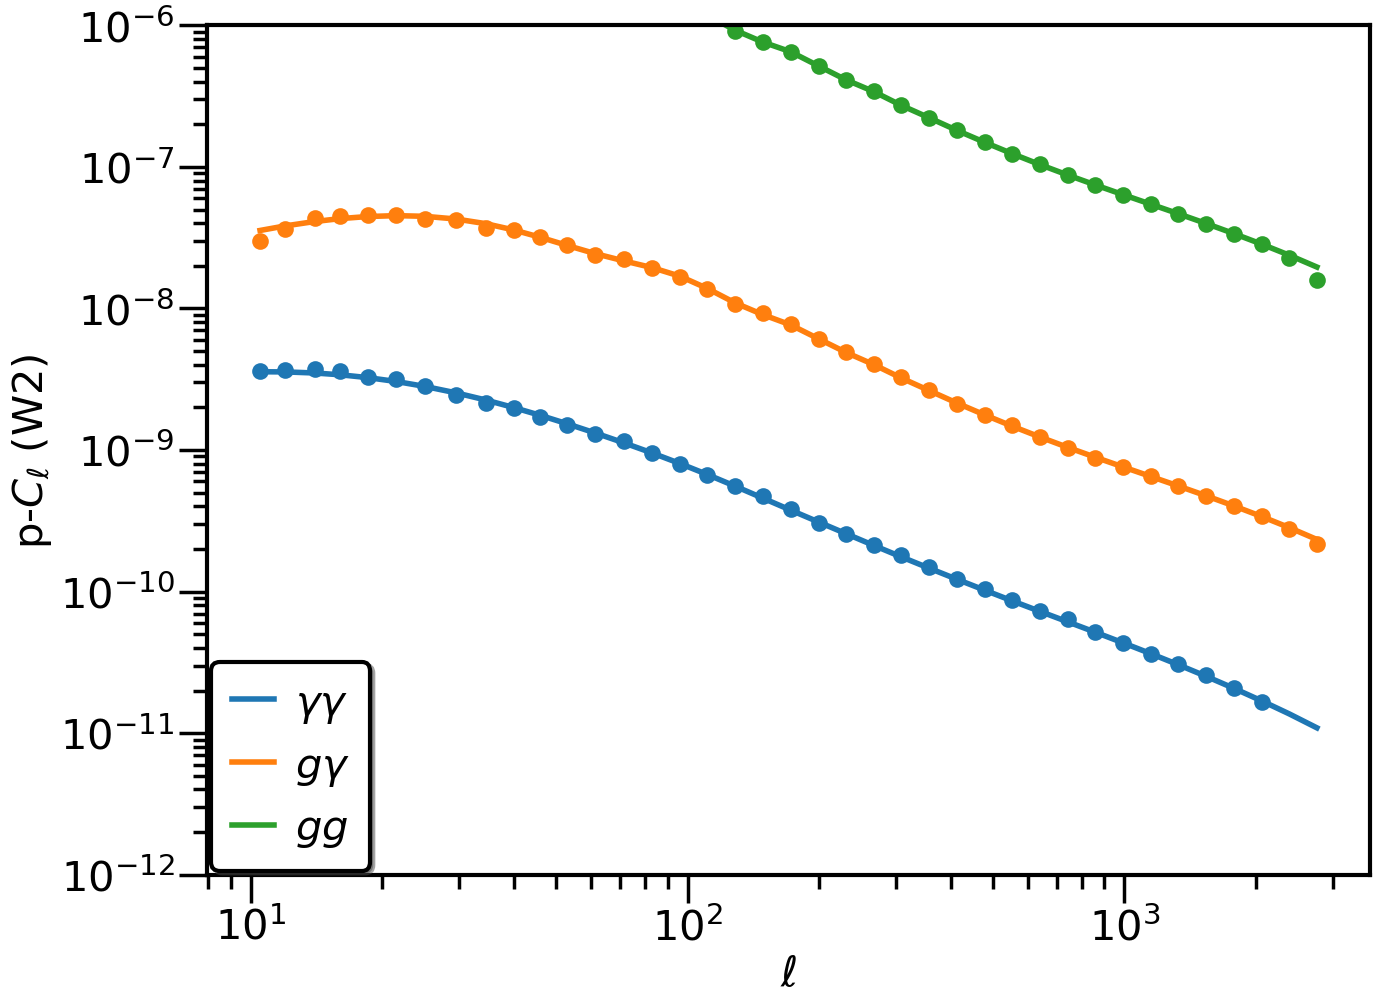

In [100]:
# errorbar(l,cl_sim_W['clp_stats']['mean'],cl_sim_W['clp_stats']['std'],fmt='ro')
f=1
i=0
for corr in corrs:
    color=colors[i%len(colors)]
    errorbar(lb,f*cl_sim_Ww['clp_b_stats'][corr]['mean'],f*cl_sim_Ww['clp_b_stats'][corr]['std']/sqrt(nsim),fmt='o',c=color)
    errorbar(lb,f*cl_sim_Ww['clp0'][corr],c=color,label=labels[corr])
    i+=1
# plot(lb,f*cl0_win_w['cl_b'][:39])
# plot(lb,f*cl0_win['cl_b'])
# plot(lb,f*coupling_Mw_binned@cl0['cl_b'])
# plot(l,cl_sim_N['clg_stats']['mean'],'g--')
xscale('log')
yscale('log')
xlabel(r'$\ell$')
ylabel(r'p-$C_\ell$ (W2)')
# xlim(10,1000)
ylim(1.e-12,1.e-6)
legend()

(0.95, 1.05)

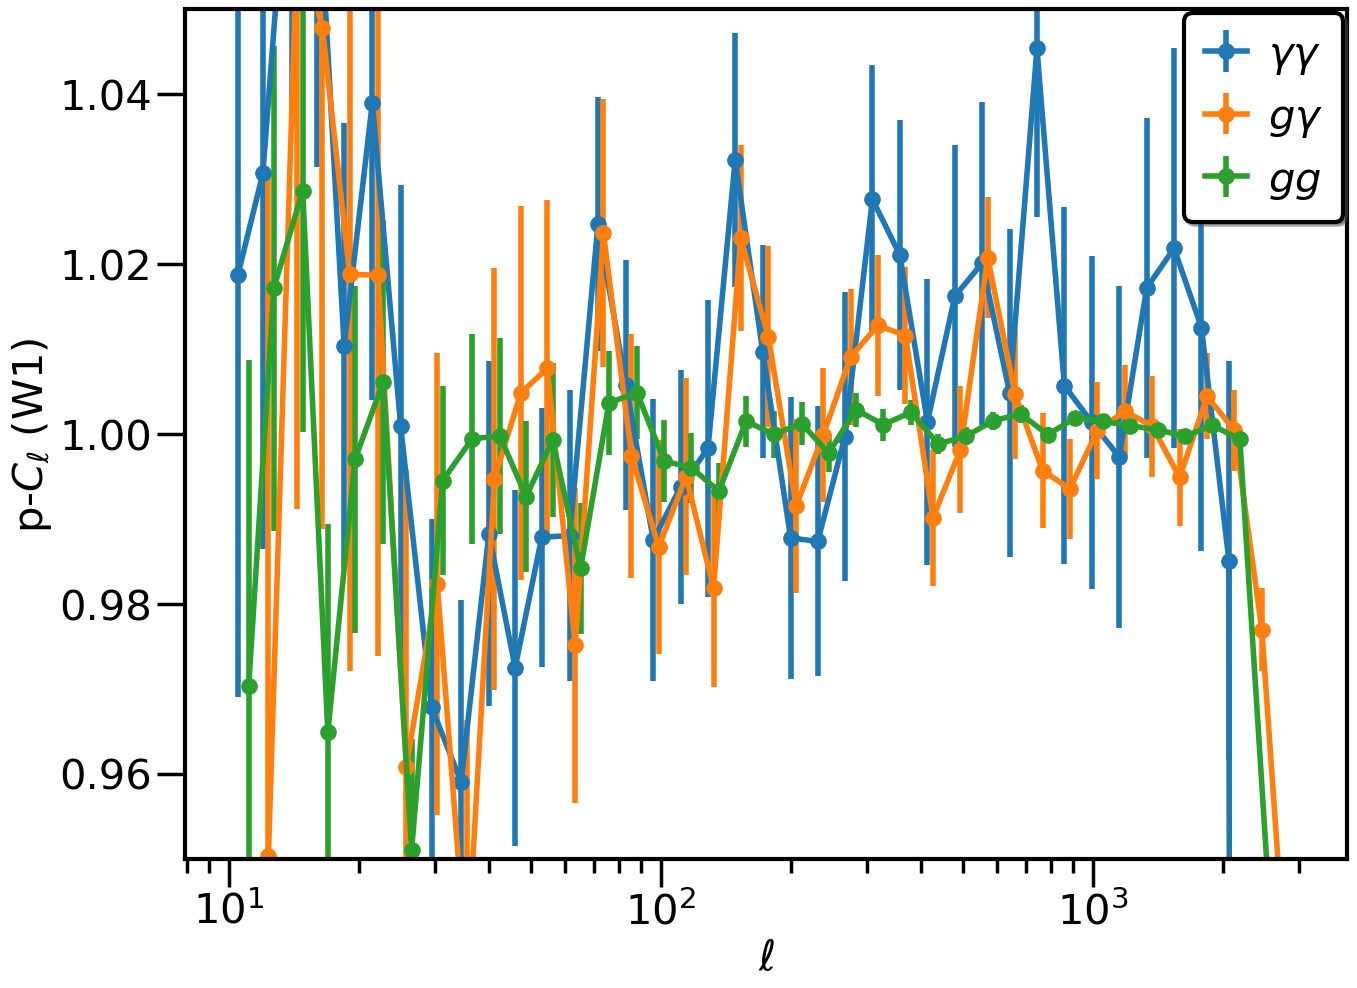

In [101]:
# errorbar(l,cl_sim_W['clp_stats']['mean'],cl_sim_W['clp_stats']['std'],fmt='ro')
f=1#lb
i=0
for corr in corrs:
    color=colors[i%len(colors)]
    errorbar(lb*(1+i*0.03),cl_sim_Ww['clp_b_stats'][corr]['mean']/cl_sim_Ww['clp0'][corr],cl_sim_Ww['clp_b_stats'][corr]['std']/cl_sim_Ww['clp0'][corr]/sqrt(nsim),
             fmt='o-',c=color,label=labels[corr])
    i+=1
# plot(l,cl_sim_N['clg_stats']['mean'],'g--')
xscale('log')
# yscale('log')
xlabel(r'$\ell$')
ylabel(r'p-$C_\ell$ (W1)')
legend()
ylim(0.95,1.05)

09:53:05 WARNING:No handles with labels found to put in legend.


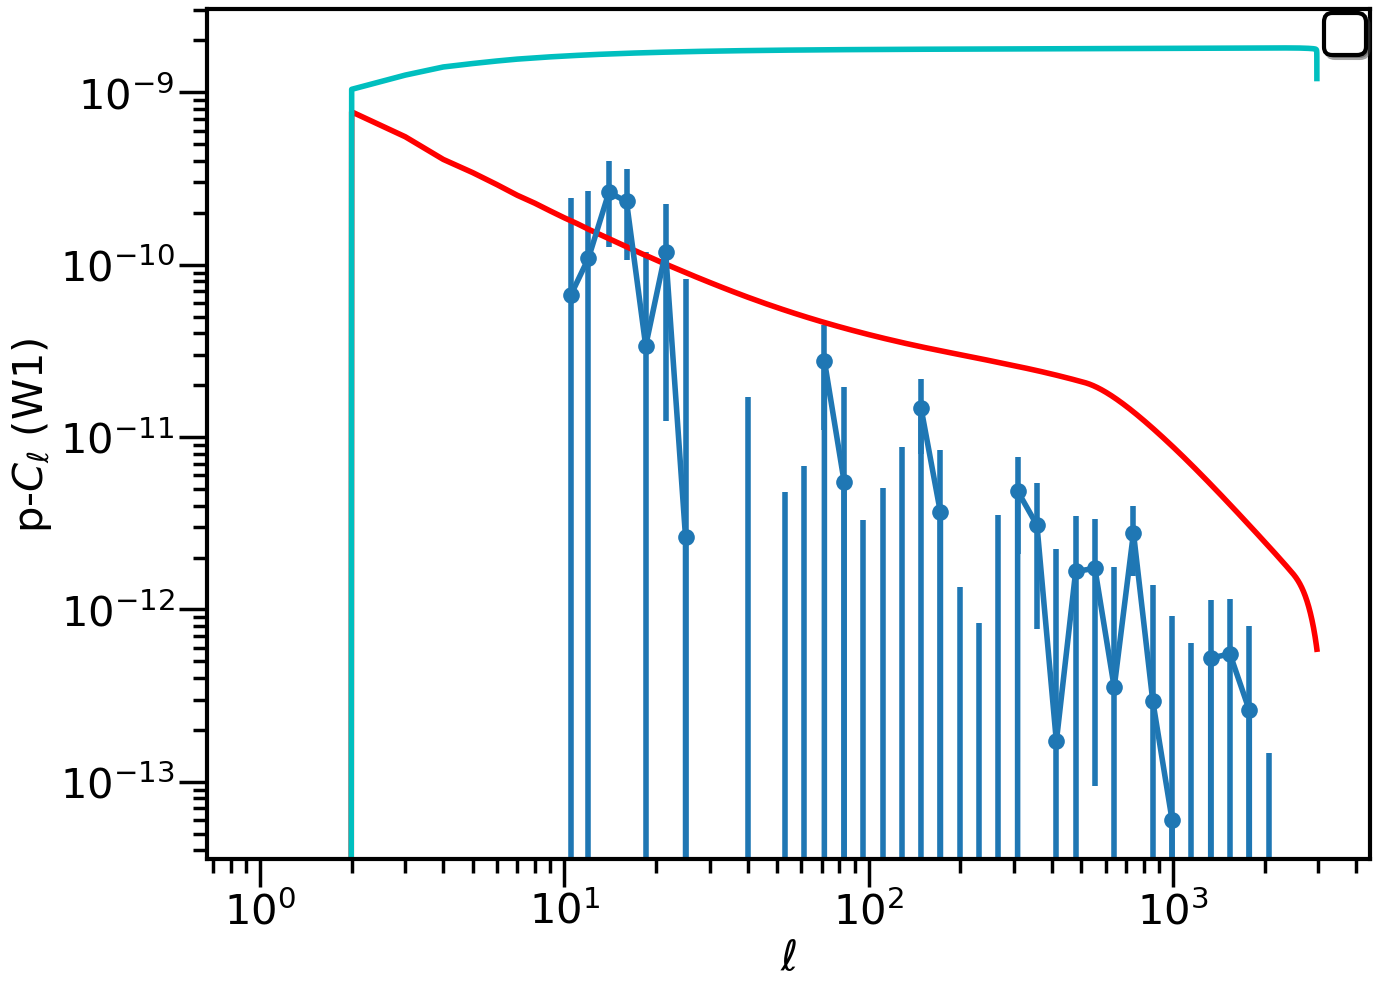

In [102]:
# errorbar(l,cl_sim_W['clp_stats']['mean'],cl_sim_W['clp_stats']['std'],fmt='ro')
f=lb
i=0
for corr in [corr_ll]:
    color=colors[i%len(colors)]
    errorbar(lb,cl_sim_Ww['clp_b_stats'][corr]['mean']-cl_sim_Ww['clp0'][corr],cl_sim_Ww['clp_b_stats'][corr]['std']/sqrt(nsim),fmt='o-',c=color)
    i+=1
# plot(l,cl_sim_N['clg_stats']['mean'],'g--')
plot(kappa0.l,kappa_win.SN[corr_ll][:,0,0]@cl_sim_Ww['coupling_M']['shear_B'],'r-')
plot(kappa0.l,kappa_win.SN[corr_ll][:,0,0]@cl_sim_Ww['coupling_M'][corr_ll],'c-')
xscale('log')
yscale('log')
xlabel(r'$\ell$')
ylabel(r'p-$C_\ell$ (W1)')
legend()
# xlim(50,200)
# ylim(1.e-8,1.e-3)

09:53:07 WARNING:No handles with labels found to put in legend.


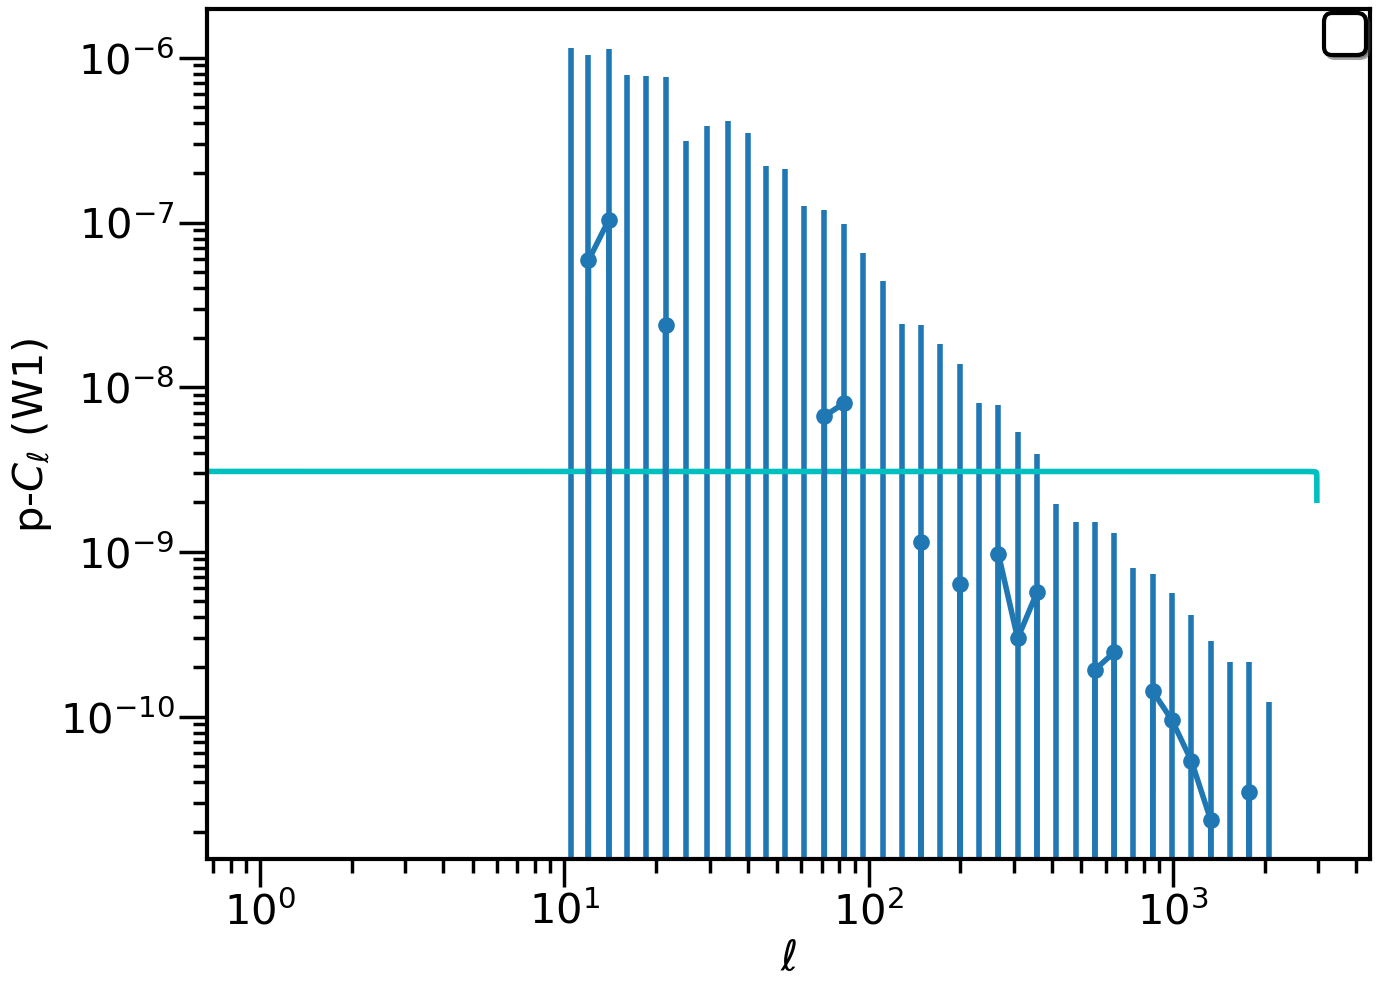

In [103]:
# errorbar(l,cl_sim_W['clp_stats']['mean'],cl_sim_W['clp_stats']['std'],fmt='ro')
f=lb
i=0
for corr in [corr_gg]:
    color=colors[i%len(colors)]
    errorbar(lb,cl_sim_Ww['clp_b_stats'][corr]['mean']-cl_sim_Ww['clp0'][corr],cl_sim_Ww['clp_b_stats'][corr]['std'],fmt='o-',c=color)
    i+=1
# plot(l,cl_sim_N['clg_stats']['mean'],'g--')
# plot(kappa0.l,kappa_win.SN[corr_ll][:,0,0]@cl_sim_Ww['coupling_M']['shear_B'],'r-')
plot(kappa0.l,kappa_win.SN[corr_ll][:,0,0]@cl_sim_Ww['coupling_M'][corr_gg],'c-')
xscale('log')
yscale('log')
xlabel(r'$\ell$')
ylabel(r'p-$C_\ell$ (W1)')
legend()

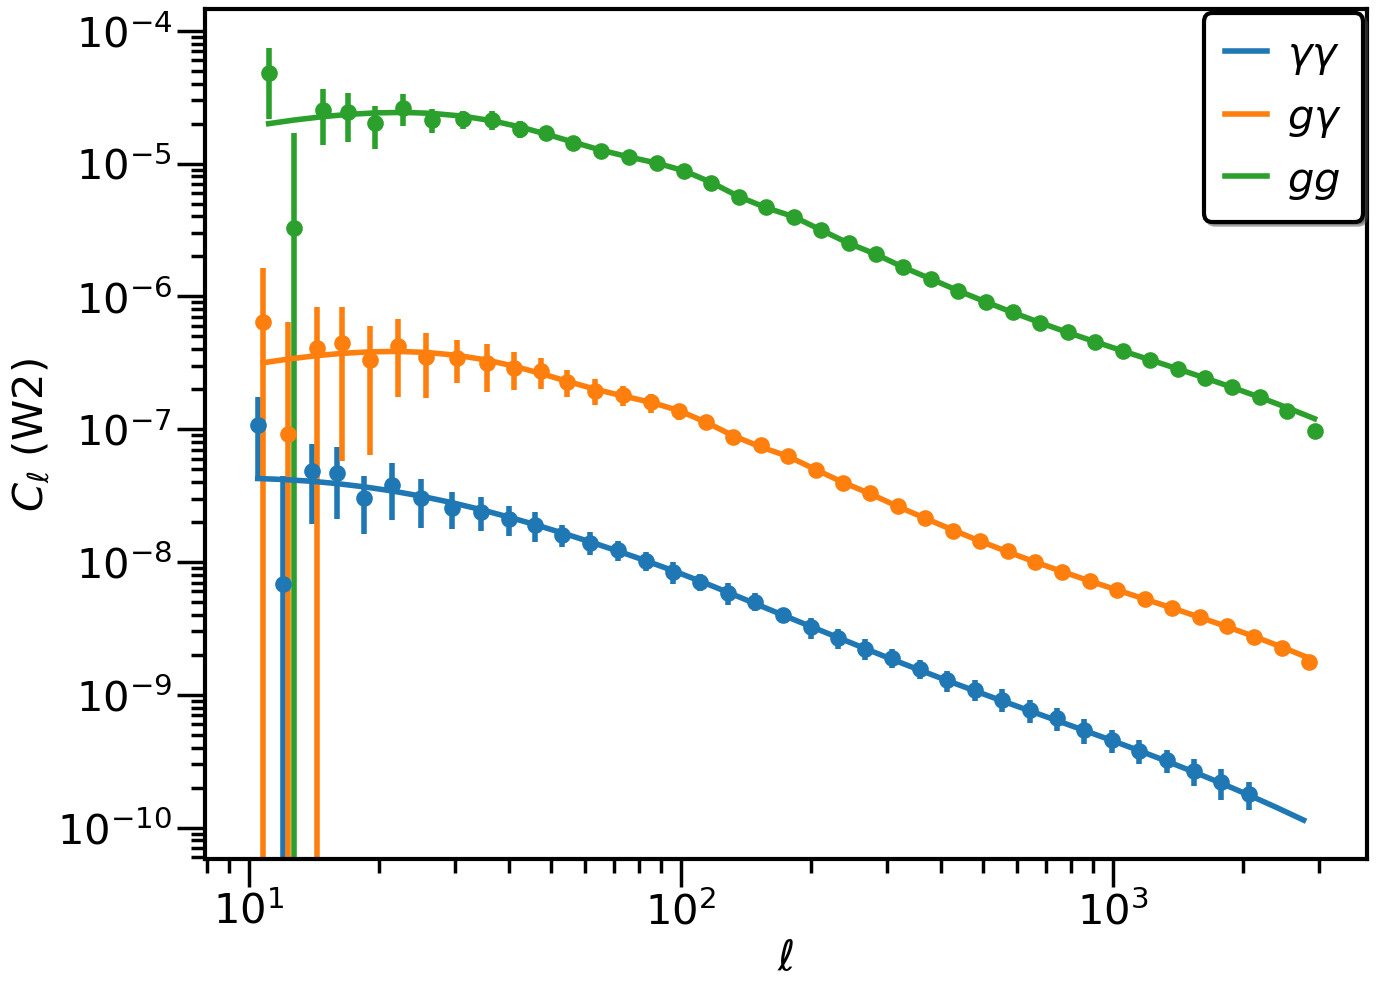

In [104]:
# errorbar(l,cl_sim_W['clp_stats']['mean'],cl_sim_W['clp_stats']['std'],fmt='ro')
f=1
i=0
for corr in corrs:
    color=colors[i%len(colors)]
    errorbar(lb*(1+i*0.03),f*cl_sim_Ww['clg_b2_stats'][corr]['mean'],f*cl_sim_Ww['clg_b2_stats'][corr]['std'],fmt='o',c=color)
    plot(lb*(1+i*0.03),f*cl0['cl_b'][corr],c=color,label=labels[corr])
    i+=1
# plot(lb,f*cl0_win_w['cl_b'][:39])
# plot(lb,f*cl0_win['cl_b'])
# plot(lb,f*coupling_Mw_binned@cl0['cl_b'])
# plot(l,cl_sim_N['clg_stats']['mean'],'g--')
xscale('log')
yscale('log')
xlabel(r'$\ell$')
ylabel(r'$C_\ell$ (W2)')
# xlim(10,1000)
legend()

(1e-10, 0.0001)

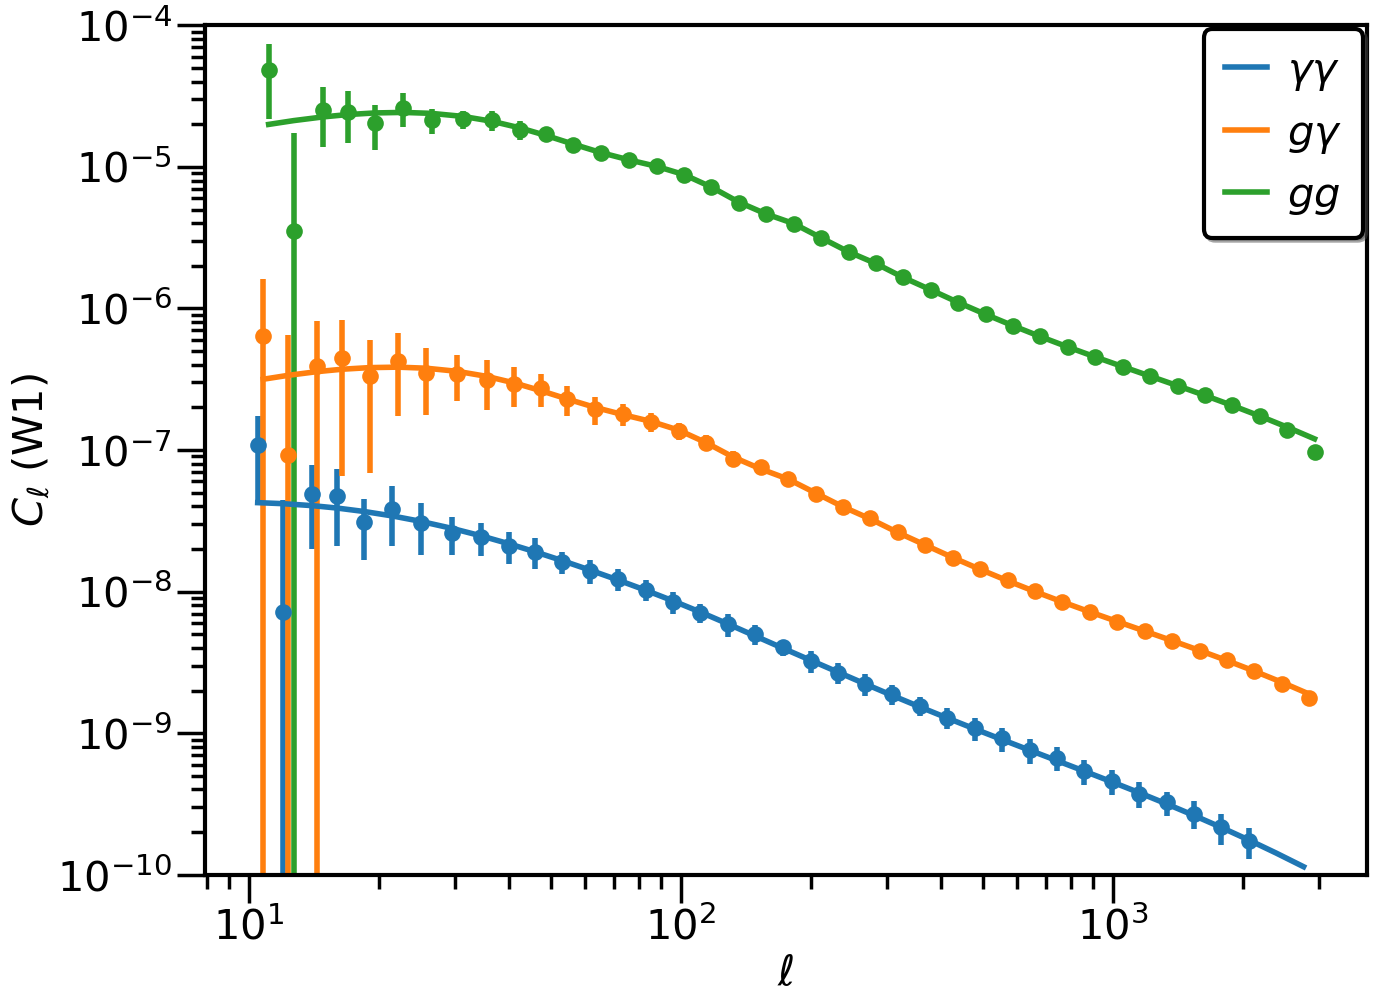

In [105]:
# errorbar(l,cl_sim_W['clp_stats']['mean'],cl_sim_W['clp_stats']['std'],fmt='ro')
f=1
i=0
for corr in corrs:
    color=colors[i%len(colors)]
    errorbar(lb*(1+i*0.03),f*cl_sim_W['clg_b2_stats'][corr]['mean'],f*cl_sim_W['clg_b2_stats'][corr]['std'],fmt='o',c=color)
    plot(lb*(1+i*0.03),f*cl0['cl_b'][corr],c=color,label=labels[corr])
    i+=1
# plot(lb,f*cl0_win_w['cl_b'][:39])
# plot(lb,f*cl0_win['cl_b'])
# plot(lb,f*coupling_Mw_binned@cl0['cl_b'])
# plot(l,cl_sim_N['clg_stats']['mean'],'g--')
xscale('log')
yscale('log')
xlabel(r'$\ell$')
ylabel(r'$C_\ell$ (W1)')
# xlim(10,1000)
legend()
ylim(1.e-10,1.e-4)

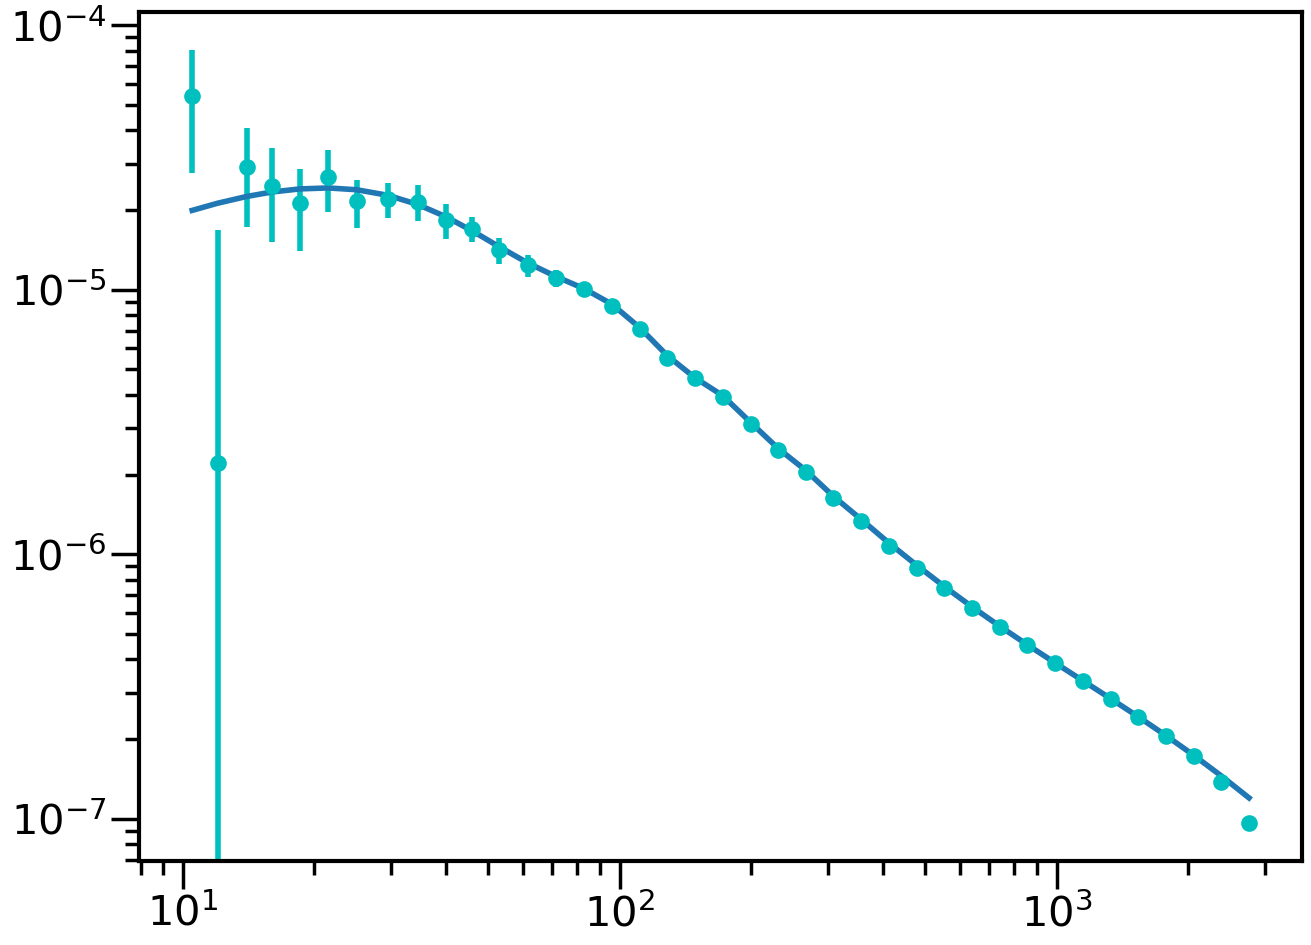

In [106]:
# errorbar(l,cl_sim_W['clg_stats']['mean'],cl_sim_W['clg_stats']['std'],fmt='ro')
errorbar(lb,cl_sim_Ww['clg_b22_stats'][corr]['mean'],cl_sim_Ww['clg_b22_stats'][corr]['std'],fmt='co')
# plot(lb,cl_sim_Ww['clp_b_stats']['mean']@coupling_Mw_binned2_inv)
plot(lb,cl0['cl_b'][corr])
# plot(l,cl_sim_N['clg_stats']['mean'],'g--')
xscale('log')
yscale('log')

In [107]:
dl=l_bins[1:]-l_bins[:-1]

In [108]:
corr=corr_gg
kappa_win.Win.Win['cov'][corr+corr][(0,0,0,0)]['W_pm']

{1324: [0], 1423: [0]}

In [109]:
corr=corr_ll
shear_lcut=kappa_win.l>=2
cut=kappa_win.l>0
s=0
if 'shear' in corr:
    cut=shear_lcut
    s=2
coupling_M=kappa_win.Win.Win['cl'][corr][(0,0)]['M']
coupling_M4=kappa_win.Win.Win['cov'][corr+corr][(0,0,0,0)]['M1324'][s] #*2
# coupling_M_inv=np.linalg.inv(coupling_M)
coupling_M_inv=np.zeros_like(coupling_M)
coupling_M_inv[:,cut][cut,:]=np.linalg.inv(coupling_M[cut,:][:,cut]) #otherwise we get singular matrix since for shear l<2 is not defined.
coupling_M_binned2=kappa_win.binning.bin_2d(cov=coupling_M,bin_utils=kappa_win.cl_bin_utils) #this doesnot work... difference of bin size
#loglog(lb,np.diag(coupling_M_binned2)/np.diag(coupling_M_binned)*np.gradient(lb))
coupling_M_binned2*=dl
coupling_M_binned=bin_coupling_M(kappa_win,coupling_M)
coupling_M_binned_inv=np.linalg.inv(coupling_M_binned)
coupling_M_binned2_inv=np.linalg.inv(coupling_M_binned2)
coupling_M4_binned=bin_coupling_M(kappa_win,coupling_M4)
coupling_M4_binned2=kappa_win.binning.bin_2d(cov=coupling_M4,bin_utils=kappa_win.cl_bin_utils) 
coupling_M4_binned_inv=np.linalg.inv(coupling_M4_binned)

coupling_M_binned_inv2=kappa_win.binning.bin_2d(cov=coupling_M_inv,bin_utils=kappa_win.cl_bin_utils)

In [110]:
corr

('shear', 'shear')

In [111]:
import copy


In [112]:
corr=corr_ll

shear_lcut=kappa_win.l>=2
cut=kappa_win.l>0
s=0
if 'shear' in corr:
    cut=shear_lcut
    s=2

coupling_Mw=kappa_win_w.Win.Win['cl'][corr][(0,0)]['M']
coupling_M4w=kappa_win_w.Win.Win['cov'][corr+corr][(0,0,0,0)]['M1324'][s] #*2
# coupling_Mw_inv=np.linalg.inv(coupling_Mw)
coupling_Mw_inv=np.zeros_like(coupling_Mw)
coupling_Mw_inv[:,cut][cut,:]=np.linalg.inv(coupling_Mw[cut,:][:,cut]) #otherwise we get singular matrix since for shear l<2 is not defined.

coupling_Mw_binned2=kappa_win_w.binning.bin_2d(cov=coupling_Mw,bin_utils=kappa_win_w.cl_bin_utils) #this doesnot work... difference of bin size
coupling_Mw_binned2*=dl
#loglog(lb,np.diag(coupling_M_binned2)/np.diag(coupling_M_binned)*np.gradient(lb))
coupling_Mw_binned=bin_coupling_M(kappa_win_w,coupling_Mw)
coupling_Mw_binned_inv=np.linalg.inv(coupling_Mw_binned)
coupling_Mw_binned2_inv=np.linalg.inv(coupling_Mw_binned2)
coupling_M4w_binned=bin_coupling_M(kappa_win_w,coupling_M4w)
coupling_M4w_binned2=kappa_win.binning.bin_2d(cov=coupling_M4w,bin_utils=kappa_win.cl_bin_utils) 
coupling_M4w_binned_inv=np.linalg.inv(coupling_M4w_binned)

coupling_Mw_binned_inv2=kappa_win.binning.bin_2d(cov=coupling_Mw_inv,bin_utils=kappa_win.cl_bin_utils)

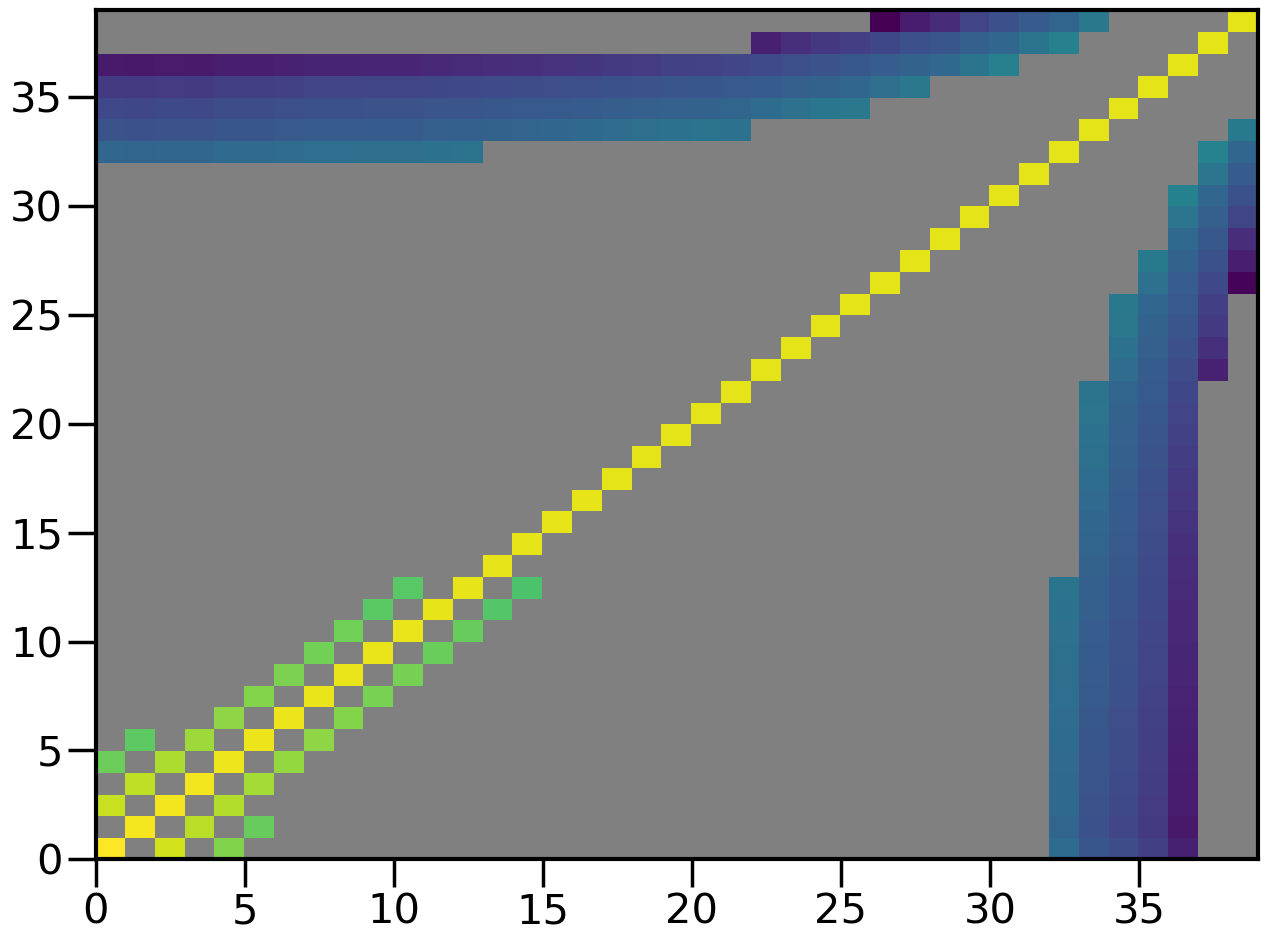

In [113]:
pcolor(coupling_M_binned2_inv,norm=LogNorm())

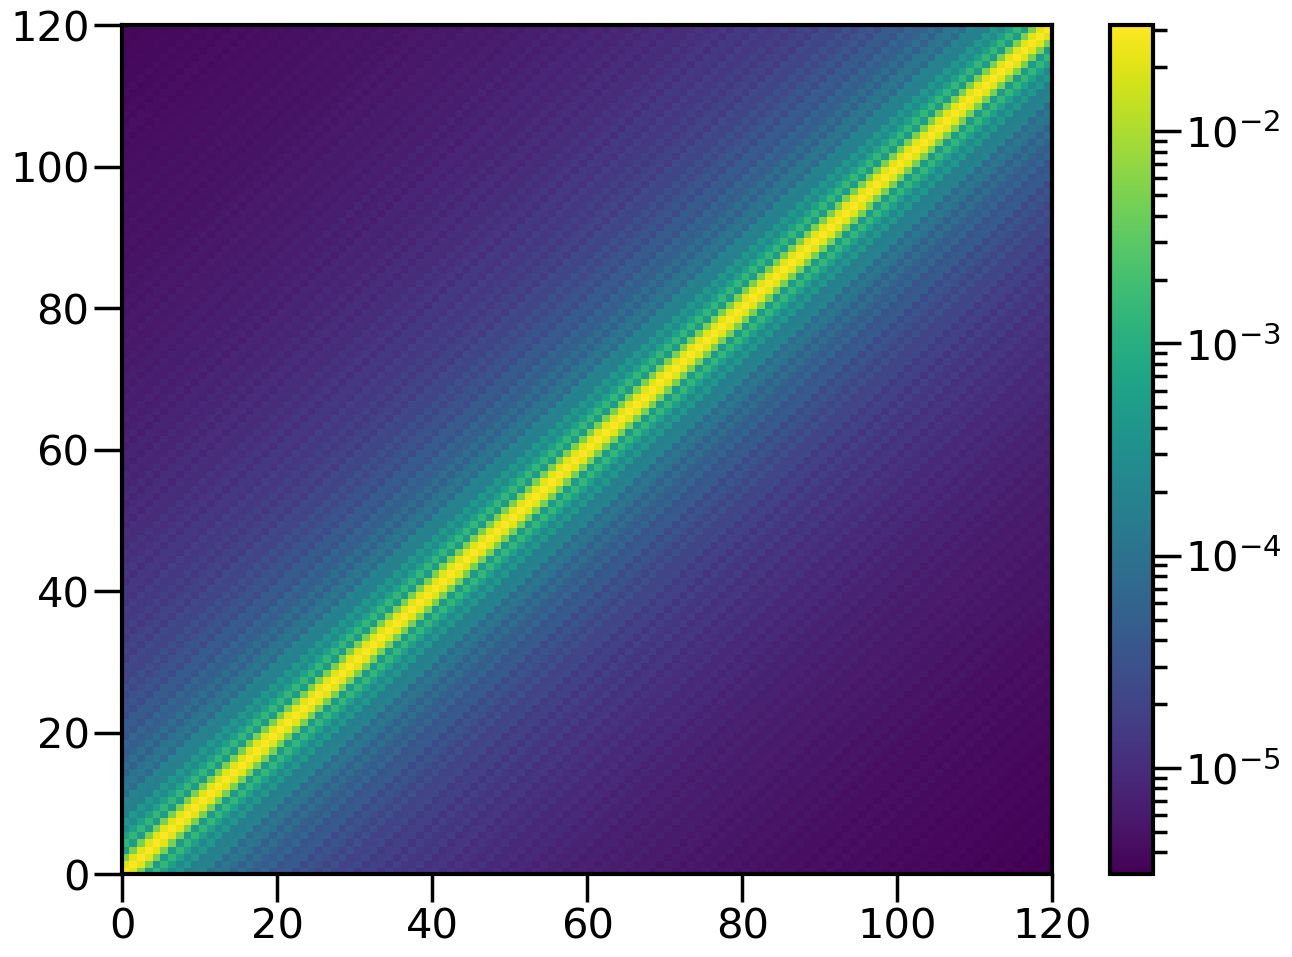

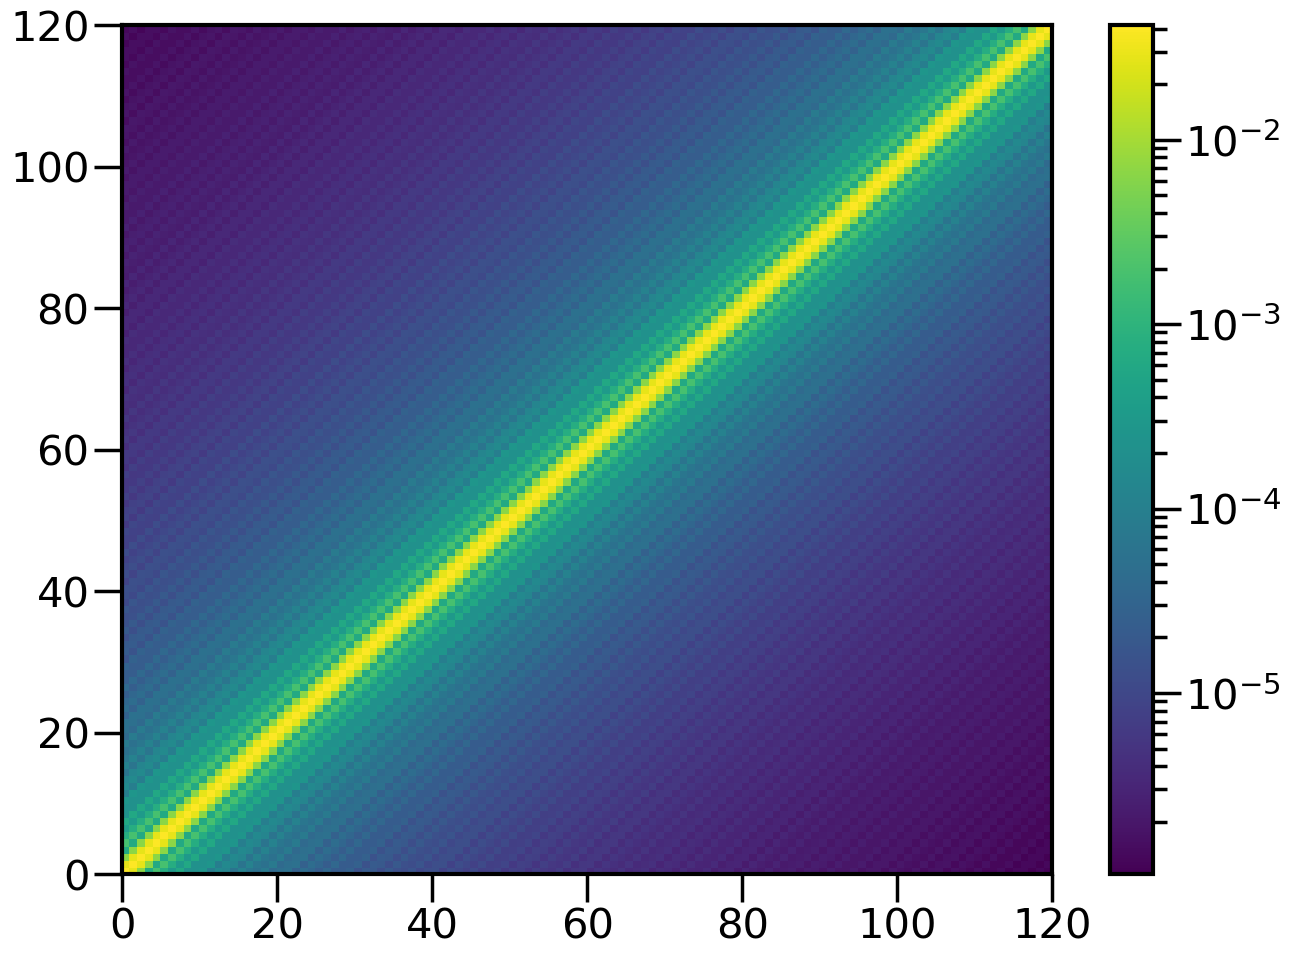

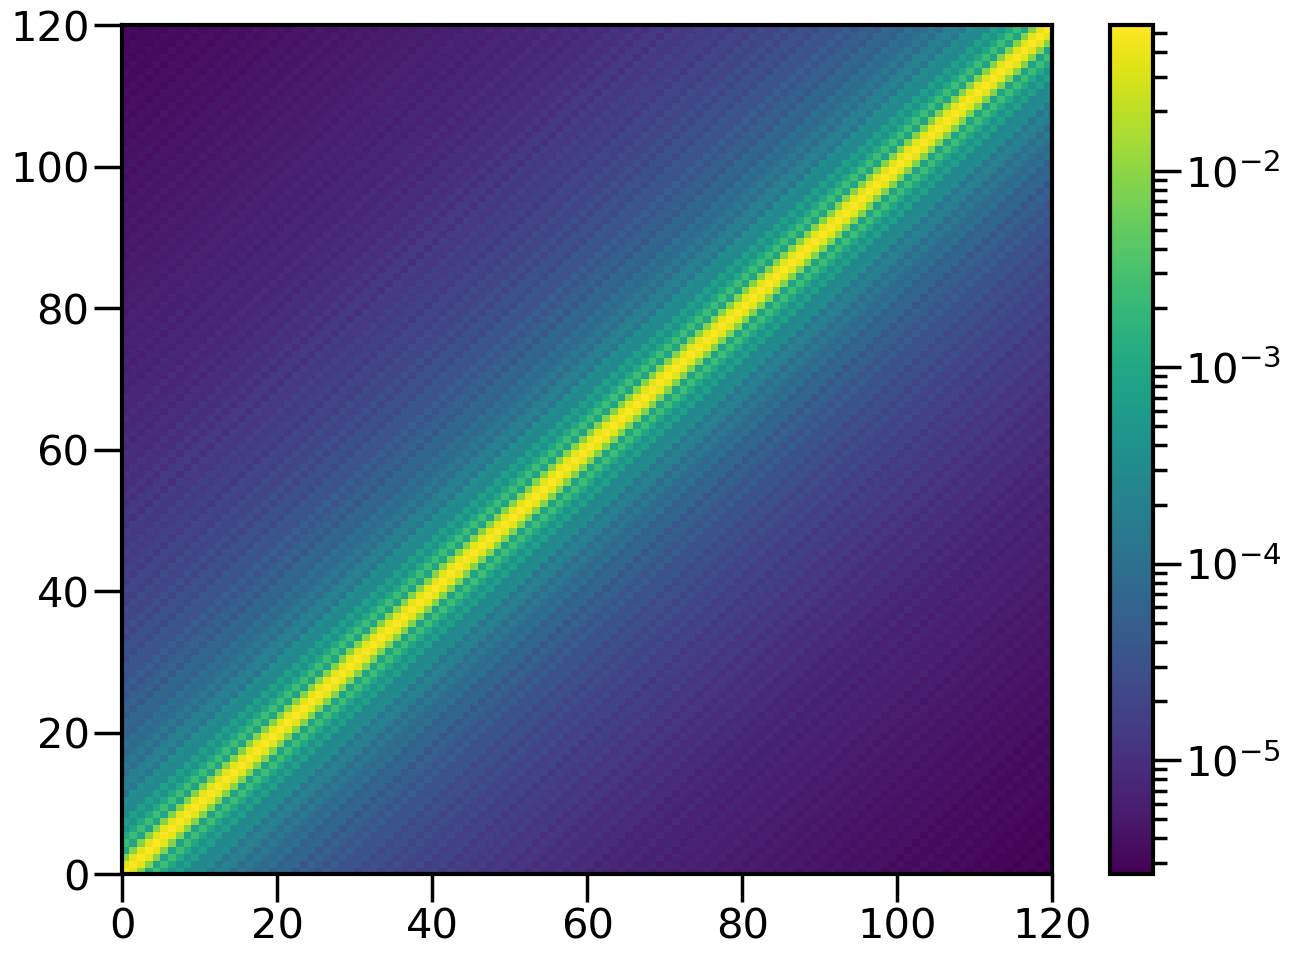

In [114]:
ct=copy.deepcopy(kappa_win_w.Win.Win['cl'][corrs[0]][(0,0)]['M'])
pcolor(ct[700:820,700:820],norm=LogNorm())
colorbar()
show()
ct=copy.deepcopy(kappa_win_w.Win.Win['cl'][corrs[1]][(0,0)]['M'])
pcolor(ct[700:820,700:820],norm=LogNorm())
colorbar()
show()
ct=copy.deepcopy(kappa_win_w.Win.Win['cl'][corrs[2]][(0,0)]['M'])
pcolor(ct[700:820,700:820],norm=LogNorm())
colorbar()

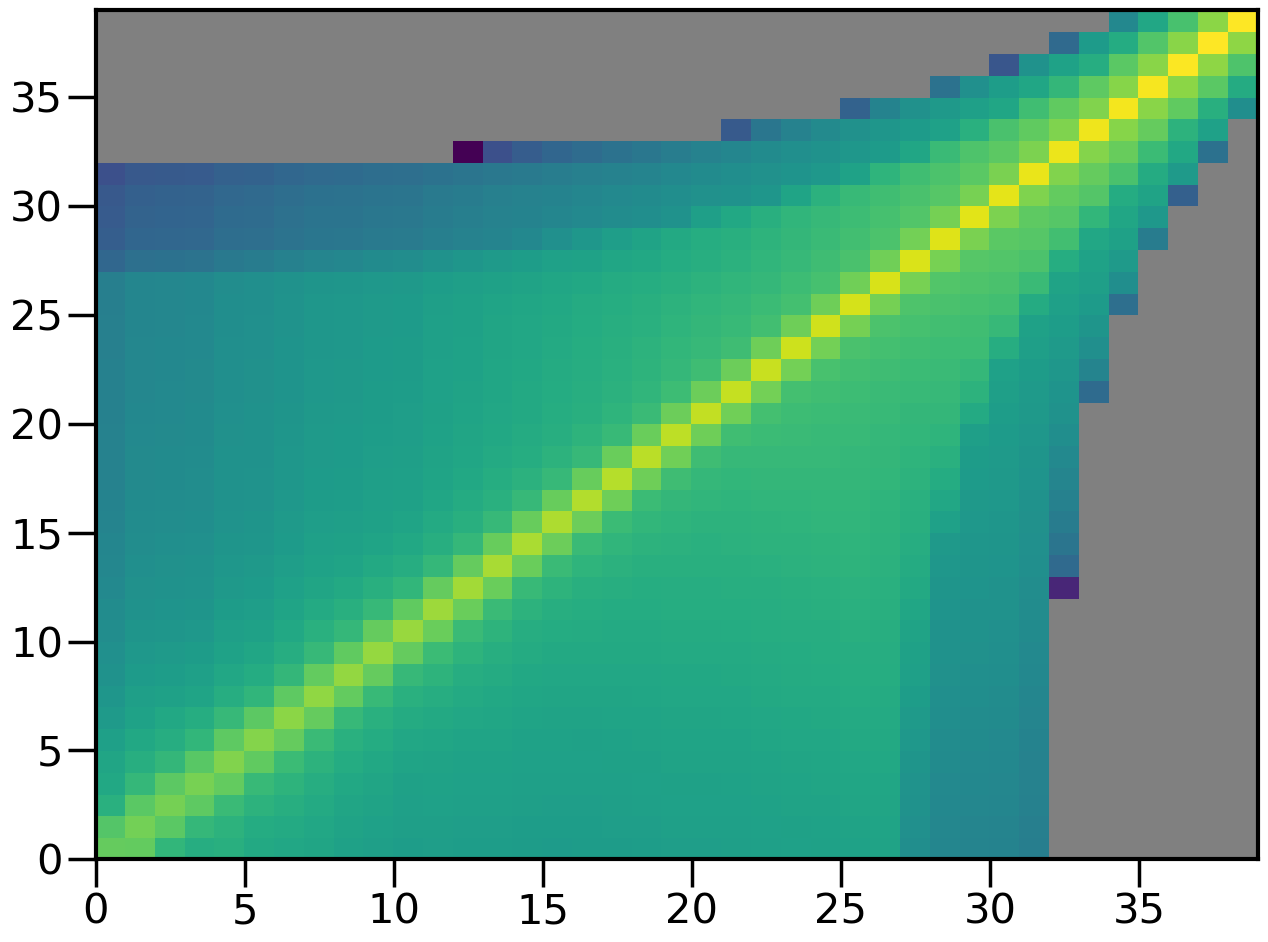

In [115]:
pcolor(coupling_Mw_binned2*np.gradient(lb),norm=LogNorm())

In [116]:
dl=l_bins[1:]-l_bins[:-1]

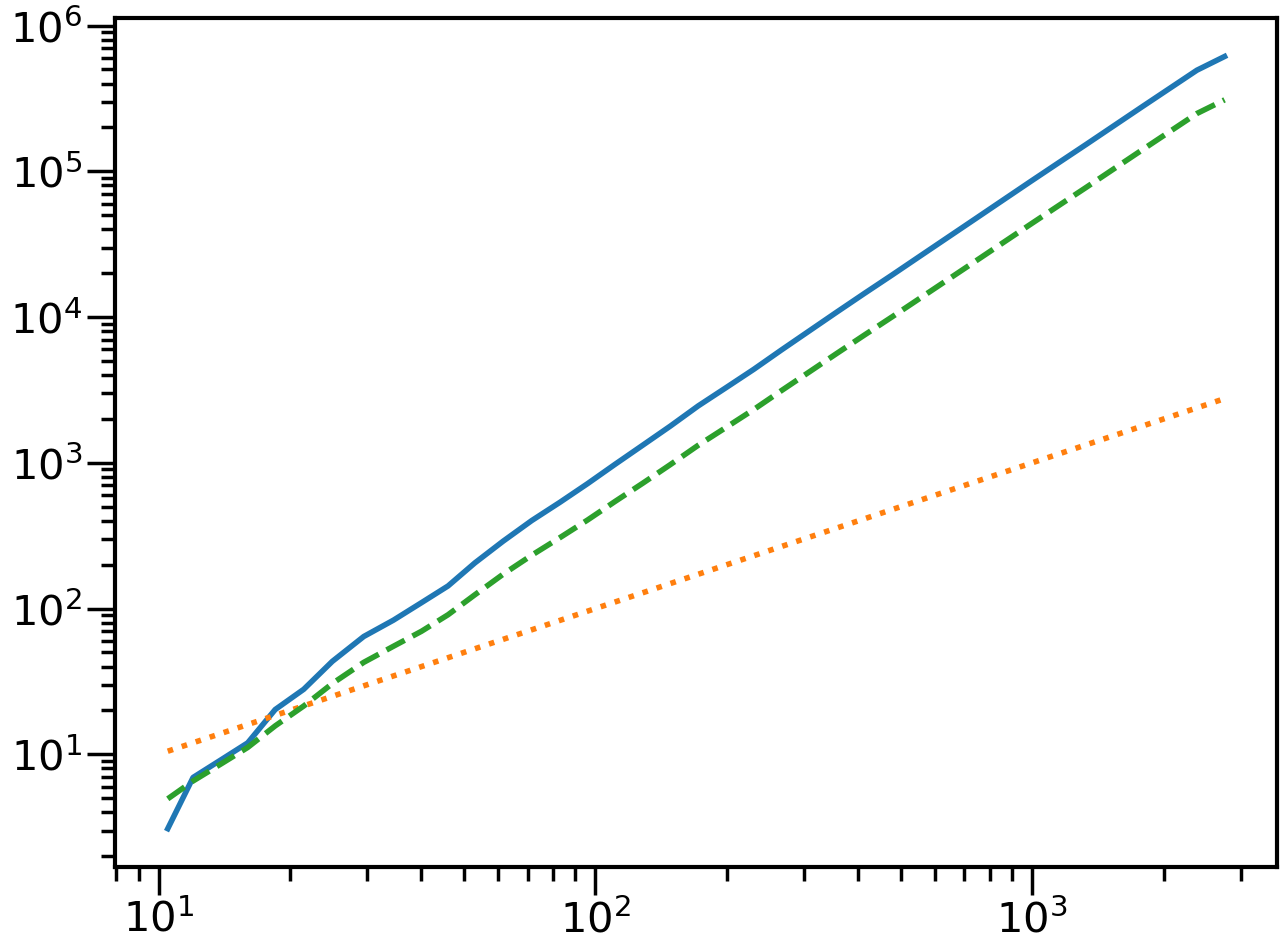

In [117]:
# yy=np.diag(coupling_M_binned_inv)**2*np.diag(coupling_M4_binned)
yy=np.diag(coupling_M_binned)**2/np.diag(coupling_M4_binned) * np.gradient(lb)
yy2=np.diag(coupling_M_binned_inv@coupling_M4_binned@coupling_M_binned_inv)
plot(lb,yy)
# plot(lb,1./yy2,'bo')
plot(lb,lb,':')
plot(lb,np.gradient(lb)*(2*lb+1)/2.*f_sky,'--')
xscale('log')
yscale('log')

In [118]:
Db2=coupling_M_binned_inv@coupling_M4_binned@coupling_M_binned_inv
# D2=coupling_M_inv@coupling_M4@coupling_M_inv

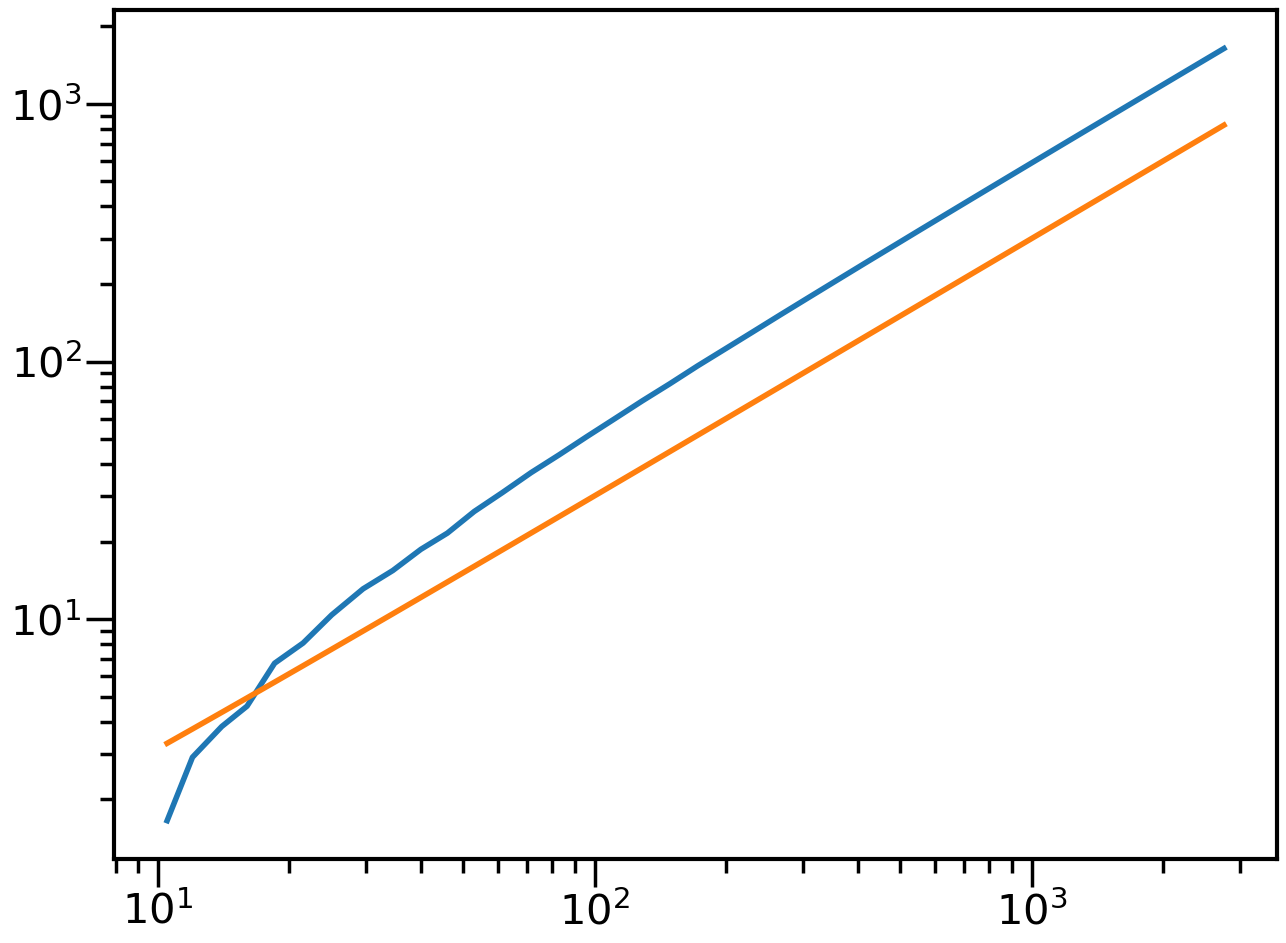

In [119]:
plot(lb,1./np.diag(Db2))
plot(lb,(2*lb+1)/2*.3)
xscale('log')
yscale('log')

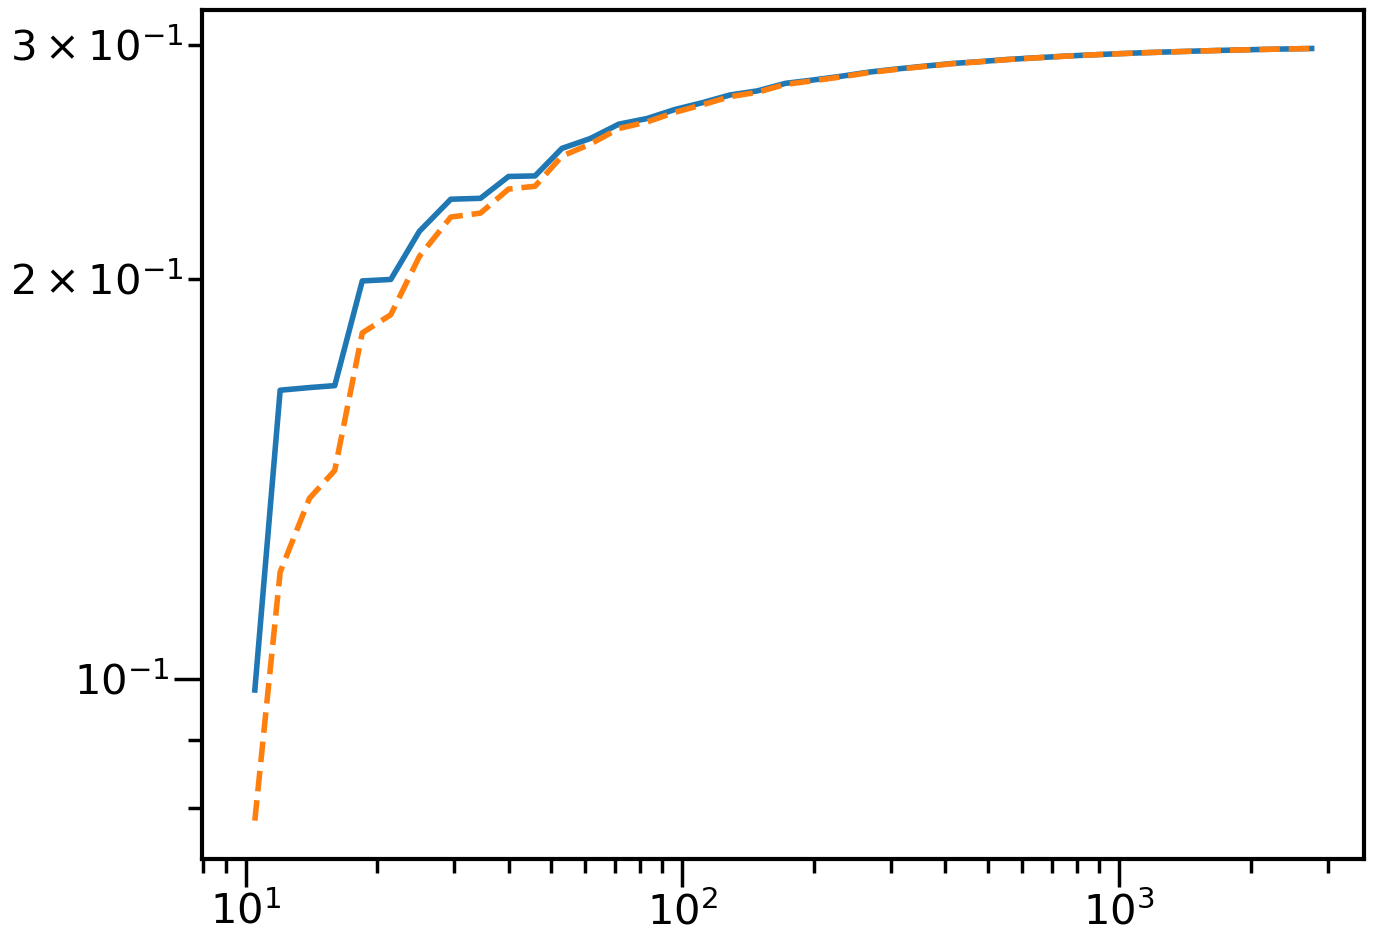

In [121]:
plot(lb,np.diag(coupling_M_binned))
plot(lb,1./np.diag(coupling_M_binned_inv),'--')
xscale('log')
yscale('log')

In [122]:
corr=corr_gg

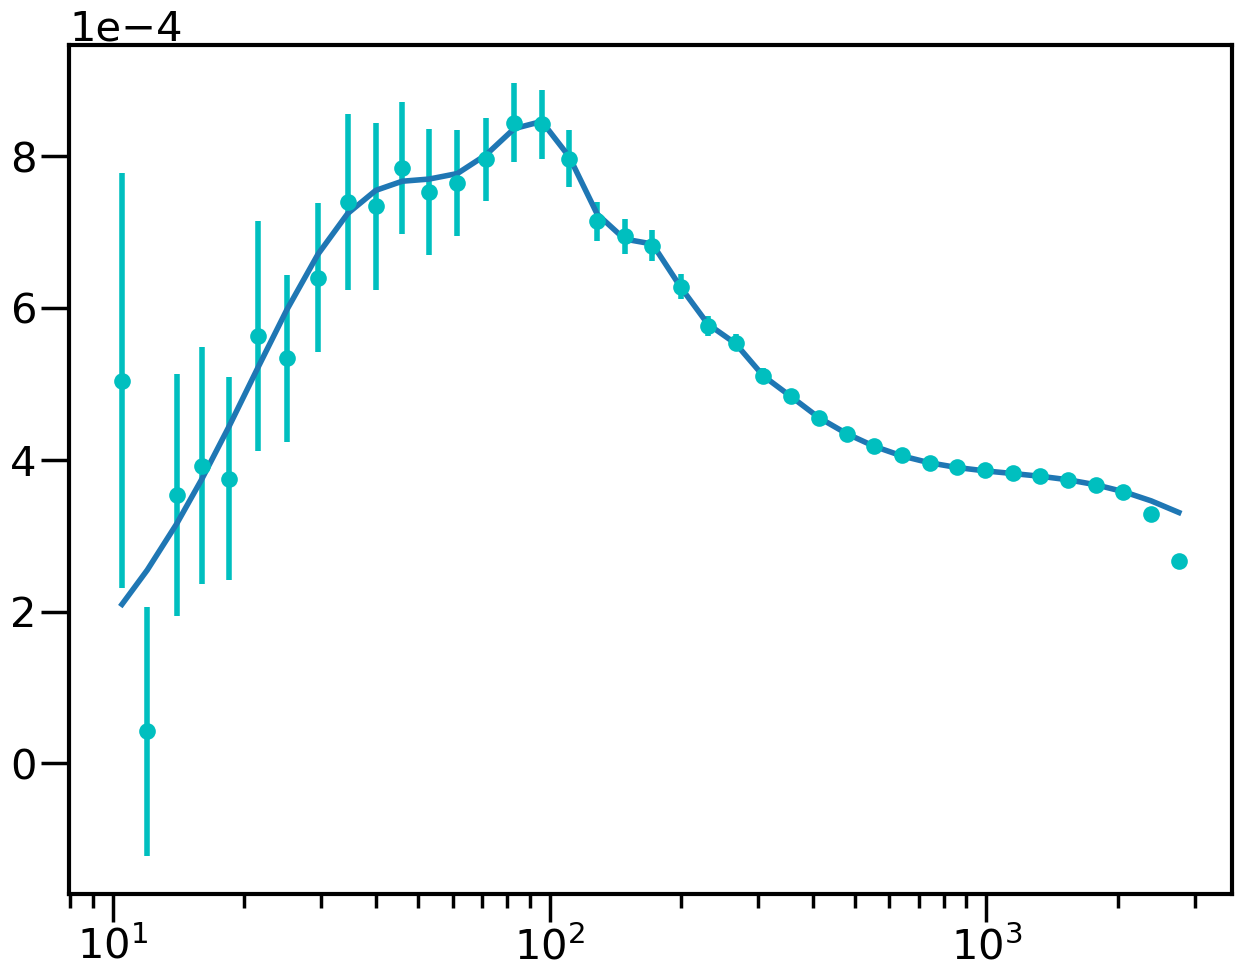

In [123]:
# errorbar(l,cl_sim_W['clg_stats']['mean'],cl_sim_W['clg_stats']['std'],fmt='ro')
f=lb
errorbar(lb,f*cl_sim_W['clg_b2_stats'][corr]['mean'],f*cl_sim_W['clg_b2_stats'][corr]['std'],fmt='co')
plot(lb,f*cl0['cl_b'][corr])
# plot(lb,f*(coupling_M_binned_inv@cl_sim_W['clp_b'][0,:]))
# plot(l,cl_sim_N['clg_stats']['mean'],'g--')
xscale('log')
# yscale('log')
# ylim(0,1.e-6)

[]

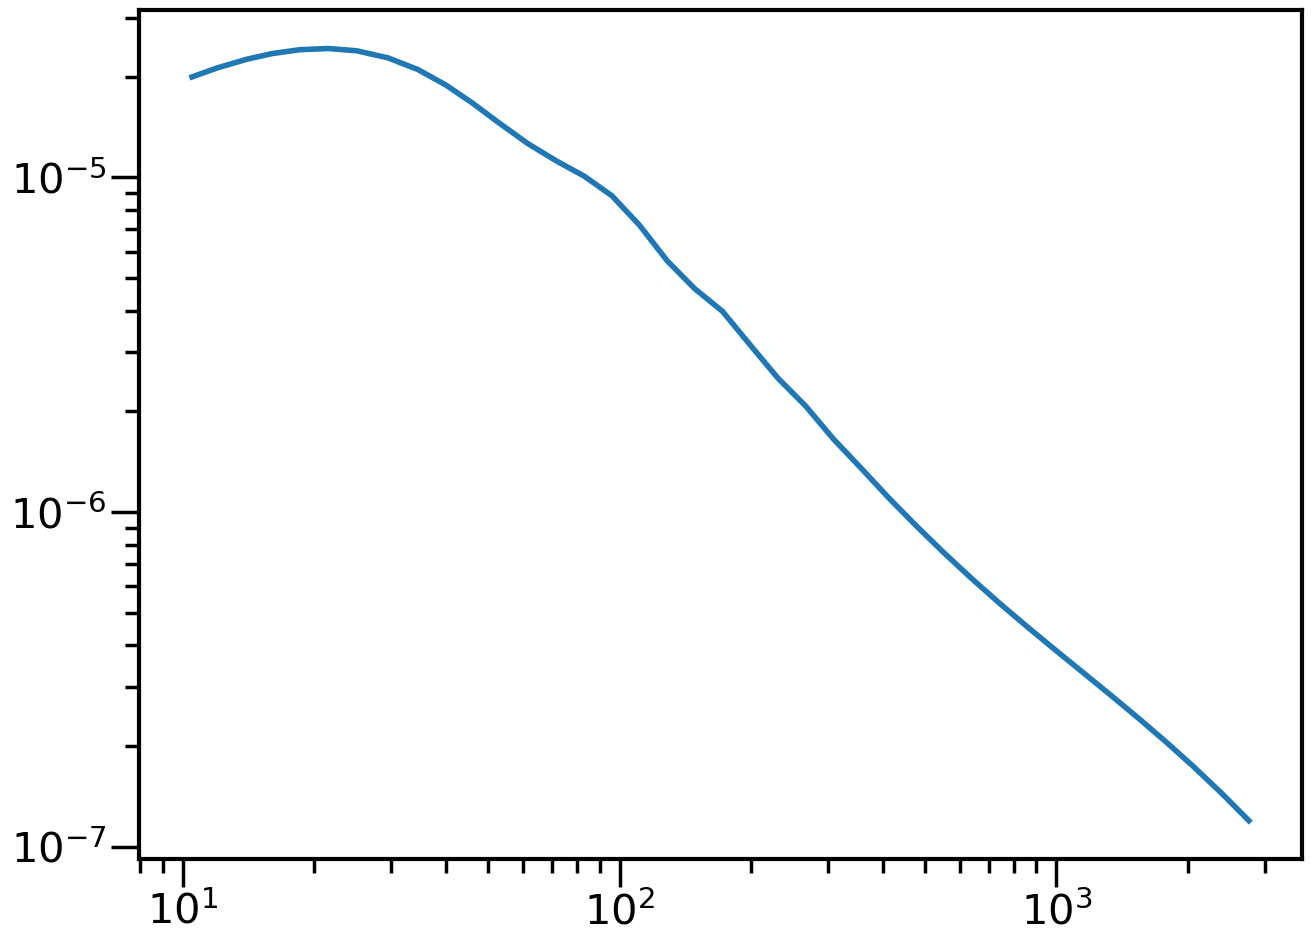

In [124]:
plot(lb,cl0['cl_b'][corr])
loglog()

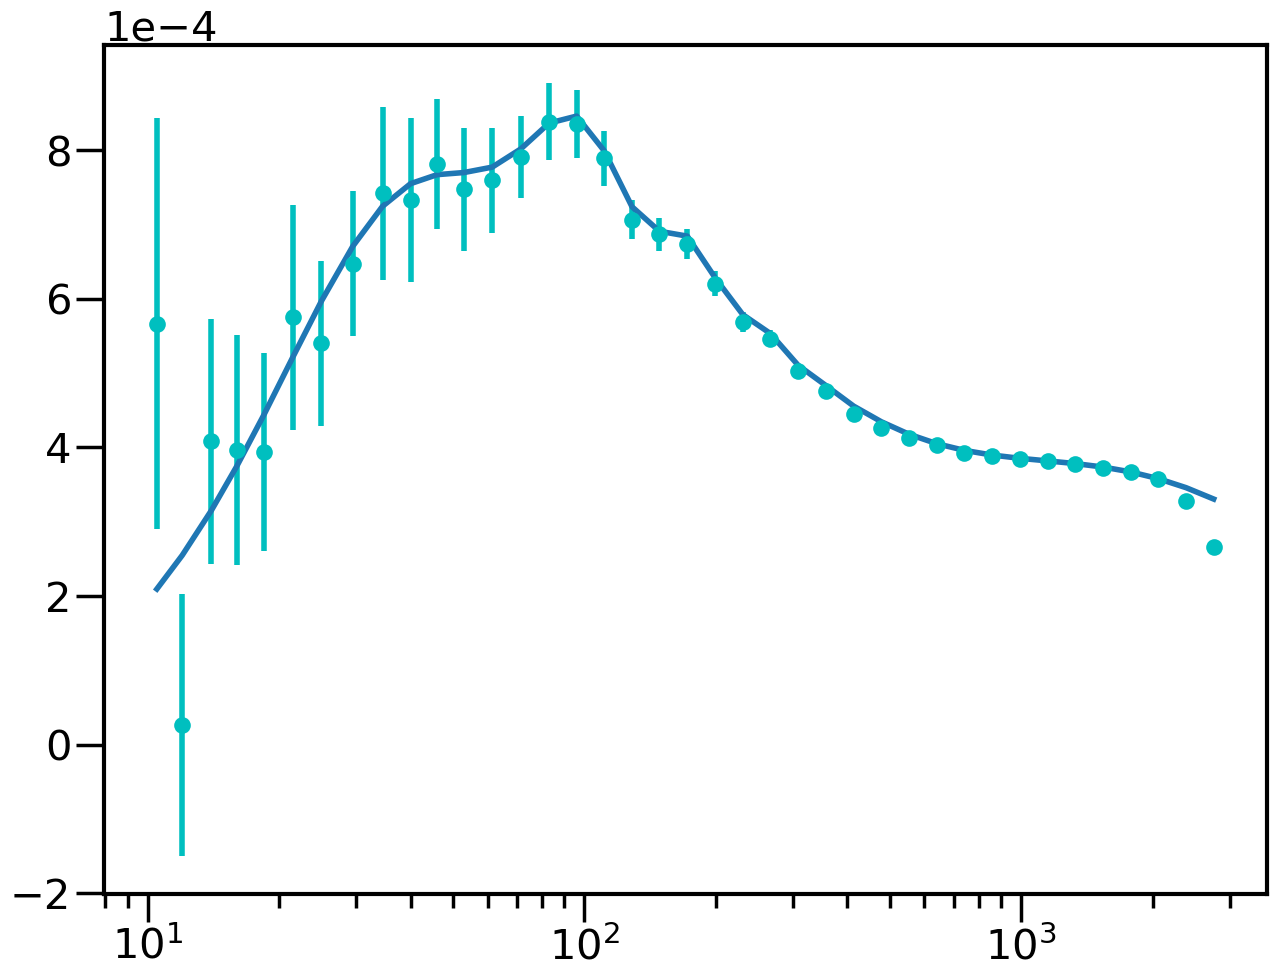

In [125]:
# errorbar(l,cl_sim_W['clg_stats']['mean'],cl_sim_W['clg_stats']['std'],fmt='ro')
f=lb
errorbar(lb,f*cl_sim_Ww['clg_b22_stats'][corr]['mean'],f*cl_sim_Ww['clg_b22_stats'][corr]['std'],fmt='co')
plot(lb,f*cl0['cl_b'][corr])
# plot(lb,f*(coupling_M_binned_inv@cl_sim_W['clp_b'][0,:]))
# plot(l,cl_sim_N['clg_stats']['mean'],'g--')
xscale('log')
# yscale('log')
# ylim(0,1.e-6)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


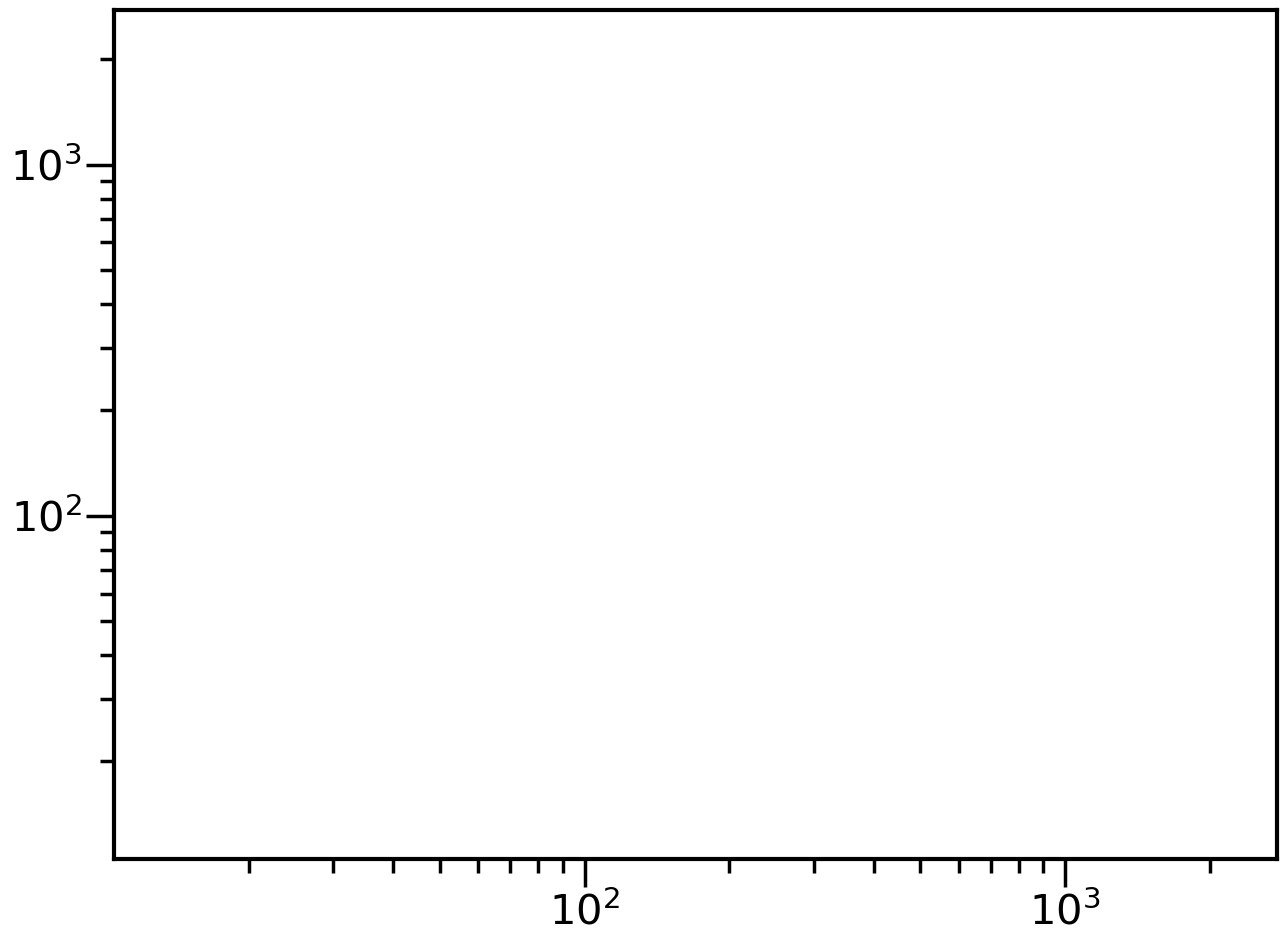

In [126]:
cm=corr_matrix(cov_mat=np.real(cl_sim_W['clg_b_stats'][corr]['cov']))
pcolor(lb,lb,cm,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

show()

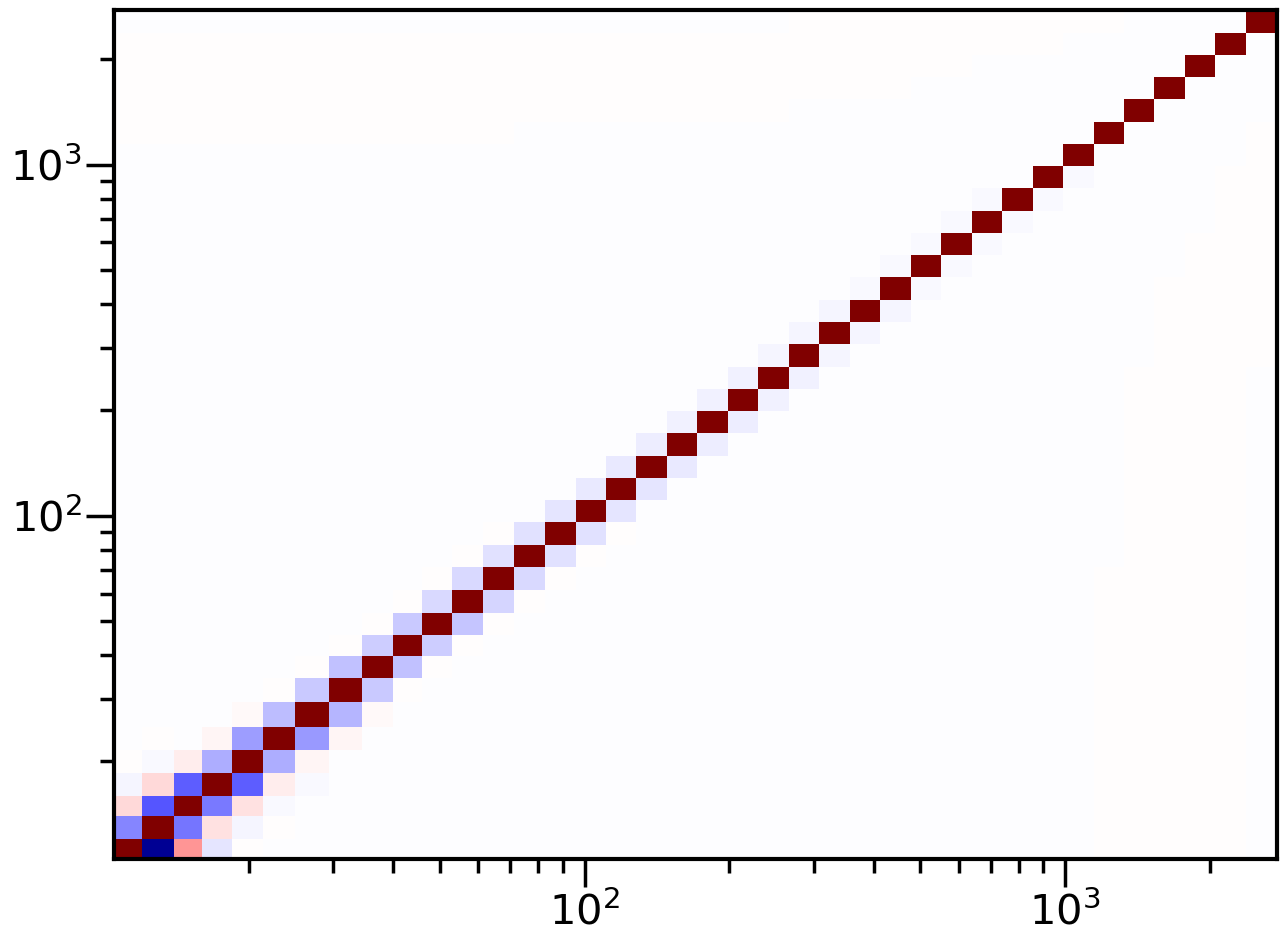

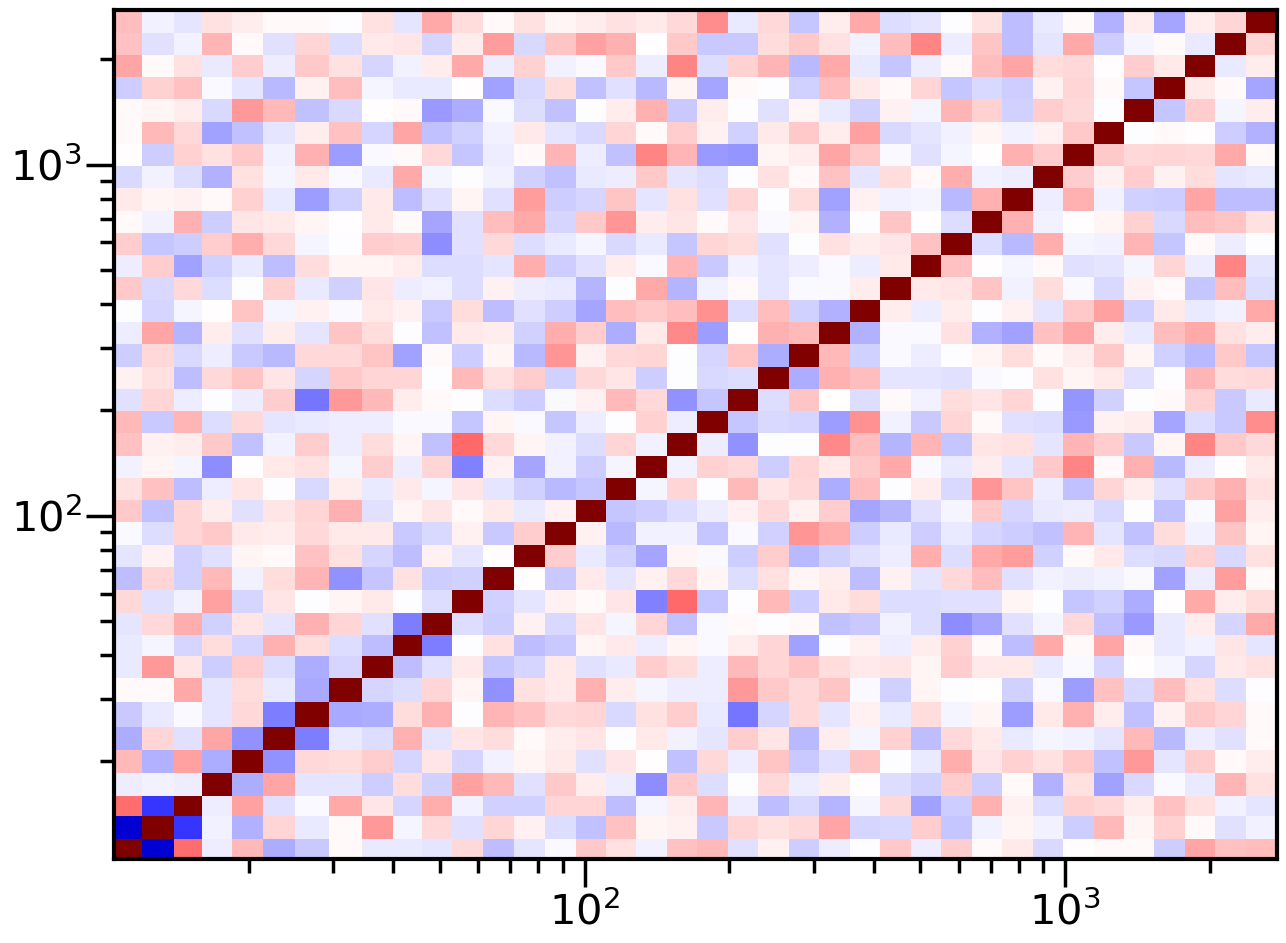

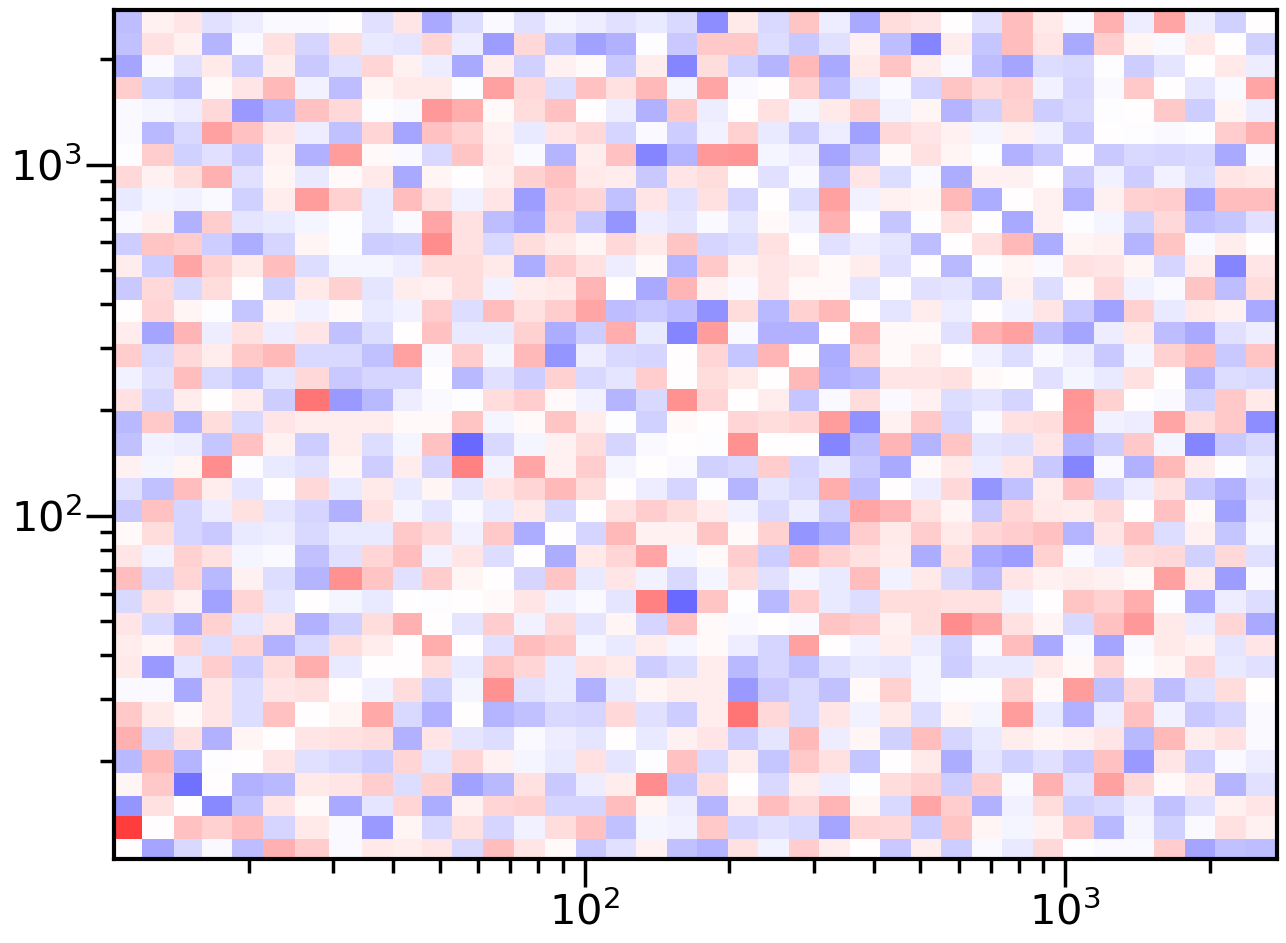

In [138]:
cov2=coupling_M_binned2_inv@cl0_win['cov'][corr]@coupling_M_binned2_inv
cm=corr_matrix(cov_mat=cov2[:500,:500])
pcolor(lb,lb,cm,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
show()
cm2=corr_matrix(cov_mat=np.real(cl_sim_W['clg_b2_stats'][corr]['cov']))
pcolor(lb,lb,cm2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
show()
pcolor(lb,lb,cm-cm2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

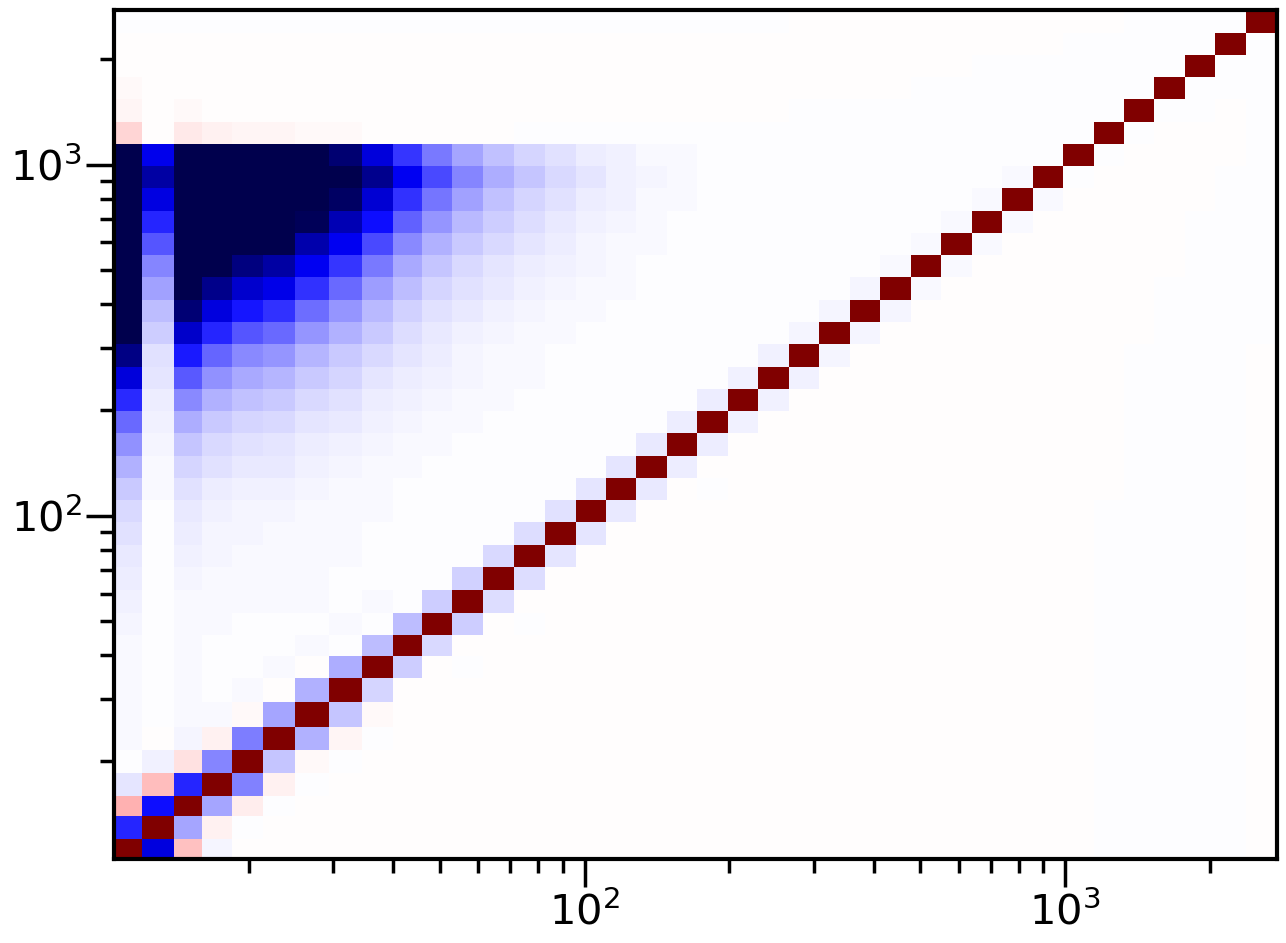

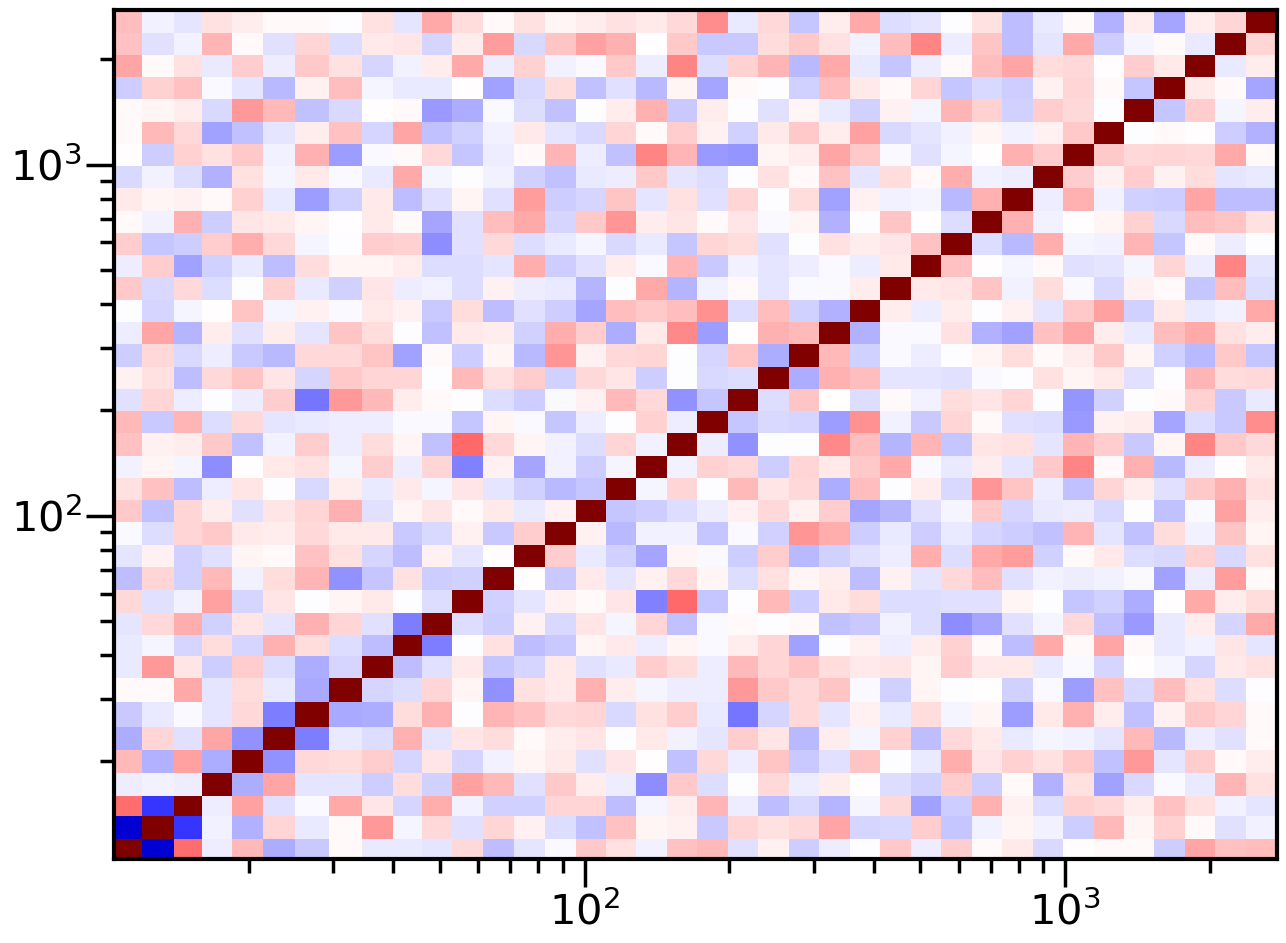

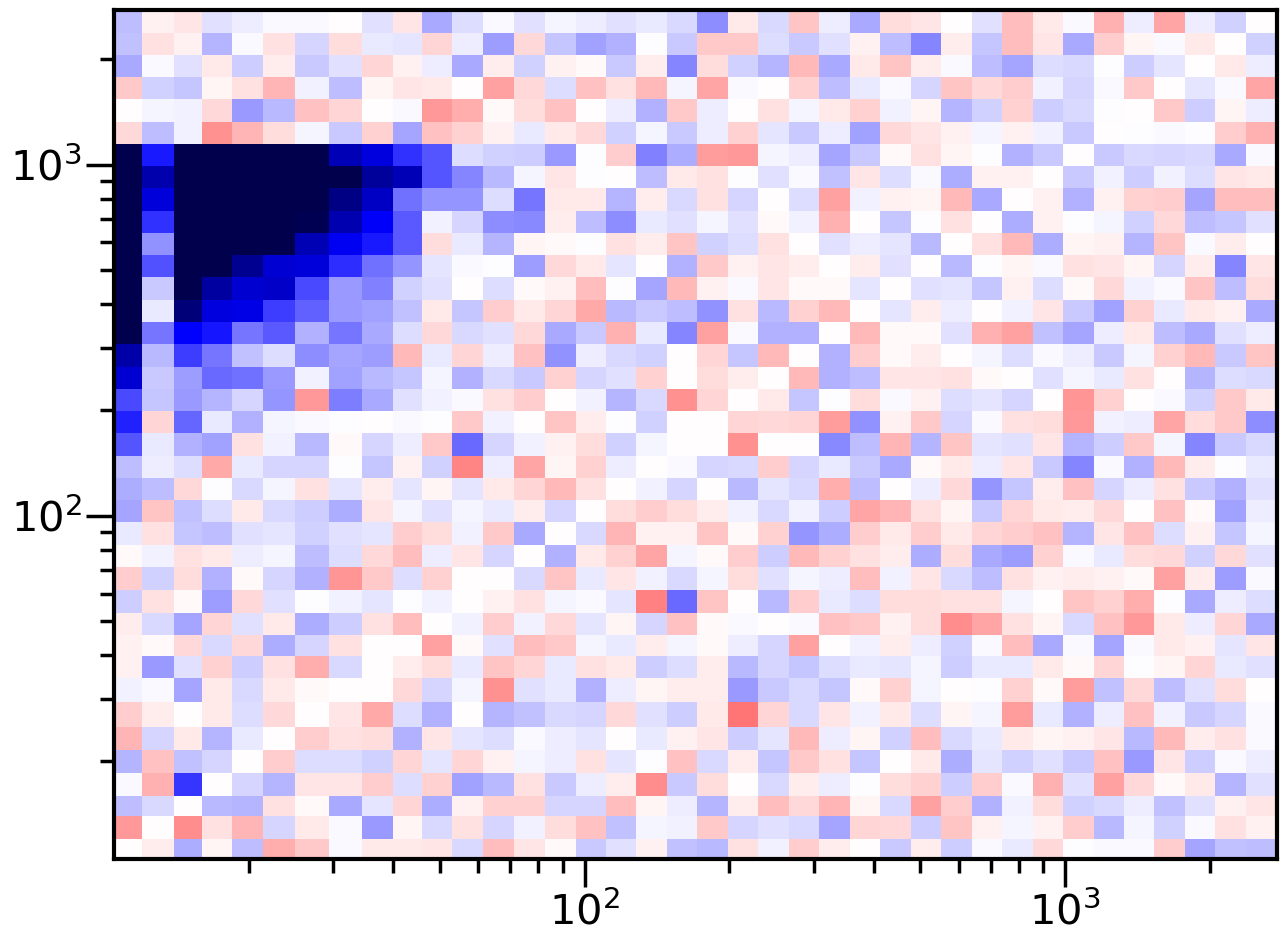

In [127]:
cov2=coupling_M_binned_inv@cl0_win['cov'][corr]@coupling_M_binned_inv
cm=corr_matrix(cov_mat=cov2[:500,:500])
pcolor(lb,lb,cm,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
show()
cm2=corr_matrix(cov_mat=np.real(cl_sim_W['clg_b2_stats'][corr]['cov']))
pcolor(lb,lb,cm2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
show()
pcolor(lb,lb,cm-cm2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

In [128]:
corr

('galaxy', 'galaxy')

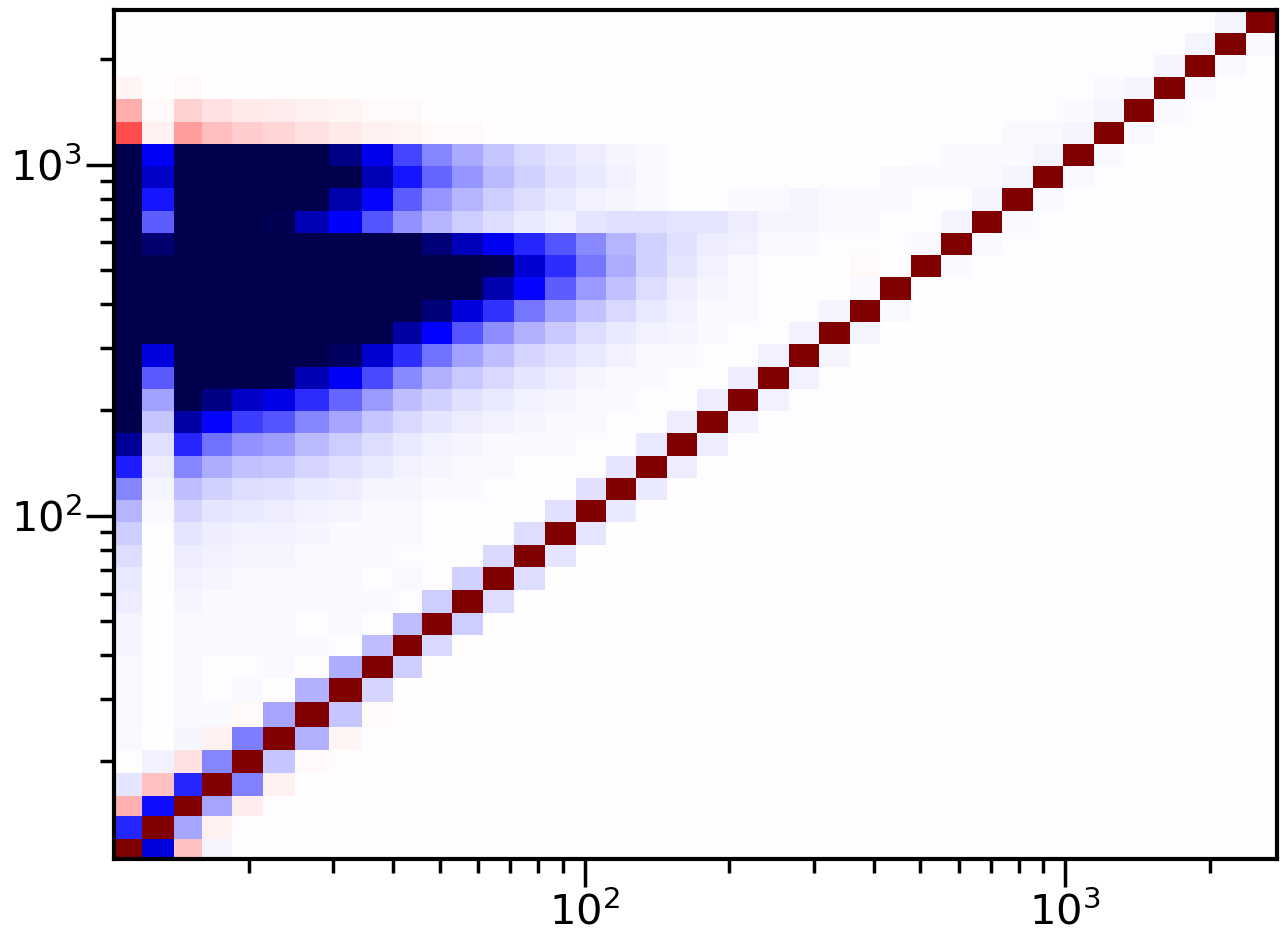

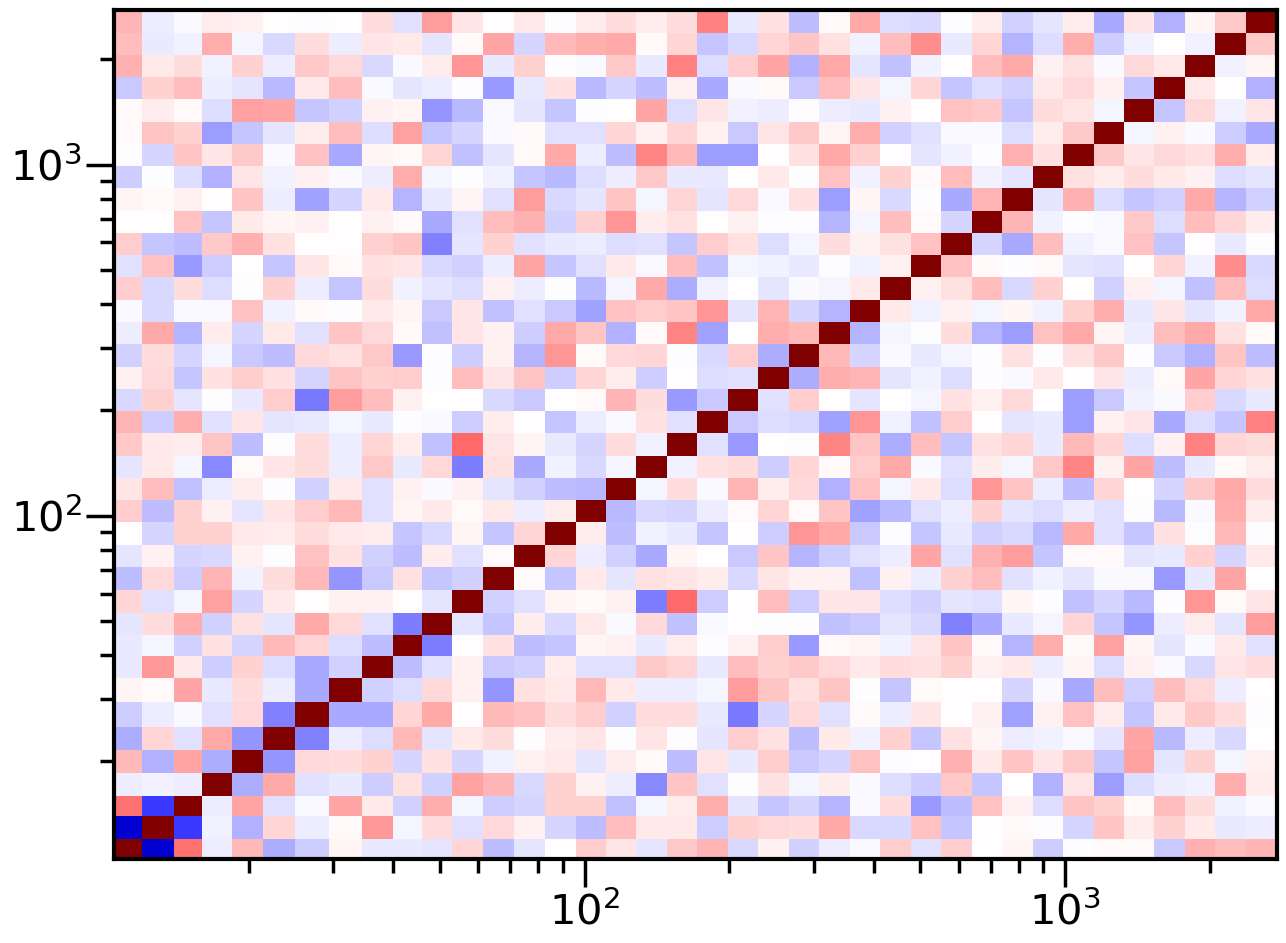

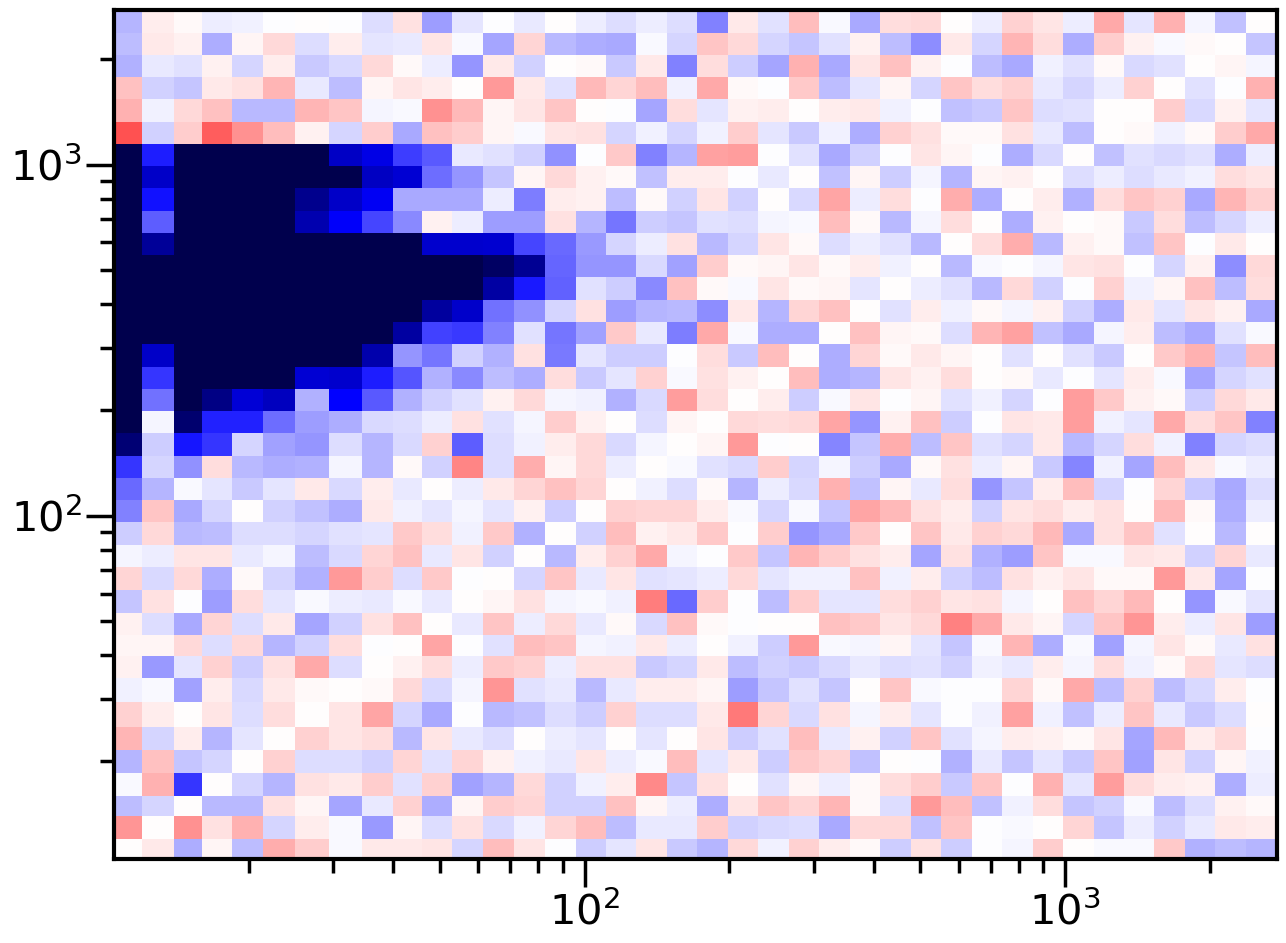

In [129]:
cov2=coupling_Mw_binned_inv@cl0_win['cov'][corr]@coupling_Mw_binned_inv
cm=corr_matrix(cov_mat=cov2[:500,:500])
pcolor(lb,lb,cm,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
show()
cm2=corr_matrix(cov_mat=np.real(cl_sim_Ww['clg_b2_stats'][corr]['cov']))
pcolor(lb,lb,cm2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
show()
pcolor(lb,lb,cm-cm2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

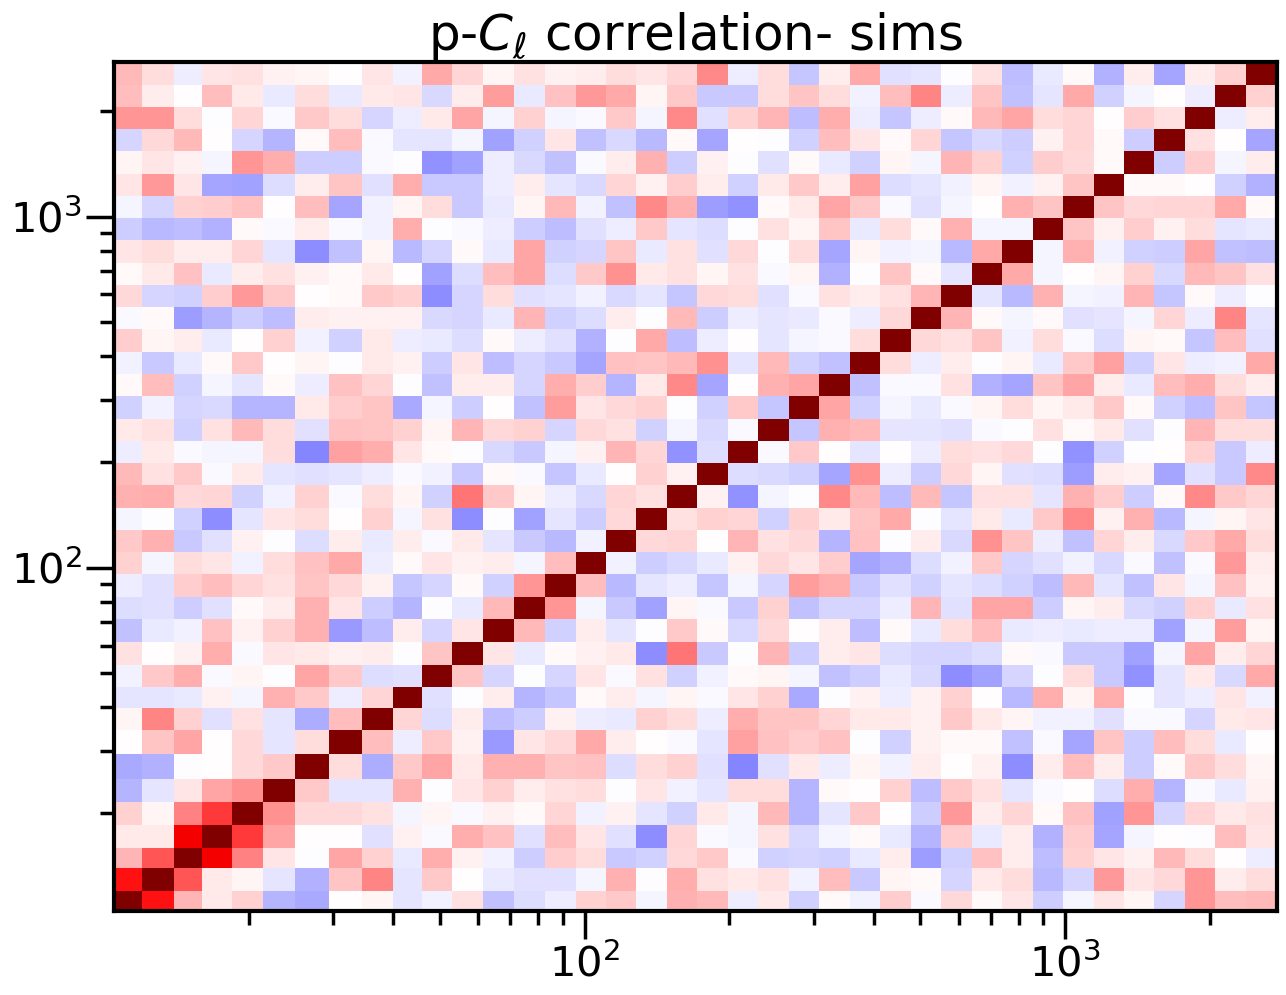

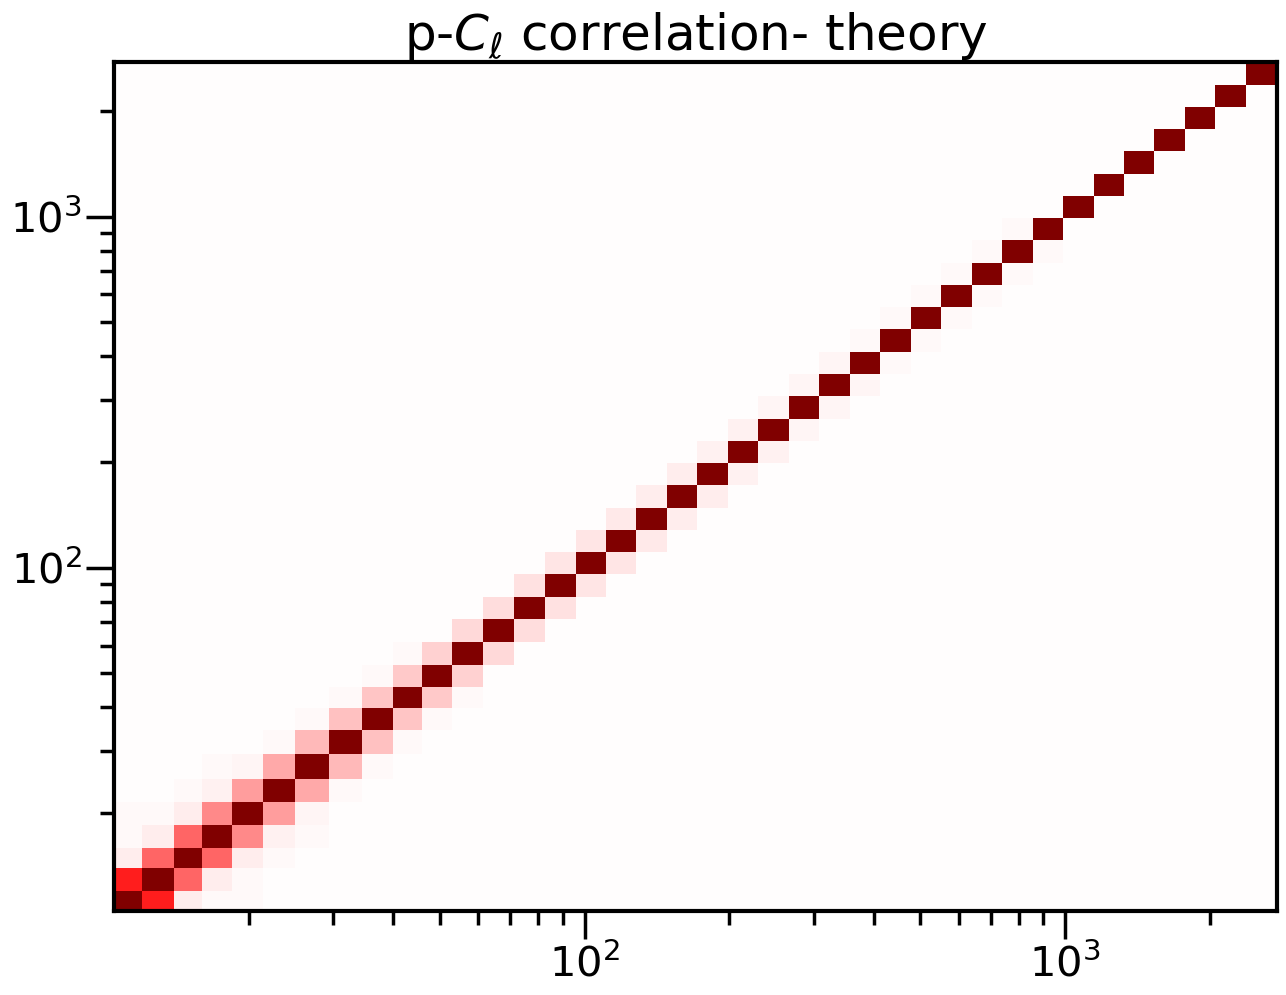

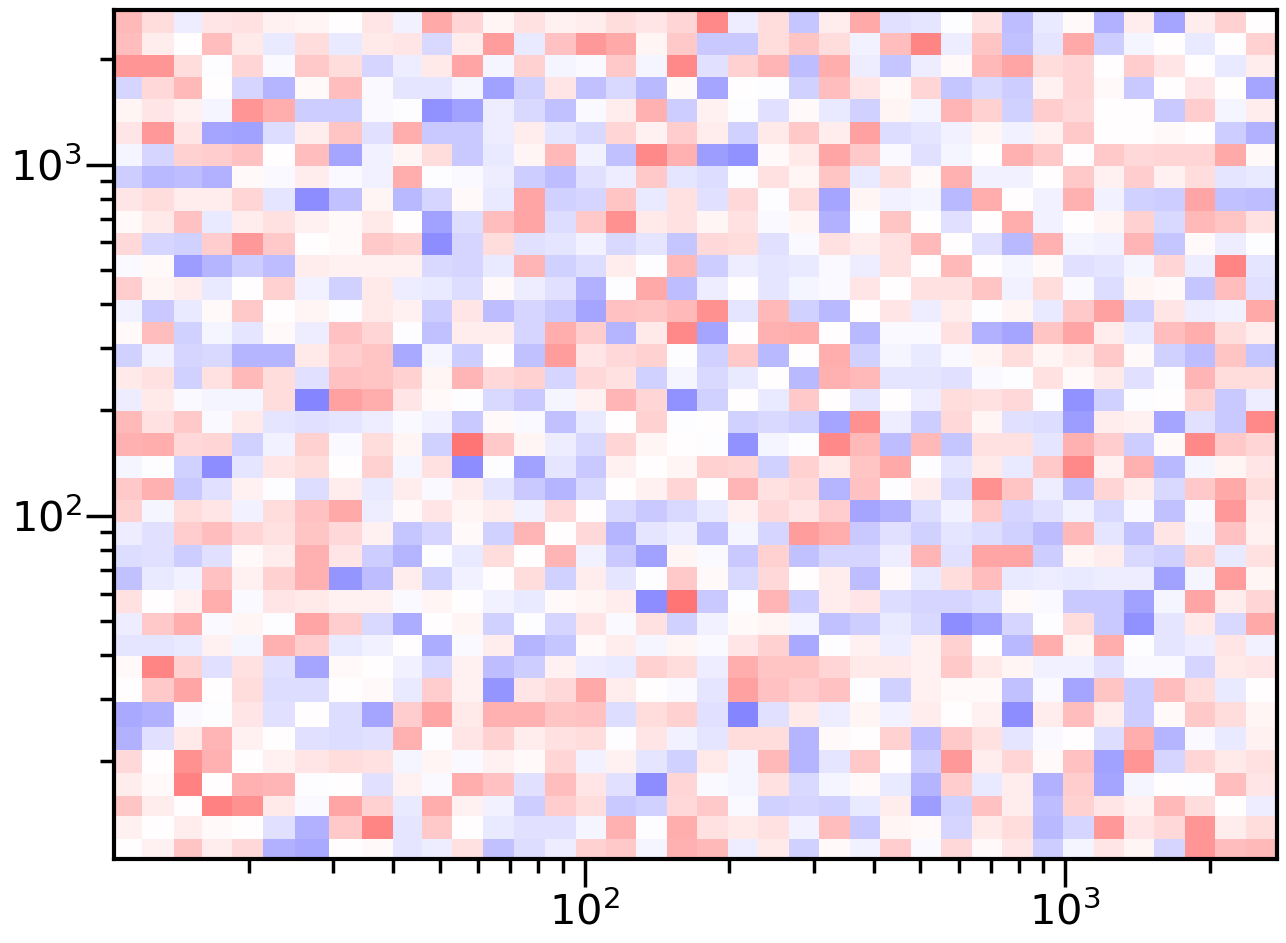

In [130]:
cm=corr_matrix(cov_mat=np.real(cl_sim_W['clp_b_stats'][corr]['cov']))
pcolor(lb,lb,cm,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
title('p-$C_\ell$ correlation- sims')
show()
cm2=corr_matrix(cov_mat=cl0_win['cov'][corr])
pcolor(lb,lb,cm2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
title('p-$C_\ell$ correlation- theory')
show()
pcolor(lb,lb,cm-cm2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')



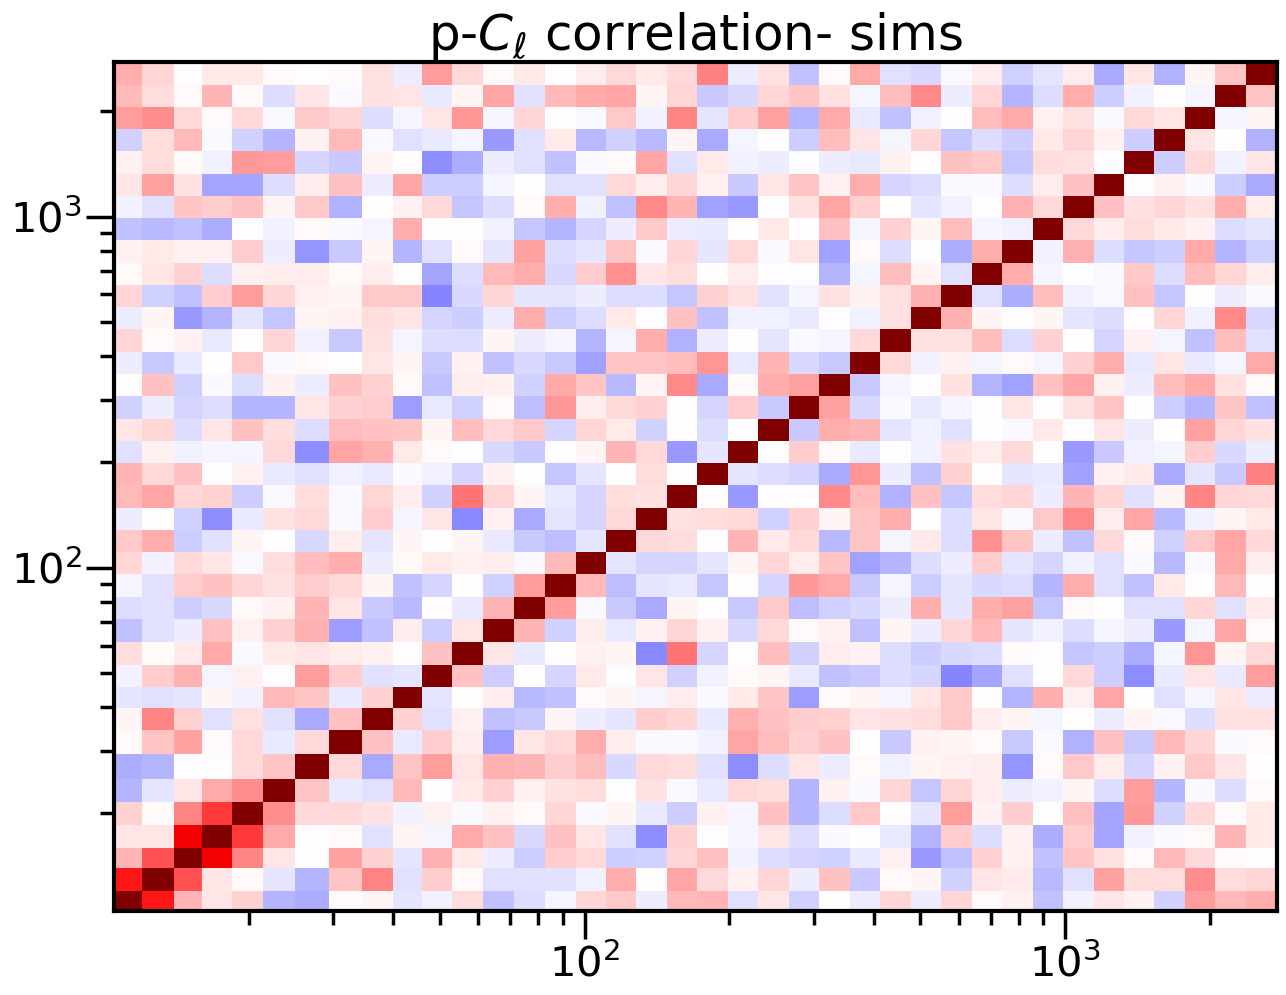

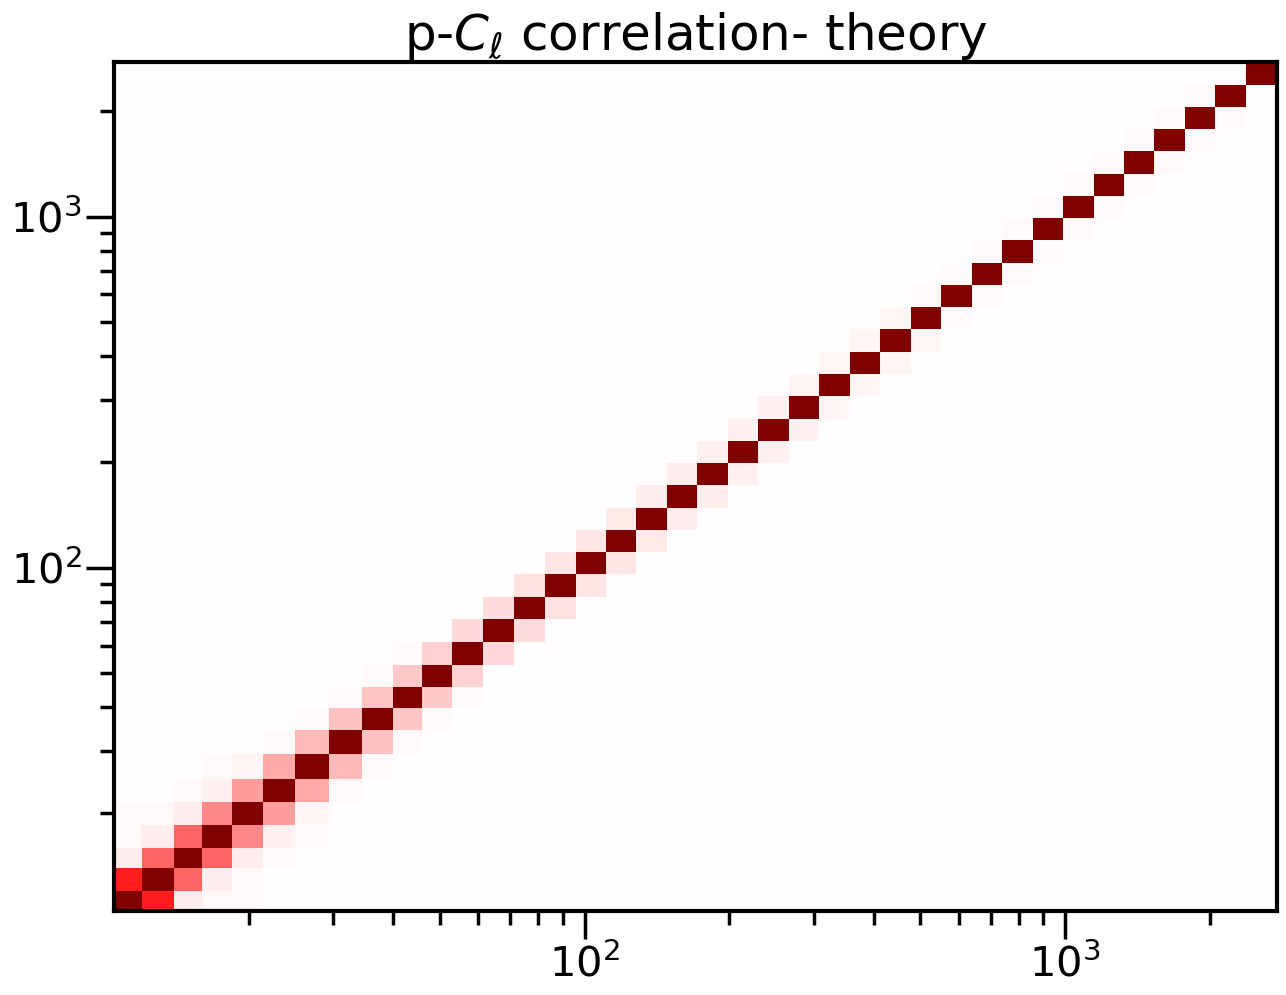

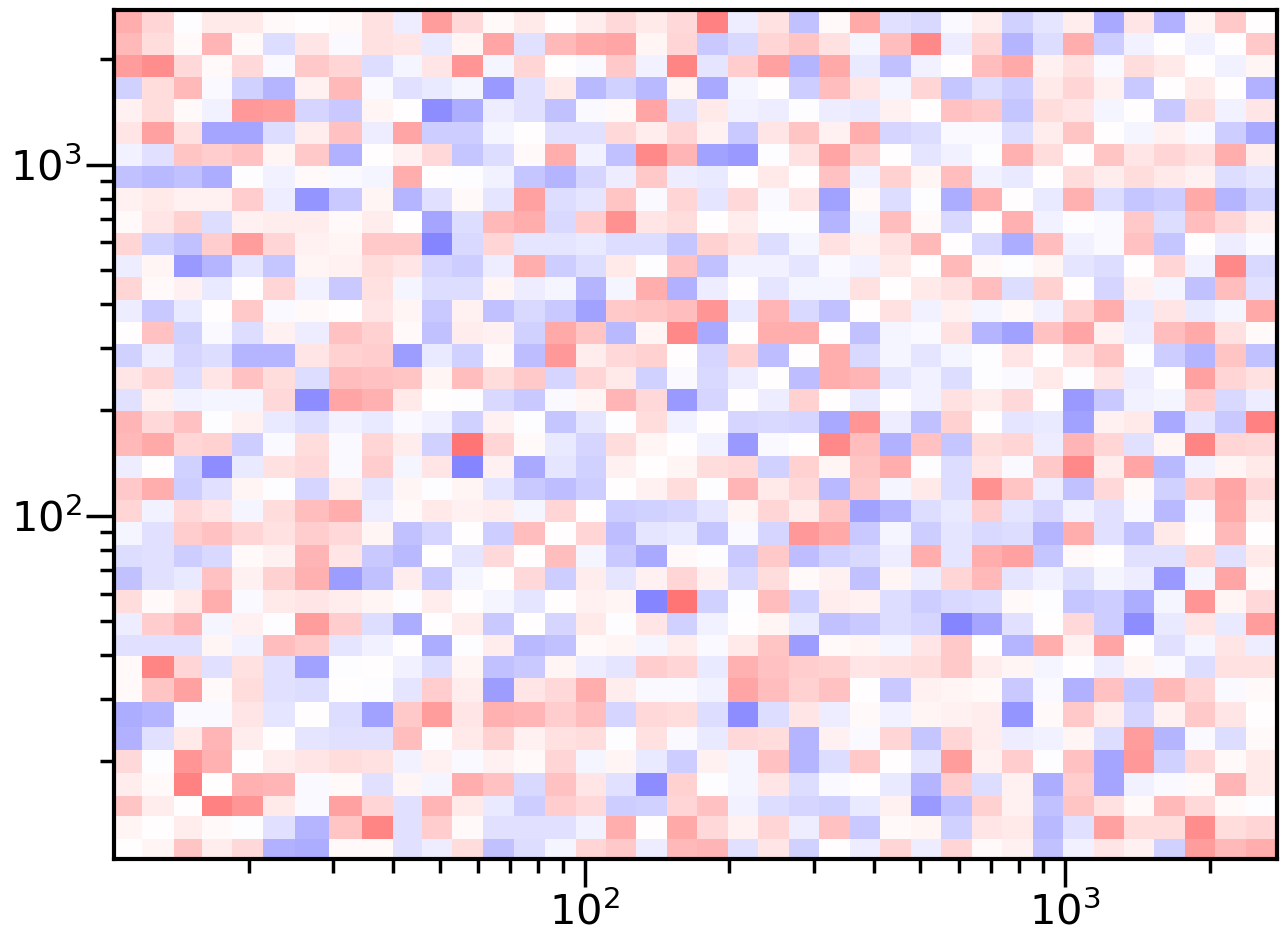

In [131]:
cm=corr_matrix(cov_mat=np.real(cl_sim_Ww['clp_b_stats'][corr]['cov']))
pcolor(lb,lb,cm,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
title('p-$C_\ell$ correlation- sims')
show()
cm2=corr_matrix(cov_mat=cl0_win_w['cov'][corr])
pcolor(lb,lb,cm2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')
title('p-$C_\ell$ correlation- theory')
show()
pcolor(lb,lb,cm-cm2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')




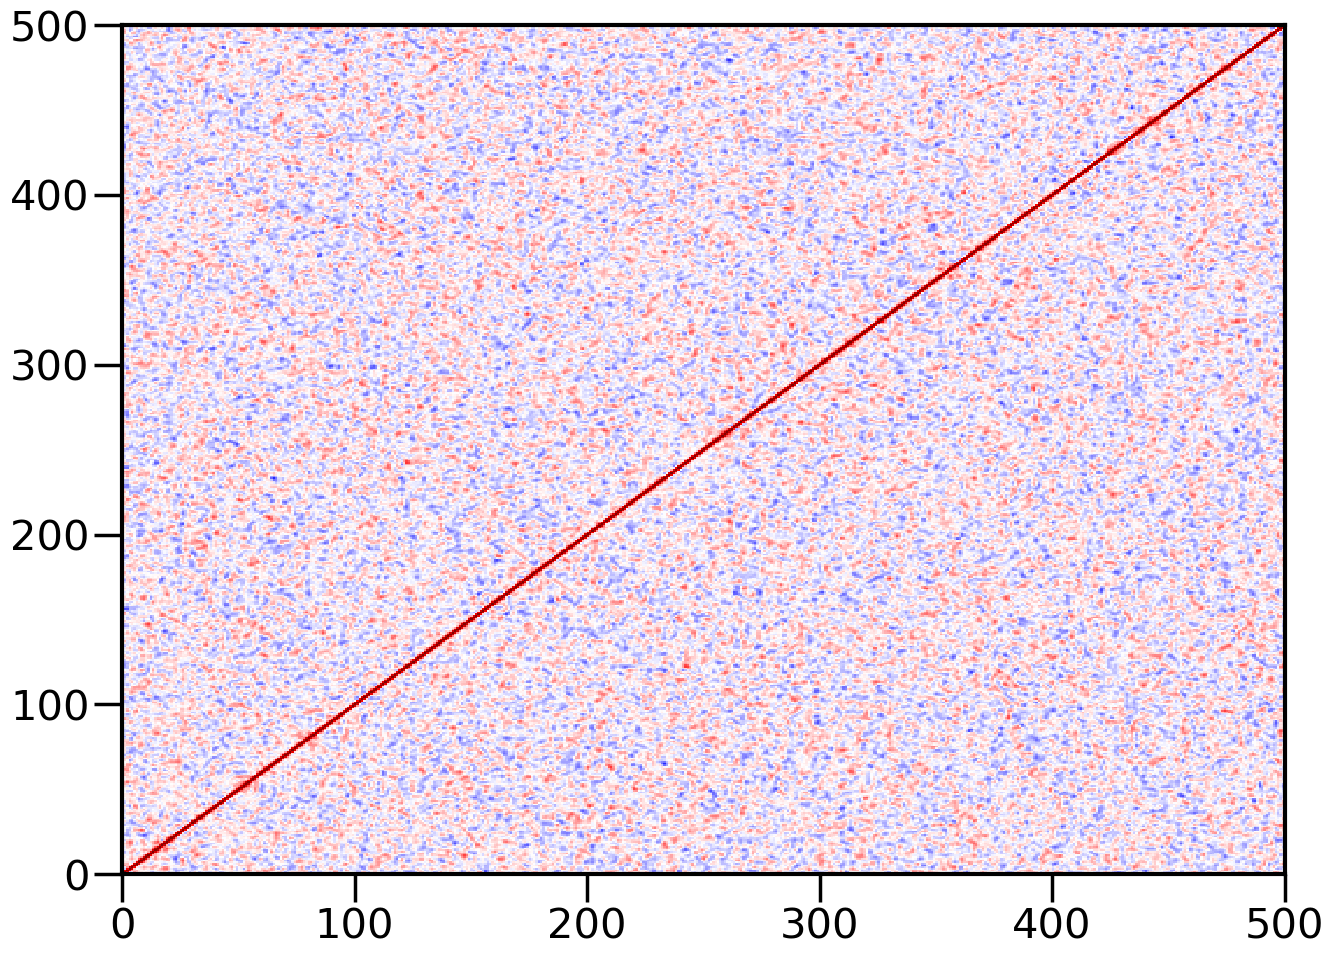

In [132]:
cm=corr_matrix(cov_mat=np.real(cl_sim_W['clp_stats'][corr]['cov'])[:500,:500])
pcolor(cm,vmin=-1,vmax=1,cmap='seismic')
show()

distributed.utils_perf - INFO - full garbage collection released 164.72 MB from 254327 reference cycles (threshold: 10.00 MB)


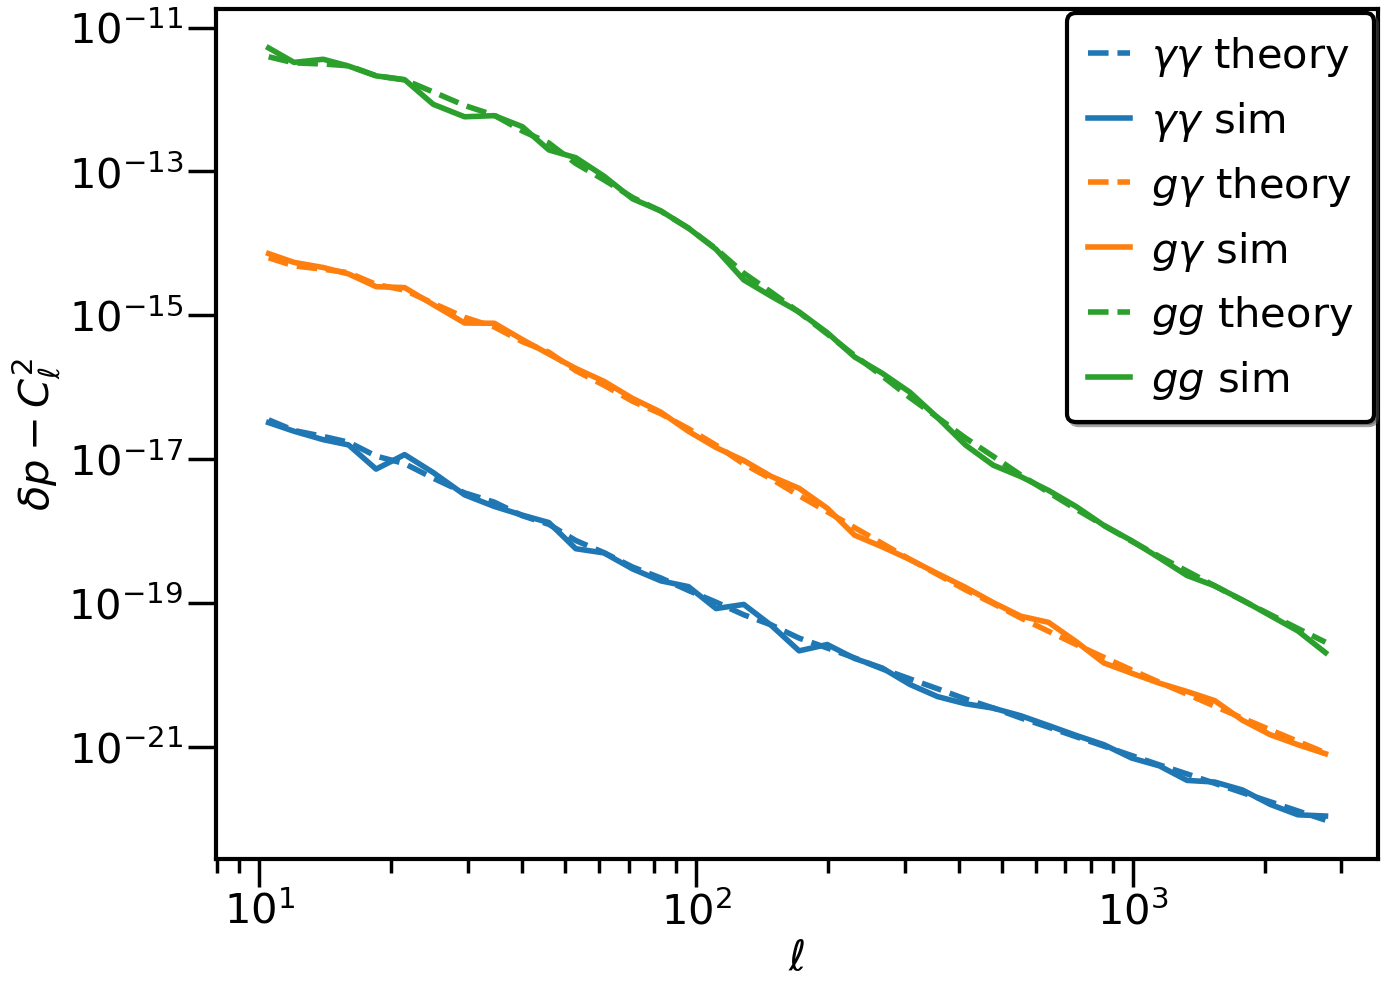

Text(0, 0.5, '$\\delta C_\\ell^2$')

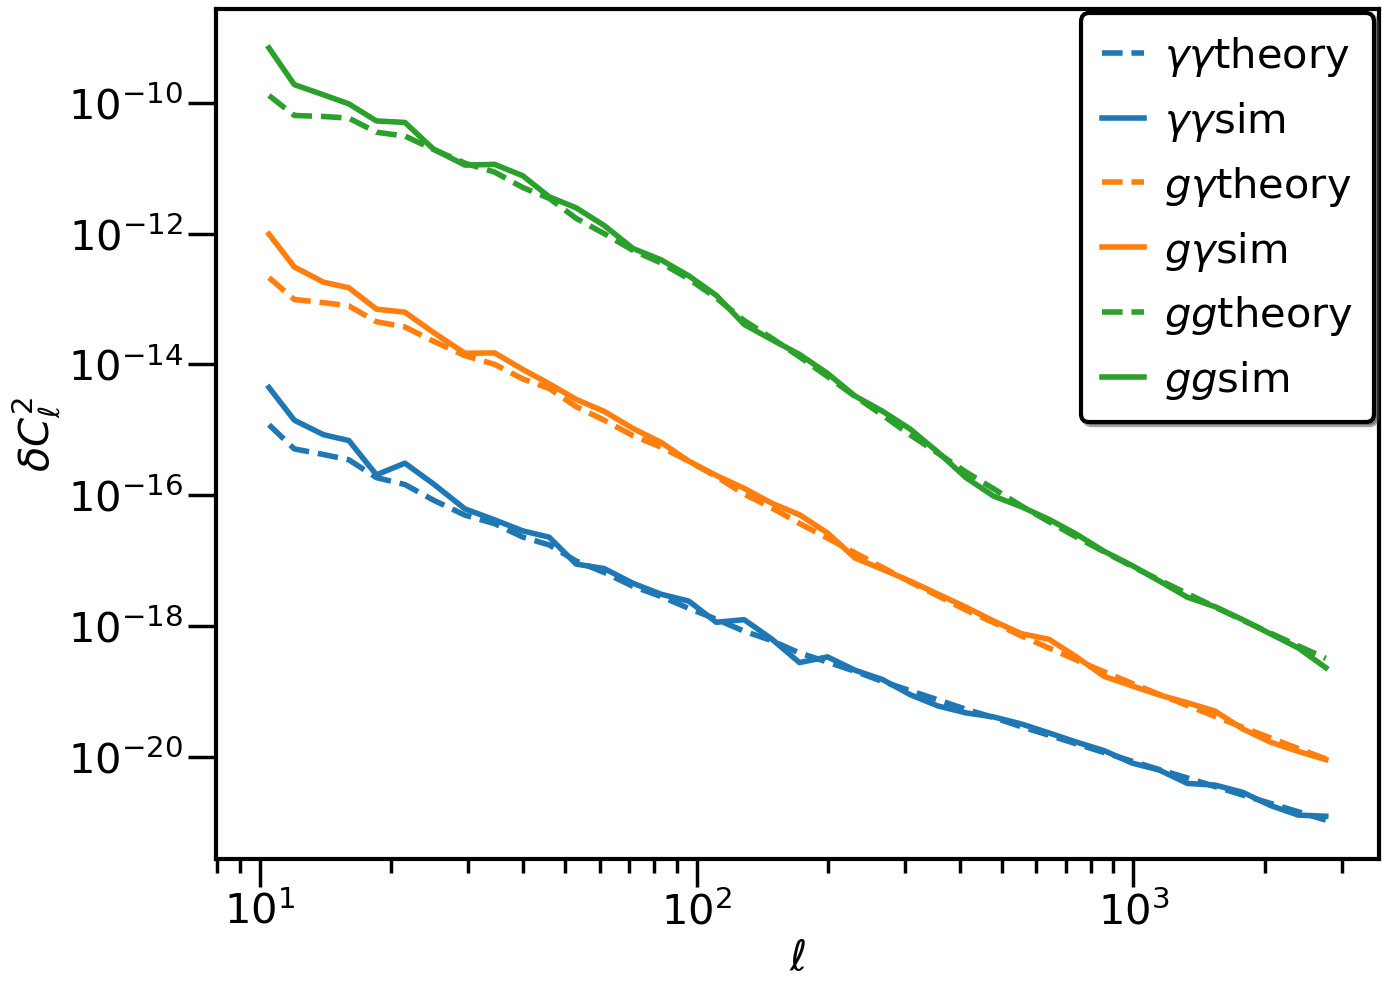

In [133]:
i=0
for corr in corrs:
    lbl=''
    color=colors[i]
    lbl=labels[corr]+' theory'
    plot(lb,np.diag(cl0_win['cov'][corr]),'--',label=lbl,color=color)
    lbl=labels[corr]+' sim'
    plot(lb,np.diag(np.real(cl_sim_W['clp_b_stats'][corr]['cov'])),label=lbl,color=color)
    i+=1
legend()
xscale('log')
yscale('log')
xlabel(r'$\ell$')
ylabel(r'$\delta p-C_\ell^2$')
show()
i=0
for corr in corrs:
    lbl=''
    color=colors[i]
    lbl=labels[corr]+'theory'
    plot(lb,np.diag(cl0['cov'][corr]['final_b']),'--',label=lbl,color=color)
    
    lbl=labels[corr]+'sim'
    plot(lb,np.diag(np.real(cl_sim_W['clg_b2_stats'][corr]['cov'])),label=lbl,color=color)
    i+=1
xscale('log')
yscale('log')
legend()
xlabel(r'$\ell$')
ylabel(r'$\delta C_\ell^2$')

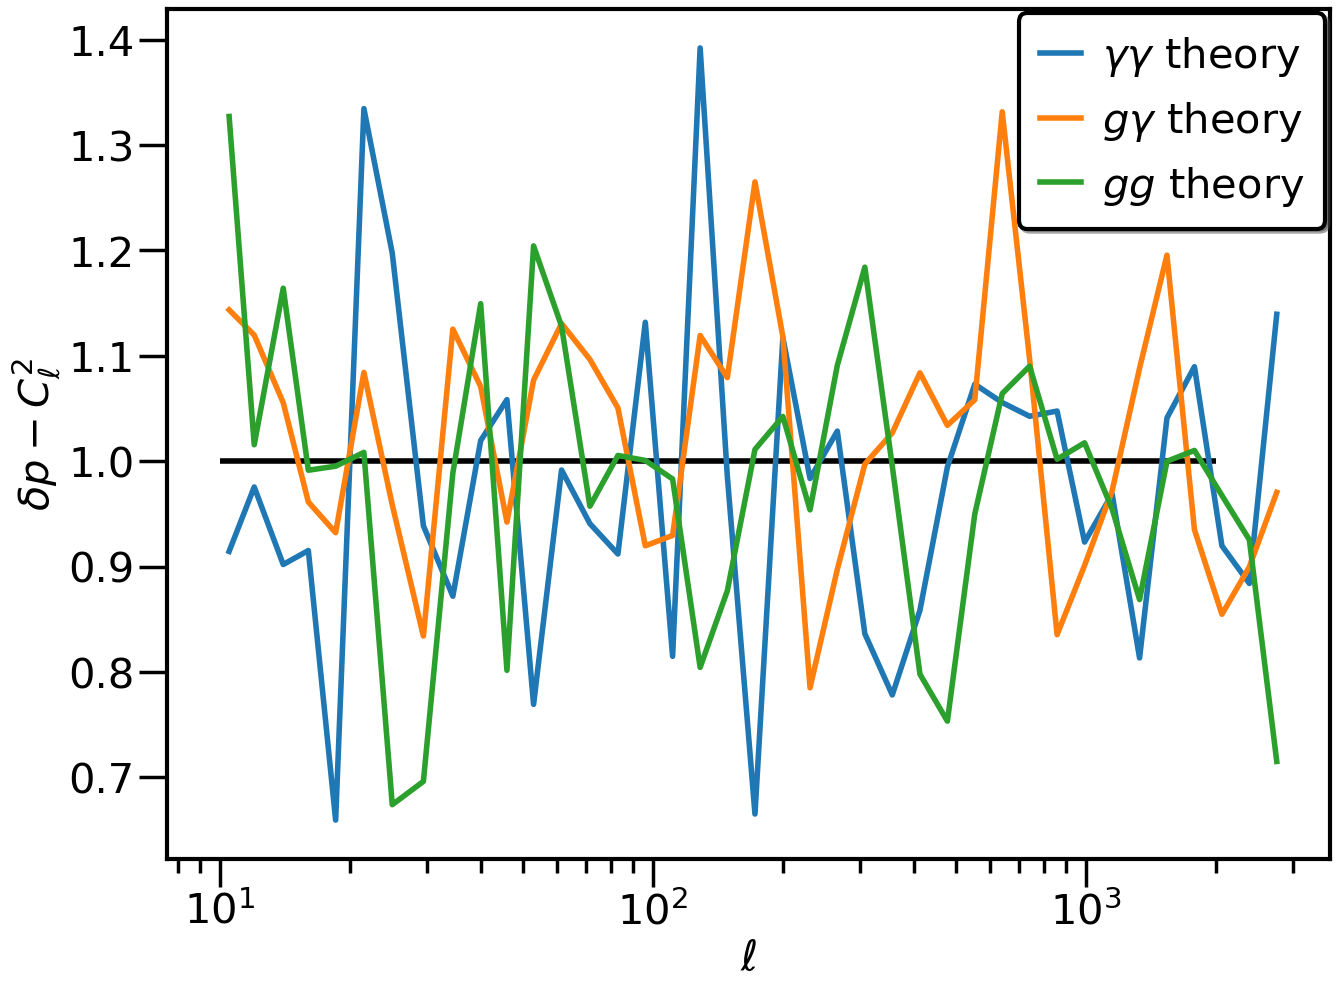

Text(0, 0.5, '$\\delta C_\\ell^2$')

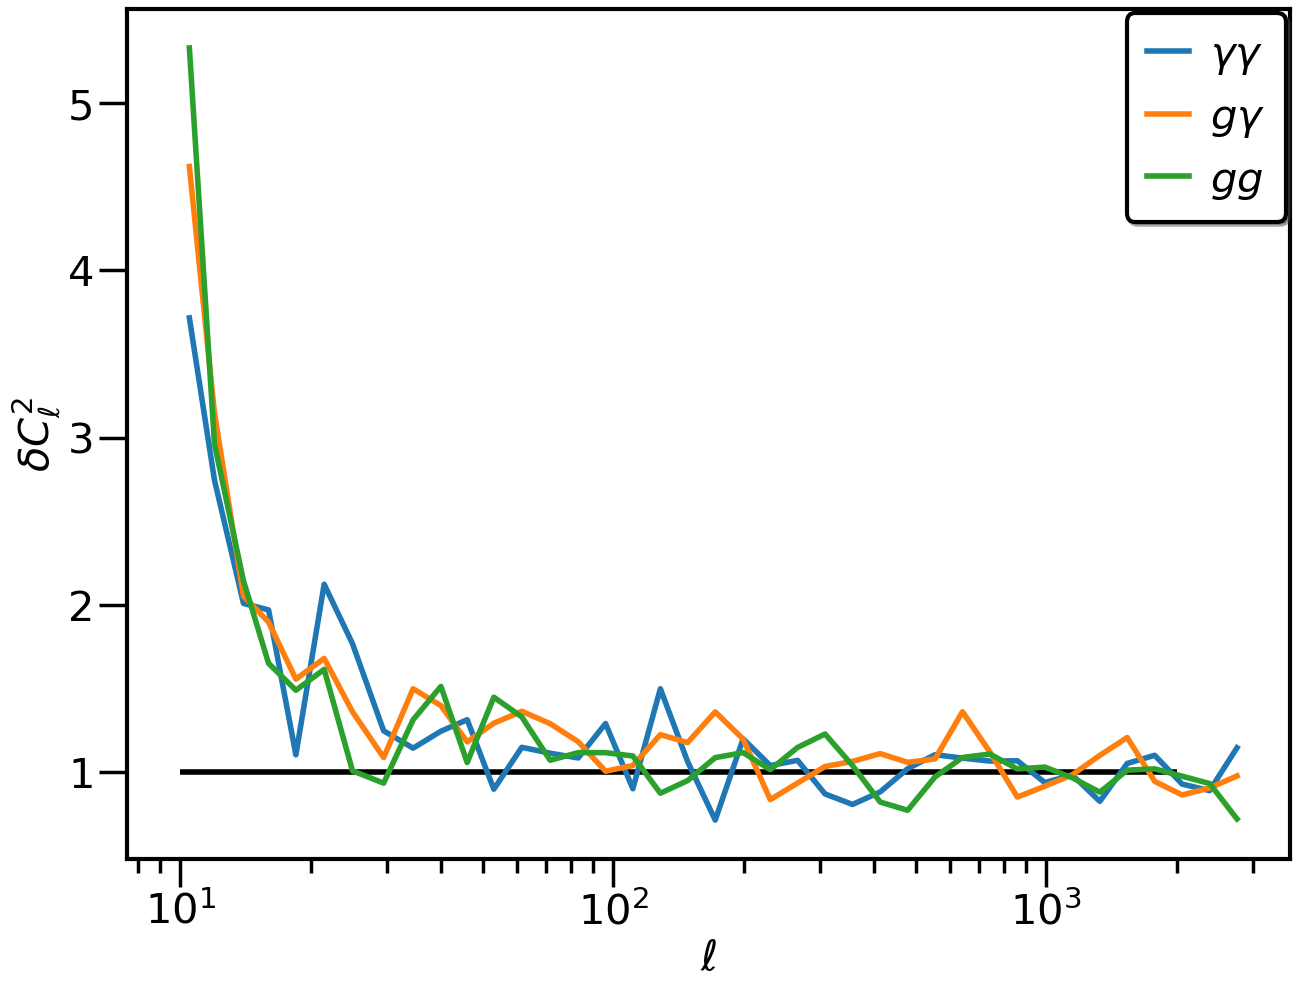

In [134]:
i=0
for corr in corrs:
    lbl=''
    color=colors[i]
    lbl=labels[corr]+' theory'
    plot(lb,np.diag(np.real(cl_sim_W['clp_b_stats'][corr]['cov']))/np.diag(cl0_win['cov'][corr]),label=lbl,color=color)
    i+=1
legend()
xscale('log')
hlines(1,10,2000)
# yscale('log')
xlabel(r'$\ell$')
ylabel(r'$\delta p-C_\ell^2$')
show()
i=0
for corr in corrs:
    lbl=''
    color=colors[i]
    lbl=labels[corr]
    plot(lb,np.diag(np.real(cl_sim_W['clg_b2_stats'][corr]['cov']))/np.diag(cl0['cov'][corr]['final_b']),label=lbl,color=color)
    i+=1
xscale('log')
hlines(1,10,2000)
# yscale('log')
legend()
xlabel(r'$\ell$')
ylabel(r'$\delta C_\ell^2$')

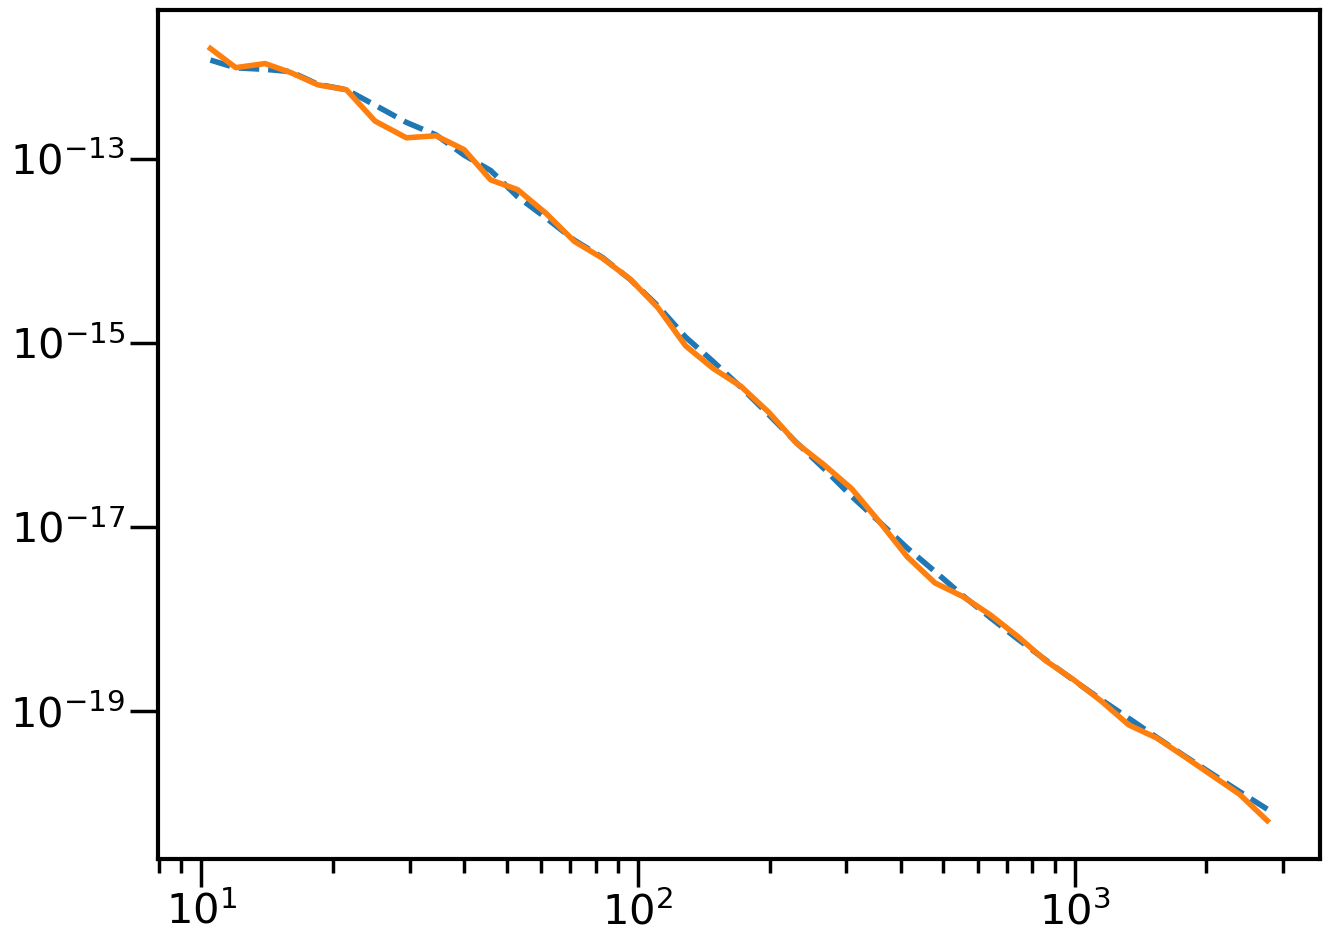

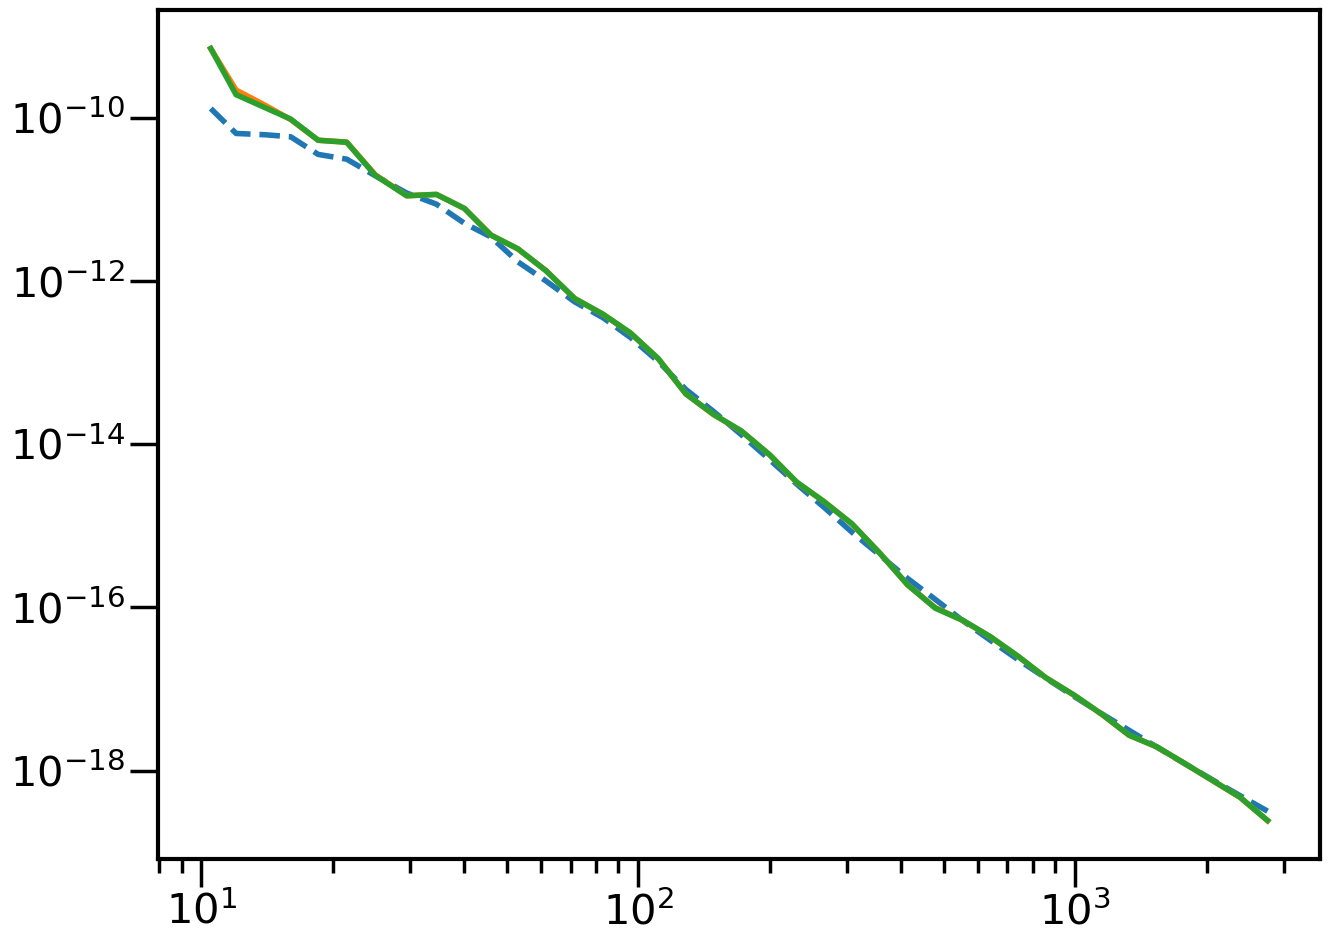

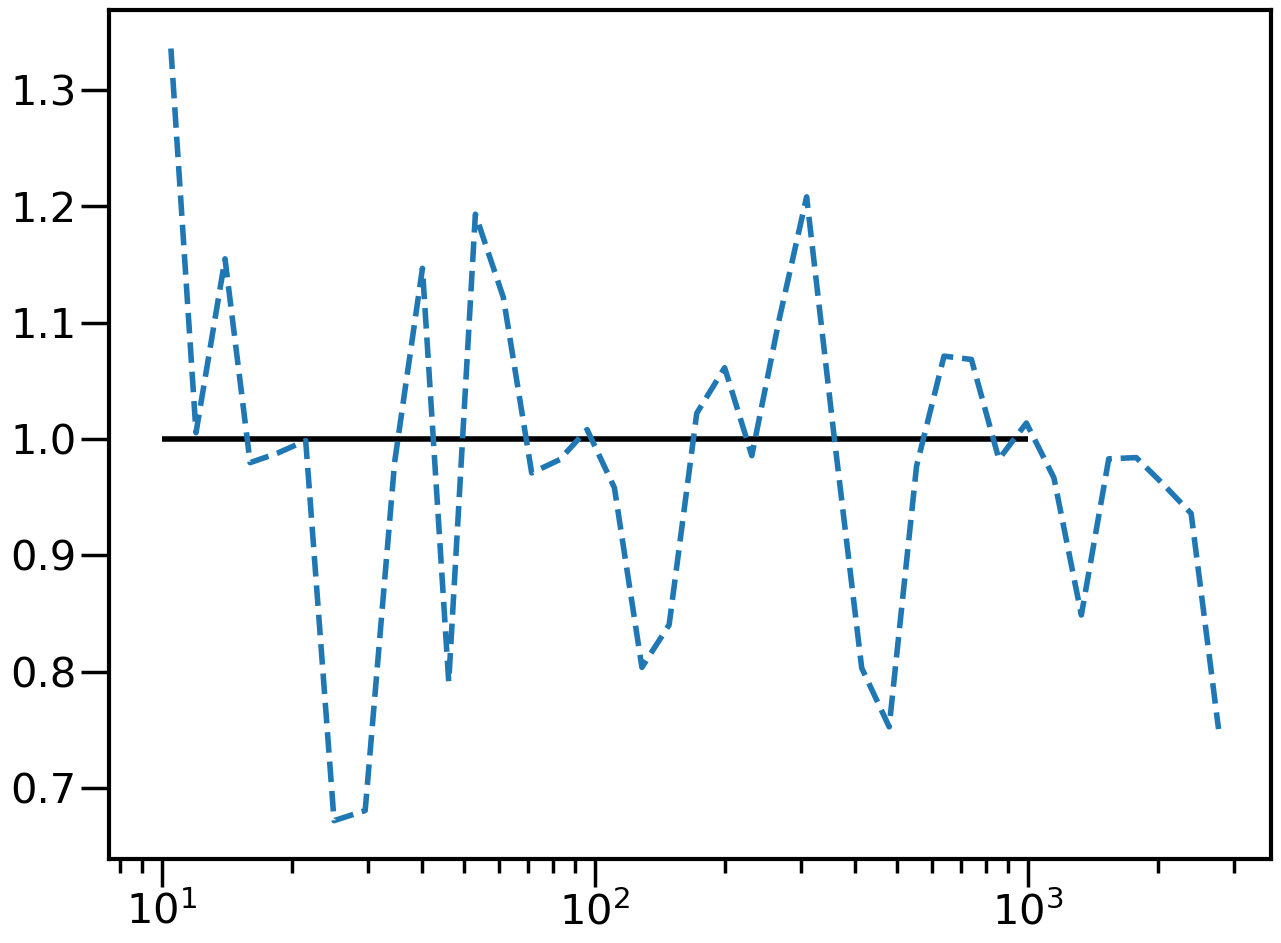

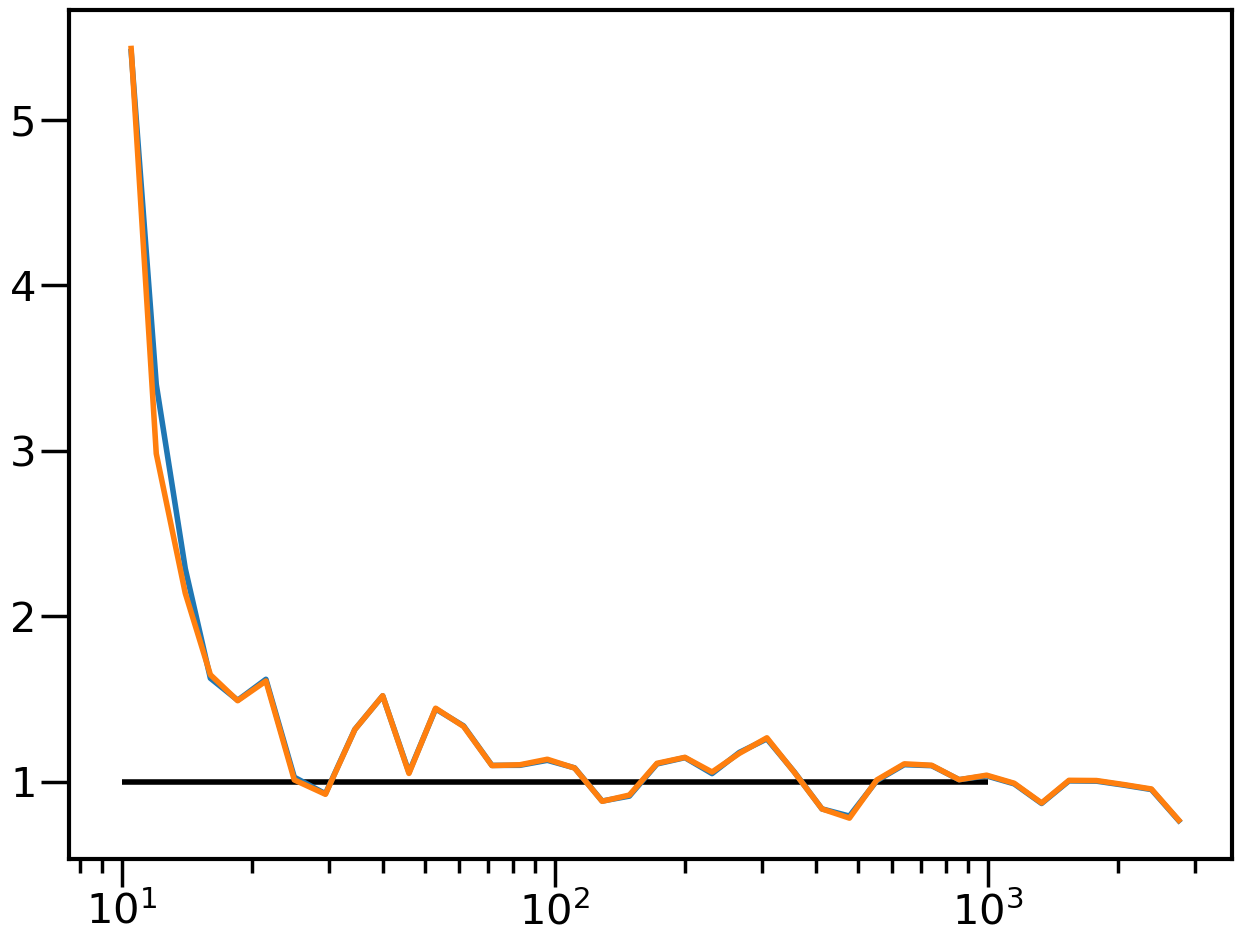

In [135]:
plot(lb,np.diag(cl0_win_w['cov'][corr]),'--')
plot(lb,np.diag(np.real(cl_sim_Ww['clp_b_stats'][corr]['cov'])),'-')
xscale('log')
yscale('log')
show()
plot(lb,np.diag(cl0['cov'][corr]['final_b']),'--')
plot(lb,np.diag(np.real(cl_sim_Ww['clg_b22_stats'][corr]['cov'])))
plot(lb,np.diag(np.real(cl_sim_Ww['clg_b2_stats'][corr]['cov'])))
xscale('log')
yscale('log')

show()

plot(lb,np.diag(np.real(cl_sim_Ww['clp_b_stats'][corr]['cov']))/np.diag(cl0_win_w['cov'][corr]),'--')
xscale('log')
# yscale('log')
hlines(1,10,1000)
show()
plot(lb,np.diag(np.real(cl_sim_Ww['clg_b22_stats'][corr]['cov']))/np.diag(cl0['cov'][corr]['final_b']))
plot(lb,np.diag(np.real(cl_sim_Ww['clg_b2_stats'][corr]['cov']))/np.diag(cl0['cov'][corr]['final_b']))
xscale('log')
hlines(1,10,1000)
# yscale('log')

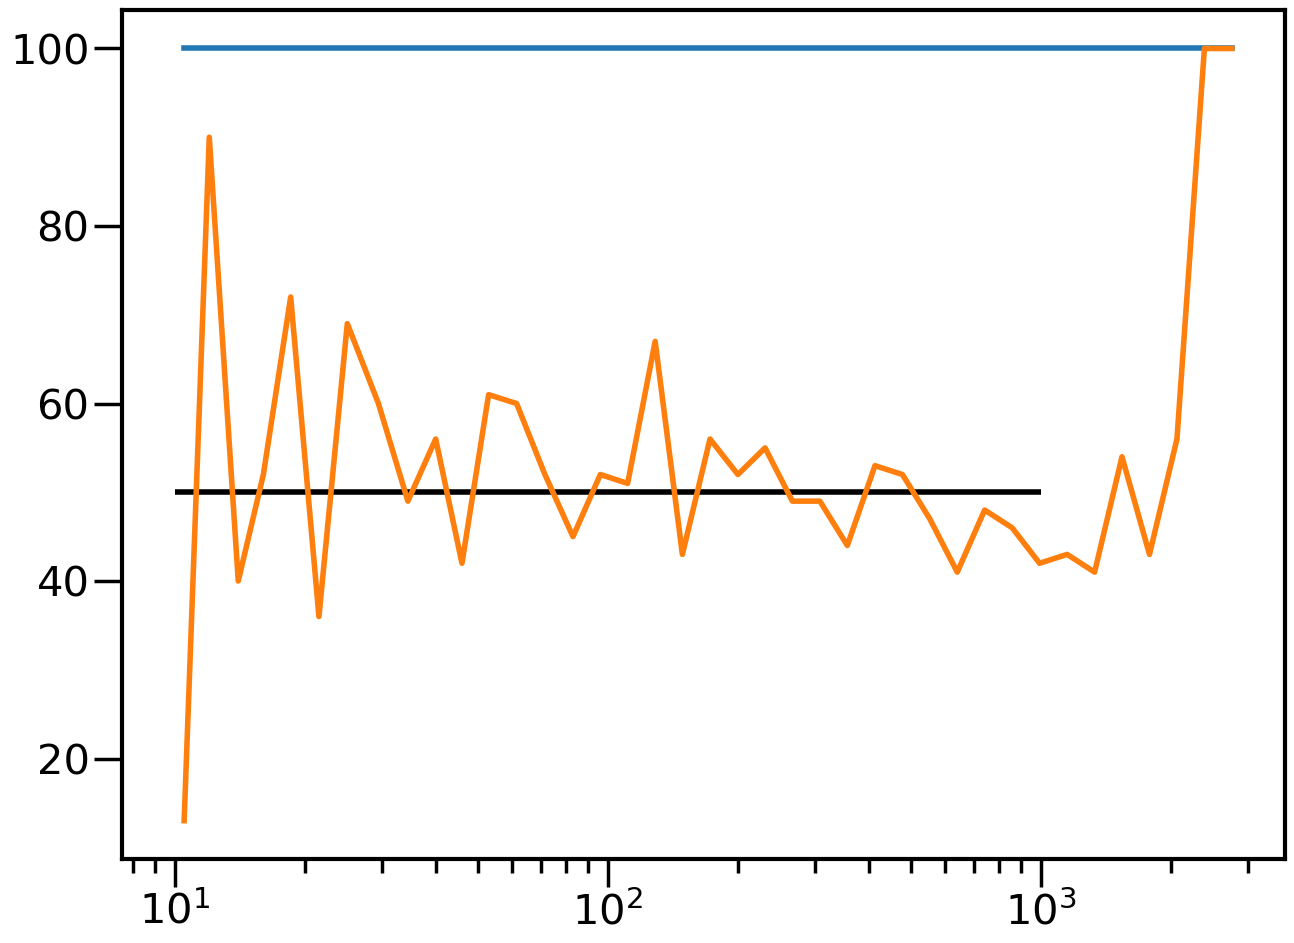

In [136]:
plot(lb,cl_sim_W['clg_b_stats'][corr]['percetile_score'])
plot(lb,cl_sim_W['clg_b2_stats'][corr]['percetile_score'])
xscale('log')
hlines(50,10,1000)

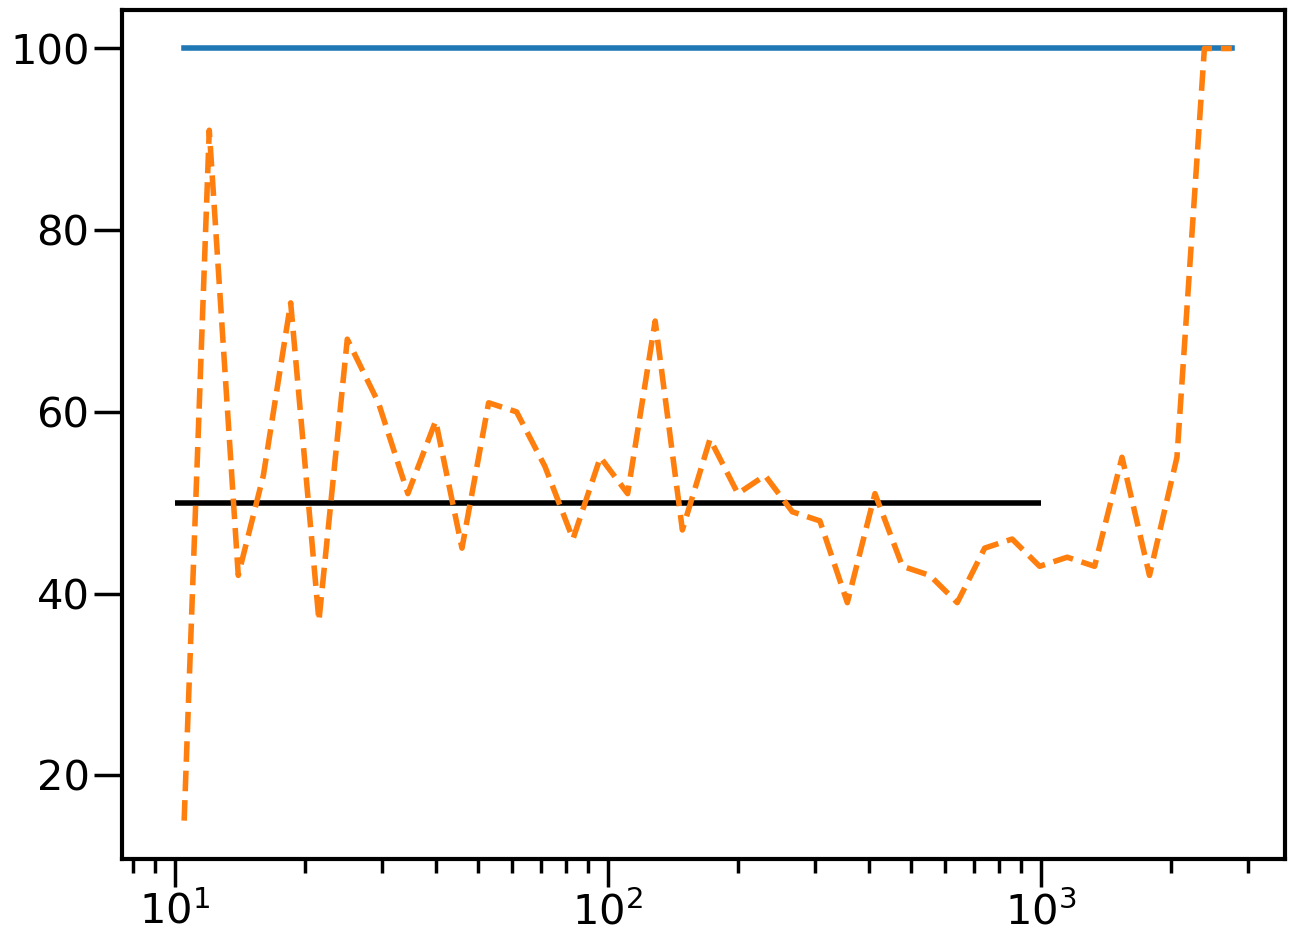

In [137]:
plot(lb,cl_sim_Ww['clg_b_stats'][corr]['percetile_score'])
plot(lb,cl_sim_Ww['clg_b2_stats'][corr]['percetile_score'],'--')
xscale('log')
hlines(50,10,1000)

In [ ]:
from scipy.stats import wishart,norm,multivariate_normal
from scipy.optimize import minimize
from scipy.stats import entropy,chi2
from scipy.optimize import minimize
def wishart_entropy(df,d):
    if df<1 or not np.isfinite(df):
        return np.inf
    df=df[0]
    m=d.mean()
    
    d=d
    lim=(d.min()*0.9,d.max()*1.1)
    count,edges=np.histogram(d,bins=100,range=lim,normed=1)
    edges_m=0.5*(edges[1:]+edges[:-1])
    x=edges_m>0
    pW=np.zeros_like(edges_m)
    pW[x]=wishart.pdf(edges_m[x],scale=m/df,df=df)
    pW*=count.max()/pW.max()
#     print(entropy(count,pW),df)
#     crash
    return entropy(count,pW)

In [ ]:
corr=corr_gg
corr_indx=0

In [ ]:
shear_lcut=kappa_win.l>=2
cut=kappa_win.l>0
s=0
if 'shear' in corr:
    cut=shear_lcut
    s=2
coupling_M=kappa_win.Win.Win[corr][(0,0)]['M']
coupling_M4=kappa_win.Win.Win['cov'][corr+corr][(0,0,0,0)]['M1324'][s] #*2
# coupling_M_inv=np.linalg.inv(coupling_M)
coupling_M_inv=np.zeros_like(coupling_M)
coupling_M_inv[:,cut][cut,:]=np.linalg.inv(coupling_M[cut,:][:,cut]) #otherwise we get singular matrix since for shear l<2 is not defined.
coupling_M_binned2=kappa_win.binning.bin_2d(cov=coupling_M,bin_utils=kappa_win.cl_bin_utils) #this doesnot work... difference of bin size
#loglog(lb,np.diag(coupling_M_binned2)/np.diag(coupling_M_binned)*np.gradient(lb))
coupling_M_binned2*=dl
coupling_M_binned=bin_coupling_M(kappa_win,coupling_M)
coupling_M_binned_inv=np.linalg.inv(coupling_M_binned)
coupling_M_binned2_inv=np.linalg.inv(coupling_M_binned2)
coupling_M4_binned=bin_coupling_M(kappa_win,coupling_M4)
coupling_M4_binned2=kappa_win.binning.bin_2d(cov=coupling_M4,bin_utils=kappa_win.cl_bin_utils) 
coupling_M4_binned_inv=np.linalg.inv(coupling_M4_binned)

coupling_M_binned_inv2=kappa_win.binning.bin_2d(cov=coupling_M_inv,bin_utils=kappa_win.cl_bin_utils)

coupling_Mw=kappa_win_w.Win.Win[corr][(0,0)]['M']
coupling_M4w=kappa_win_w.Win.Win['cov'][corr+corr][(0,0,0,0)]['M1324'][s] #*2
# coupling_Mw_inv=np.linalg.inv(coupling_Mw)
coupling_Mw_inv=np.zeros_like(coupling_Mw)
coupling_Mw_inv[:,cut][cut,:]=np.linalg.inv(coupling_Mw[cut,:][:,cut]) #otherwise we get singular matrix since for shear l<2 is not defined.

coupling_Mw_binned2=kappa_win_w.binning.bin_2d(cov=coupling_Mw,bin_utils=kappa_win_w.cl_bin_utils) #this doesnot work... difference of bin size
coupling_Mw_binned2*=dl
#loglog(lb,np.diag(coupling_M_binned2)/np.diag(coupling_M_binned)*np.gradient(lb))
coupling_Mw_binned=bin_coupling_M(kappa_win_w,coupling_Mw)
coupling_Mw_binned_inv=np.linalg.inv(coupling_Mw_binned)
coupling_Mw_binned2_inv=np.linalg.inv(coupling_Mw_binned2)
coupling_M4w_binned=bin_coupling_M(kappa_win_w,coupling_M4w)
coupling_M4w_binned2=kappa_win.binning.bin_2d(cov=coupling_M4w,bin_utils=kappa_win.cl_bin_utils) 
coupling_M4w_binned_inv=np.linalg.inv(coupling_M4w_binned)

coupling_Mw_binned_inv2=kappa_win.binning.bin_2d(cov=coupling_Mw_inv,bin_utils=kappa_win.cl_bin_utils)

In [ ]:
kappa_win.SN[corr].shape

In [ ]:
df_fit=np.zeros_like(lb)
coupling_M_binned=cl_sim_W['coupling_M_binned'][corr]
# coupling_M4_binned2=cl_sim_W['coupling_M4_binned2'][corr]
for l_i in np.arange(len(lb)):
#     l_i=1
    shot_noise=kappa_win.SN[corr][0,0,0]
#     noise_f=(cl0_win['cl_b'][corr][l_i]+shot_noise)/cl0_win['cl_b'][corr][l_i]
    noise_f=1#(cl0['cl_b'][corr][l_i]+shot_noise)/cl0['cl_b'][corr][l_i] #this should be cl, not p-cl
    df=cl_sim_W['nu_b'][l_i]/noise_f**2
    df2=df*np.diag(coupling_M_binned)[l_i]/f_sky
    df3=np.diag(coupling_M_binned)**2/np.diag(coupling_M4_binned2) #* np.gradient(lb)
    df3/=noise_f**2
    df3=df3[l_i]
    df=max(1,df)
    df2=max(1,df2)
    df3=max(1,df3)
    
    print(df)

    d=cl_sim_W['clg_b2'][:,l_i,corr_indx]
#     m=cl_sim_W['clg_b'][:,l_i].mean()
    m=d.mean()#cl0['cl_b'][l_i]
    s=1
    if m<0:
        s=-1 
    d=d*s
    m=d.mean()

    xx=minimize(wishart_entropy,x0=df3,args=(d),method='Powell',options={'maxiter':1000})
    print(xx.success)
    df_xx=np.float32(xx.x)
    df_fit[l_i]=df_xx
    lim=(d.min()*0.9,d.max()*1.1)
    count,edges=np.histogram(d,bins=100,range=lim,normed=1)
    edges_m=0.5*(edges[1:]+edges[:-1])
    x=edges_m>0
    pW=np.zeros_like(edges_m)
    pW2=np.zeros_like(edges_m)
    pW3=np.zeros_like(edges_m)
    pWF=np.zeros_like(edges_m)
#     edges_m=np.absolute(edges_m)
    pW[x]=wishart.pdf(edges_m[x],scale=m/df,df=df)
    pW2[x]=wishart.pdf(edges_m[x],scale=m/df2,df=df2)
    pW3[x]=wishart.pdf(edges_m[x],scale=m/df3,df=df3)
#     pW=chi2.pdf(edges_m,df,scale=m*s/df)
    print(df_xx)
    pWF[x]=wishart.pdf(edges_m[x],scale=m/df_xx,df=df_xx)
    
    plot(edges_m,count,label=r'$\ell$'+str(np.around(lb[l_i],decimals=2)))
    plot(edges_m,pW,':',label=np.around(df,decimals=2))
    plot(edges_m,pW2,'--',label=np.around(df2,decimals=2))
    plot(edges_m,pW3,'-.',label=np.around(df3,decimals=2))
    plot(edges_m,pWF,label=np.around(df_xx,decimals=2))
    vlines(m,0,pW.max())
    vlines(cl0['cl_b'][corr][l_i],0,pW.max(),linestyles='--')
    
    legend()
    show()
    i+=1
#     crash


In [ ]:
noise_f=(cl0['cl_b']+shot_noise)/cl0['cl_b']
df=cl_sim_W['nu_b']/noise_f**2
df2=df*np.diag(coupling_M_binned)/f_sky
df3=np.diag(coupling_M_binned)**2/np.diag(coupling_M4_binned2)# * np.gradient(lb)
# df3*=2
df3/=noise_f**2
f=1./lb**2
plot(lb,df_fit*f,label='fit')
plot(lb,df*f,label='fsky')
plot(lb,df2*f,label='F2')
plot(lb,df3*f,label='F4')
xscale('log')
# yscale('log')
ylim(0.,0.1)
legend()

In [ ]:
df_fitw=np.zeros_like(lb)
for l_i in np.arange(len(lb)):
#     l_i=1
    noise_f=(cl0['cl_b'][l_i]+shot_noise)/cl0['cl_b'][l_i]
    df=cl_sim_Ww['nu_b'][l_i]/noise_f**2
    df2=df*np.diag(coupling_Mw_binned)[l_i]/f_sky
    df3=np.diag(coupling_Mw_binned)**2/np.diag(coupling_M4w_binned2) #* np.gradient(lb)
    df3/=noise_f**2
    df3=df3[l_i]
    if df3<1:
        print(df3,df)
        df3=1
#     df=df3[l_i]
    d=cl_sim_Ww['clg_b2'][:,l_i]
#     m=cl_sim_W['clg_b'][:,l_i].mean()
    m=d.mean()#cl0['cl_b'][l_i]
    s=1
    if m<0:
        s=-1 
    d=d*s
    m=d.mean()

    xx=minimize(wishart_entropy,x0=df3,args=(d),method='Powell')
    df_xx=np.float32(xx.x)
    df_fitw[l_i]=df_xx
    lim=(d.min()*0.9,d.max()*1.1)
    count,edges=np.histogram(d,bins=100,range=lim,normed=1)
    edges_m=0.5*(edges[1:]+edges[:-1])
    x=edges_m>0
    pW=np.zeros_like(edges_m)
    pW2=np.zeros_like(edges_m)
    pW3=np.zeros_like(edges_m)
    pWF=np.zeros_like(edges_m)
#     edges_m=np.absolute(edges_m)
    pW[x]=wishart.pdf(edges_m[x],scale=m/df,df=df)
    pW2[x]=wishart.pdf(edges_m[x],scale=m/df2,df=df2)
    pW3[x]=wishart.pdf(edges_m[x],scale=m/df3,df=df3)
#     pW=chi2.pdf(edges_m,df,scale=m*s/df)
    pWF[x]=wishart.pdf(edges_m[x],scale=m/df_xx,df=df_xx)
    
    plot(edges_m,count,label=r'$\ell=$'+str(np.around(lb[l_i],decimals=2)))
    plot(edges_m,pW,':',label=r'$\nu_{(2\ell+1)f_{sky}}=$'+str(np.around(df,decimals=2)))
#     plot(edges_m,pW2,'--',label=np.around(df2,decimals=2))
    plot(edges_m,pW3,'-.',label=r'$\nu_{win}=$'+str(np.around(df3,decimals=2)))
    plot(edges_m,pWF,label=r'$\nu_{fit}=$'+str(np.around(df_xx,decimals=2)))
#     vlines(m,0,pW.max())
#     vlines(cl0['cl_b'][l_i],0,pW.max(),linestyles='--')
    xlabel(r'$C_{\ell}$')
    legend()
    show()
#     crash

In [ ]:
noise_f=(cl0['cl_b']+shot_noise)/cl0['cl_b']
df=cl_sim_Ww['nu_b']/noise_f**2
df2=df*np.diag(coupling_Mw_binned)/f_sky
df3=np.diag(coupling_Mw_binned)**2/np.diag(coupling_M4w_binned2)# * np.gradient(lb)
# df3*=2
df3/=noise_f**2
f=1./lb**2
plot(lb,df_fitw*f,label='fit')
plot(lb,df*f,label='fsky')
plot(lb,df2*f,label='F2')
plot(lb,df3*f,label='F4')
xscale('log')
# yscale('log')
ylim(0.,0.1)
legend()

In [ ]:
for l_i in np.arange(len(lb)):
#     l_i=1
    df=cl_sim_W['nu_b'][l_i]/f_sky
    df2=df/np.diag(coupling_M_binned_inv)[l_i]#/f_sky
    d=cl_sim_W['clp_b'][:,l_i]
#     m=cl_sim_W['clg_b'][:,l_i].mean()
    m=d.mean()#cl0['cl_b'][l_i]
    s=1
    if m<0:
        s=-1 
    d=d*s
    m=d.mean()

    xx=minimize(wishart_entropy,x0=1,args=(d),method='Powell')
    df_xx=np.float32(xx.x)
    lim=(d.min()*0.9,d.max()*1.1)
    count,edges=np.histogram(d,bins=100,range=lim,normed=1)
    edges_m=0.5*(edges[1:]+edges[:-1])
    x=edges_m>0
    pW=np.zeros_like(edges_m)
    pW2=np.zeros_like(edges_m)
    pWF=np.zeros_like(edges_m)
#     edges_m=np.absolute(edges_m)
    pW[x]=wishart.pdf(edges_m[x],scale=m/df,df=df)
    pW2[x]=wishart.pdf(edges_m[x],scale=m/df2,df=df2)
#     pW=chi2.pdf(edges_m,df,scale=m*s/df)
    pWF[x]=wishart.pdf(edges_m[x],scale=m/df_xx,df=df_xx)
    
    plot(edges_m,count,label=r'$\ell$'+str(np.around(lb[l_i],decimals=2)))
    plot(edges_m,pW,':',label=np.around(df,decimals=2))
    plot(edges_m,pW2,'--',label=np.around(df2,decimals=2))
    plot(edges_m,pWF,label=np.around(df_xx,decimals=2))
    vlines(m,0,pW.max())
    vlines(cl0_win['cl_b'][l_i],0,pW.max(),linestyles='--')
    
    legend()
    show()
#     crash